#Analyzying the Case Study

### Importing important Libraries


In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import math
import re
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 125)
pd.set_option("display.max_rows", 125)


### 1. Reading important input data files

In [2]:
from google.colab import drive

file_path = '/content/drive/MyDrive/Colab Notebooks/EDA_data/application_data.csv'

app_df = pd.read_csv(file_path)
app_df.head()


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [3]:
file_path2 = '/content/drive/MyDrive/Colab Notebooks/EDA_data/previous_application.csv'
pre_df = pd.read_csv(file_path2)
pre_df.head()


SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [4]:

description_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EDA_data/columns_description.csv', encoding = "latin1")
description_df

Unnamed: 0                     Table                        Row  \
0             1          application_data                 SK_ID_CURR   
1             2          application_data                     TARGET   
2             5          application_data         NAME_CONTRACT_TYPE   
3             6          application_data                CODE_GENDER   
4             7          application_data               FLAG_OWN_CAR   
..          ...                       ...                        ...   
155         209  previous_application.csv             DAYS_FIRST_DUE   
156         210  previous_application.csv  DAYS_LAST_DUE_1ST_VERSION   
157         211  previous_application.csv              DAYS_LAST_DUE   
158         212  previous_application.csv           DAYS_TERMINATION   
159         213  previous_application.csv  NFLAG_INSURED_ON_APPROVAL   

                                           Description  \
0                             ID of loan in our sample   
1    Target variable (1 - client with payment diffi...   
2          Identification if loan is cash or revolving   
3                                 Gender of the client   
4                        Flag if the client owns a car   
..                                                 ...   
155  Relative to application date of current applic...   
156  Relative to application date of current applic...   
157  Relative to application date of current applic...   
158  Relative to application date of current applic...   
159  Did the client requested insurance during the ...   

                                   Special  
0                                      NaN  
1                                      NaN  
2                                      NaN  
3                                      NaN  
4                                      NaN  
..                                     ...  
155  time only relative to the application  
156  time only relative to the application  
157  time only relative to the application  
158  time only relative to the application  
159                                    NaN  

[160 rows x 5 columns]

### Data understanding
   #### (Do Routine structure check)

In [5]:
#Checking the Dataframe dimensions (Rows, Columns)
app_df.shape

(307511, 122)

In [6]:
#Checking the data types of columns
app_df.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [7]:
#Basic info of Dataframe
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [8]:
#Basic statistical details of Dataframe
app_df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

#### Data Quality check & Missing vaules analysis and check

In [9]:
#Checking percentage of null values in columns
cols_df = pd.DataFrame(round(app_df.isnull().mean()*100,2).sort_values(ascending= False))
cols_df.columns = ["percentage_missing_values"]
cols_df

percentage_missing_values
COMMONAREA_MEDI                                   69.87
COMMONAREA_AVG                                    69.87
COMMONAREA_MODE                                   69.87
NONLIVINGAPARTMENTS_MODE                          69.43
NONLIVINGAPARTMENTS_AVG                           69.43
NONLIVINGAPARTMENTS_MEDI                          69.43
FONDKAPREMONT_MODE                                68.39
LIVINGAPARTMENTS_MODE                             68.35
LIVINGAPARTMENTS_AVG                              68.35
LIVINGAPARTMENTS_MEDI                             68.35
FLOORSMIN_AVG                                     67.85
FLOORSMIN_MODE                                    67.85
FLOORSMIN_MEDI                                    67.85
YEARS_BUILD_MEDI                                  66.50
YEARS_BUILD_MODE                                  66.50
YEARS_BUILD_AVG                                   66.50
OWN_CAR_AGE                                       65.99
LANDAREA_MEDI                                     59.38
LANDAREA_MODE                                     59.38
LANDAREA_AVG                                      59.38
BASEMENTAREA_MEDI                                 58.52
BASEMENTAREA_AVG                                  58.52
BASEMENTAREA_MODE                                 58.52
EXT_SOURCE_1                                      56.38
NONLIVINGAREA_MODE                                55.18
NONLIVINGAREA_AVG                                 55.18
NONLIVINGAREA_MEDI                                55.18
ELEVATORS_MEDI                                    53.30
ELEVATORS_AVG                                     53.30
ELEVATORS_MODE                                    53.30
WALLSMATERIAL_MODE                                50.84
APARTMENTS_MEDI                                   50.75
APARTMENTS_AVG                                    50.75
APARTMENTS_MODE                                   50.75
ENTRANCES_MEDI                                    50.35
ENTRANCES_AVG                                     50.35
ENTRANCES_MODE                                    50.35
LIVINGAREA_AVG                                    50.19
LIVINGAREA_MODE                                   50.19
LIVINGAREA_MEDI                                   50.19
HOUSETYPE_MODE                                    50.18
FLOORSMAX_MODE                                    49.76
FLOORSMAX_MEDI                                    49.76
FLOORSMAX_AVG                                     49.76
YEARS_BEGINEXPLUATATION_MODE                      48.78
YEARS_BEGINEXPLUATATION_MEDI                      48.78
YEARS_BEGINEXPLUATATION_AVG                       48.78
TOTALAREA_MODE                                    48.27
EMERGENCYSTATE_MODE                               47.40
OCCUPATION_TYPE                                   31.35
EXT_SOURCE_3                                      19.83
AMT_REQ_CREDIT_BUREAU_HOUR                        13.50
AMT_REQ_CREDIT_BUREAU_DAY                         13.50
AMT_REQ_CREDIT_BUREAU_WEEK                        13.50
AMT_REQ_CREDIT_BUREAU_MON                         13.50
AMT_REQ_CREDIT_BUREAU_QRT                         13.50
AMT_REQ_CREDIT_BUREAU_YEAR                        13.50
NAME_TYPE_SUITE                                    0.42
DEF_30_CNT_SOCIAL_CIRCLE                           0.33
OBS_30_CNT_SOCIAL_CIRCLE                           0.33
OBS_60_CNT_SOCIAL_CIRCLE                           0.33
DEF_60_CNT_SOCIAL_CIRCLE                           0.33
EXT_SOURCE_2                                       0.21
AMT_GOODS_PRICE                                    0.09
CNT_CHILDREN                                       0.00
FLAG_DOCUMENT_8                                    0.00
NAME_CONTRACT_TYPE                                 0.00
CODE_GENDER                                        0.00
FLAG_OWN_CAR                                       0.00
DAYS_LAST_PHONE_CHANGE                             0.00
FLAG_DOCUMENT_2                                    0.0

In [10]:
#Let's treat the dataframe as it's containing lots of null values
#Dropping columns having null values more than 50 %
app_df_1 = app_df.drop(app_df.columns[app_df.apply(lambda x : x.isnull().mean()*100>40)], axis =1)
#New dimension of data frame after dropping columns
print(app_df_1.shape)
app_df_1

(307511, 73)


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24700.5         351000.0   Unaccompanied               Working   
1           35698.5        1129500.0          Family         State servant   
2            6750.0         135000.0   Unaccompanied               Working   
3           29686.5         297000.0   Unaccompanied               Working   
4           21865.5         513000.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       House / apartment                    0.018801       -9461   
1       House / apartment                    0.003541      -16765   
2       House / apartment                    0.010032      -19046   
3       House / apartment                    0.008019      -19005   
4       House / apartment                    0.028663      -19932   
...                   ...                         ...         ...   
307506       With parents                    0.032561       -9327   
307507  House / apartment       

In [11]:
app_df.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [12]:
#Replacing XNA with female as mostly females in data
app_df_1.CODE_GENDER.replace("XNA","F",inplace=True)
app_df_1.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [13]:
#Further dropping unwanted columns
drop_cols = ['FLAG_MOBIL', 'FLAG_EMP_PHONE','FLAG_CONT_MOBILE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

app_df_1.drop(labels = drop_cols, axis = 1, inplace = True)

In [14]:
#Columns available with us now for further analysis after dropping columns
print(app_df_1.columns)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CRED

In [15]:
app_df_1.shape

(307511, 44)

In [16]:
#Re-checking columns with missing values
((app_df_1.isnull().mean())*100).sort_values()

SK_ID_CURR                      0.000000
ORGANIZATION_TYPE               0.000000
LIVE_CITY_NOT_WORK_CITY         0.000000
REG_CITY_NOT_WORK_CITY          0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
REG_REGION_NOT_WORK_REGION      0.000000
REG_REGION_NOT_LIVE_REGION      0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
DAYS_ID_PUBLISH                 0.000000
DAYS_EMPLOYED                   0.000000
DAYS_BIRTH                      0.000000
REGION_POPULATION_RELATIVE      0.000000
NAME_HOUSING_TYPE               0.000000
DAYS_REGISTRATION               0.000000
NAME_EDUCATION_TYPE             0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
NAME_FAMILY_STATUS              0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
FLAG_OWN_CAR    

### Handling missing values
#### Imputation for columns with nearly 13% missing values

##### So target/focus columns for imputation will be
   

In [17]:
imp_cols = ["AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR"]
imp_cols

['AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [18]:
#Checking data type of the selected columns for imputation
app_df_1[imp_cols].dtypes

AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_HOUR    float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
dtype: object

Checking and analysing each above selected columns individually




##### Column 1 - AMT_REQ_CREDIT_BUREAU_MON (Identifying imputation technique)



In [19]:
app_df_1["AMT_REQ_CREDIT_BUREAU_MON"]

0         0.0
1         0.0
2         0.0
3         NaN
4         0.0
         ... 
307506    NaN
307507    NaN
307508    1.0
307509    0.0
307510    2.0
Name: AMT_REQ_CREDIT_BUREAU_MON, Length: 307511, dtype: float64

In [20]:
#Number of  null values in columns
app_df_1["AMT_REQ_CREDIT_BUREAU_MON"].isnull().sum()

41519

In [21]:
#Using describe() function checking statistics of column
app_df_1["AMT_REQ_CREDIT_BUREAU_MON"].describe()

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

The statistical summary showing their is lot of variation in mean and max value. So, we have to further perform analysis using .value_counts() function and some graphical presentation to understand cause of this variation between mean and max value.

<Axes: >

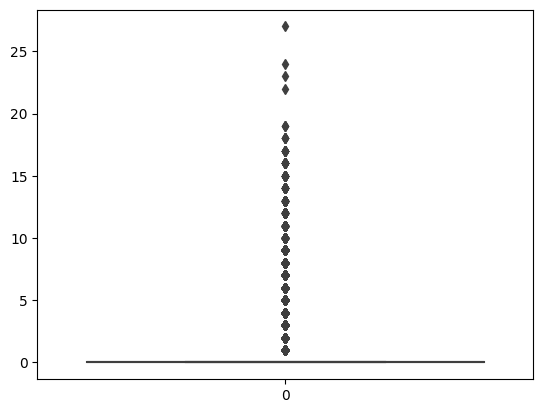

In [22]:
#Using boxplot to identify outlier
sns.boxplot(app_df_1["AMT_REQ_CREDIT_BUREAU_MON"])

From above box-plot nothing is clear, it does not give idea why mean and max value is so much deviated. So, we have to use value count function.

In [23]:
app_df_1["AMT_REQ_CREDIT_BUREAU_MON"].value_counts()

0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
23.0         1
27.0         1
22.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

In [24]:
app_df_1["AMT_REQ_CREDIT_BUREAU_MON"].value_counts(normalize = True)*100

0.0     83.548753
1.0     12.461653
2.0      2.024873
3.0      0.748519
4.0      0.404523
5.0      0.226323
6.0      0.128951
7.0      0.112033
9.0      0.077446
8.0      0.069551
10.0     0.049626
11.0     0.044738
12.0     0.028948
13.0     0.027068
14.0     0.015038
15.0     0.013158
16.0     0.008647
17.0     0.005263
18.0     0.002256
19.0     0.001128
24.0     0.000376
23.0     0.000376
27.0     0.000376
22.0     0.000376
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

Column contains maximum value as "0" and null values equals to 41519.

So, as in column AMT_REQ_CREDIT_BUREAU_MON 83% data is concentrated on a small point as value equals 0.
So, recommended imputation technique is replacing NaN values by the mode of data series which is 0.

#### Column 2 - AMT_REQ_CREDIT_BUREAU_WEEK (Identifying imputation technique)

In [25]:
app_df_1["AMT_REQ_CREDIT_BUREAU_WEEK"]

0         0.0
1         0.0
2         0.0
3         NaN
4         0.0
         ... 
307506    NaN
307507    NaN
307508    0.0
307509    0.0
307510    0.0
Name: AMT_REQ_CREDIT_BUREAU_WEEK, Length: 307511, dtype: float64

In [26]:
#Number of  null values in columns
app_df_1["AMT_REQ_CREDIT_BUREAU_WEEK"].isnull().sum()

41519

In [27]:
#Using describe() function checking statistics of column
app_df_1["AMT_REQ_CREDIT_BUREAU_WEEK"].describe()

count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

The statistical summary showing their is lot of variation in mean and max value. Mean is more deviated towards min value. So, we have to further perform analysis using .value_counts() function and some graphical presentation to understand cause of this variation between mean and max value.

<Axes: >

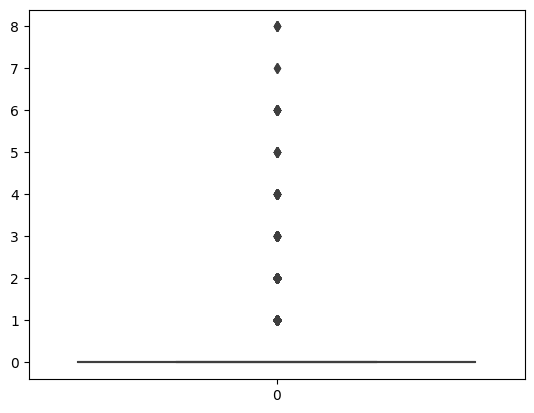

In [28]:
#Using boxplot to identify outlier
sns.boxplot(app_df_1["AMT_REQ_CREDIT_BUREAU_WEEK"])

From above box-plot nothing is clear, it does not give idea why mean and max value is so much deviated. So, we have to use value count function.

In [29]:
app_df_1["AMT_REQ_CREDIT_BUREAU_WEEK"].value_counts()

0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

In [30]:
app_df_1["AMT_REQ_CREDIT_BUREAU_WEEK"].value_counts(normalize = True)*100

0.0    96.790881
1.0     3.085807
2.0     0.074814
3.0     0.021805
4.0     0.012782
6.0     0.007519
5.0     0.003760
8.0     0.001880
7.0     0.000752
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

Column contains maximum value as "0" and null values equals to 41519.

So, as in column AMT_REQ_CREDIT_BUREAU_WEEK 97% data is concentrated on a small point as value equals 0.
So, recommended imputation technique is replacing NaN values by the mode of data series which is 0.

Column 3 - AMT_REQ_CREDIT_BUREAU_DAY (Identifying imputation technique)

In [31]:
app_df_1["AMT_REQ_CREDIT_BUREAU_DAY"]

0         0.0
1         0.0
2         0.0
3         NaN
4         0.0
         ... 
307506    NaN
307507    NaN
307508    0.0
307509    0.0
307510    0.0
Name: AMT_REQ_CREDIT_BUREAU_DAY, Length: 307511, dtype: float64

In [32]:
#Number of  null values in columns
app_df_1["AMT_REQ_CREDIT_BUREAU_DAY"].isnull().sum()

41519

In [33]:
#Using describe() function checking statistics of column
app_df_1["AMT_REQ_CREDIT_BUREAU_DAY"].describe()

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

The statistical summary showing their is lot of variation in mean and max value. Mean is more deviated towards min value. So, we have to further perform analysis using .value_counts() function and some graphical presentation to understand cause of this variation between mean and max value.

<Axes: >

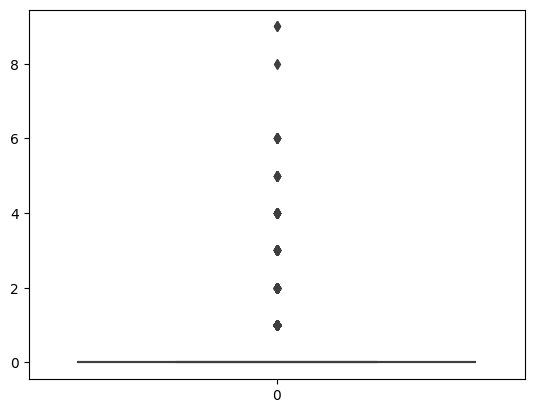

In [34]:
#Using boxplot to identify outlier
sns.boxplot(app_df_1["AMT_REQ_CREDIT_BUREAU_DAY"])

From above box-plot nothing is clear, it does not give idea why mean and max value is so much deviated. So, we have to use value count function.

In [35]:
app_df_1["AMT_REQ_CREDIT_BUREAU_DAY"].value_counts()

0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

In [36]:
app_df_1["AMT_REQ_CREDIT_BUREAU_DAY"].value_counts(normalize = True)*100

0.0    99.440209
1.0     0.485729
2.0     0.039851
3.0     0.016918
4.0     0.009775
5.0     0.003384
6.0     0.003008
9.0     0.000752
8.0     0.000376
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

Column contains maximum value as "0" and null values equals to 41519.

So, as in column AMT_REQ_CREDIT_BUREAU_DAY 99% data is concentrated on a small point as value equals 0.
So, recommended imputation technique is replacing NaN values by the mode of data series which is 0.

Column 4 - AMT_REQ_CREDIT_BUREAU_HOUR (Identifying imputation technique)

In [37]:
app_df_1["AMT_REQ_CREDIT_BUREAU_HOUR"]

0         0.0
1         0.0
2         0.0
3         NaN
4         0.0
         ... 
307506    NaN
307507    NaN
307508    1.0
307509    0.0
307510    0.0
Name: AMT_REQ_CREDIT_BUREAU_HOUR, Length: 307511, dtype: float64

In [38]:
#Number of  null values in columns
app_df_1["AMT_REQ_CREDIT_BUREAU_HOUR"].isnull().sum()

41519

In [39]:
#Using describe() function checking statistics of column
app_df_1["AMT_REQ_CREDIT_BUREAU_HOUR"].describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

The statistical summary showing their is lot of variation in mean and max value. Mean is more deviated towards min value. So, we have to further perform analysis using .value_counts() function and some graphical presentation to understand cause of this variation between mean and max value.

<Axes: >

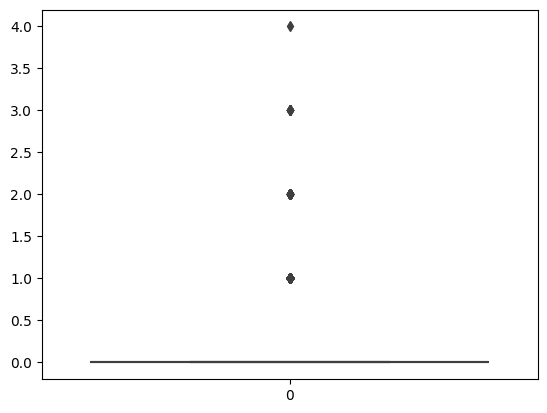

In [40]:
#Using boxplot to identify outlier
sns.boxplot(app_df_1["AMT_REQ_CREDIT_BUREAU_HOUR"])

From above box-plot nothing is clear, it does not give idea why mean and max value is so much deviated. So, we have to use value count function.

In [41]:
app_df_1["AMT_REQ_CREDIT_BUREAU_HOUR"].value_counts()

0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

In [42]:
app_df_1["AMT_REQ_CREDIT_BUREAU_HOUR"].value_counts(normalize = True)*100

0.0    99.388703
1.0     0.586484
2.0     0.021053
3.0     0.003384
4.0     0.000376
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

Column contains maximum value as "0" and null values equals to 41519.

So, as in column AMT_REQ_CREDIT_BUREAU_HOUR 99% data is concentrated on a small point as value equals 0.
So, recommended imputation technique is replacing NaN values by the mode of data series which is 0.

Column 5 - AMT_REQ_CREDIT_BUREAU_QRT (Identifying imputation technique)

In [43]:
app_df_1["AMT_REQ_CREDIT_BUREAU_QRT"]

0         0.0
1         0.0
2         0.0
3         NaN
4         0.0
         ... 
307506    NaN
307507    NaN
307508    0.0
307509    0.0
307510    0.0
Name: AMT_REQ_CREDIT_BUREAU_QRT, Length: 307511, dtype: float64

In [44]:
#Number of  null values in columns
app_df_1["AMT_REQ_CREDIT_BUREAU_QRT"].isnull().sum()

41519

In [45]:
#Using describe() function checking statistics of column
app_df_1["AMT_REQ_CREDIT_BUREAU_QRT"].describe()

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

The statistical summary showing their is lot of variation in mean and max value. Mean is more deviated towards min value. So, we have to further perform analysis using .value_counts() function and some graphical presentation to understand cause of this variation between mean and max value.

<Axes: >

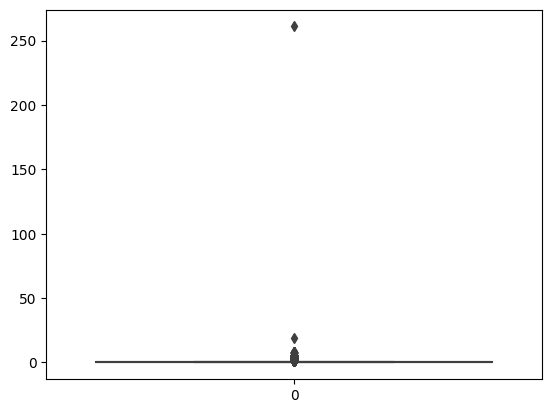

In [46]:
#Using boxplot to identify outlier
sns.boxplot(app_df_1["AMT_REQ_CREDIT_BUREAU_QRT"])

From above box-plot nothing is clear, it does not give idea why mean and max value is so much deviated. So, we have to use value count function.

In [47]:
app_df_1["AMT_REQ_CREDIT_BUREAU_QRT"].value_counts()

0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
261.0         1
19.0          1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [48]:
app_df_1["AMT_REQ_CREDIT_BUREAU_QRT"].value_counts(normalize = True)*100

0.0      80.986270
1.0      12.730458
2.0       5.418208
3.0       0.645508
4.0       0.178953
5.0       0.024061
6.0       0.010527
8.0       0.002632
7.0       0.002632
261.0     0.000376
19.0      0.000376
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

Column contains maximum value as "0" and null values equals to 41519.

So, as in column AMT_REQ_CREDIT_BUREAU_QRT 81% data is concentrated on a small point as value equals 0.
So, recommended imputation technique is replacing NaN values by the mode of data series which is 0.

Column 6 - AMT_REQ_CREDIT_BUREAU_YEAR (Identifying imputation technique)

In [49]:
app_df_1["AMT_REQ_CREDIT_BUREAU_YEAR"]

0         1.0
1         0.0
2         0.0
3         NaN
4         0.0
         ... 
307506    NaN
307507    NaN
307508    1.0
307509    0.0
307510    1.0
Name: AMT_REQ_CREDIT_BUREAU_YEAR, Length: 307511, dtype: float64

In [50]:
#Number of  null values in columns
app_df_1["AMT_REQ_CREDIT_BUREAU_YEAR"].isnull().sum()

41519

In [51]:
#Using describe() function checking statistics of column
app_df_1["AMT_REQ_CREDIT_BUREAU_YEAR"].describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

The statistical summary showing their is lot of variation in mean and max value. Mean is more deviated towards min value. So, we have to further perform analysis using .value_counts() function and some graphical presentation to understand cause of this variation between mean and max value.

<Axes: >

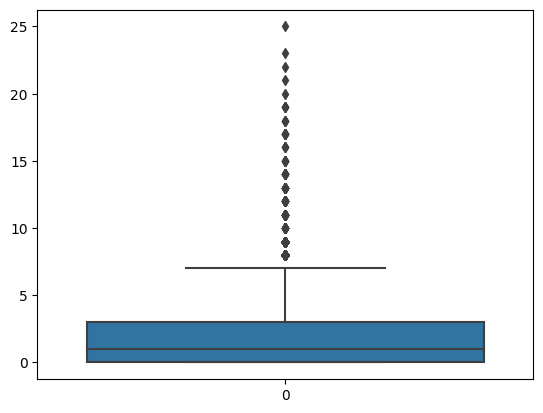

In [52]:
#Using boxplot to identify outlier
sns.boxplot(app_df_1["AMT_REQ_CREDIT_BUREAU_YEAR"])

Above box-plot showing some outliers in the data and median is closer to 0 and outliers are far away deviated from median. So, we have to perform further analysis to understand best imputation technique.

In [53]:
app_df_1["AMT_REQ_CREDIT_BUREAU_YEAR"].value_counts()

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
25.0        1
23.0        1
22.0        1
21.0        1
20.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [54]:
app_df_1["AMT_REQ_CREDIT_BUREAU_YEAR"].value_counts(normalize = True)*100

0.0     26.993669
1.0     23.837183
2.0     18.869740
3.0     12.642485
4.0      7.787452
5.0      4.530963
6.0      2.619252
7.0      1.454555
8.0      0.799648
9.0      0.412042
11.0     0.011654
12.0     0.011279
10.0     0.008271
13.0     0.007143
14.0     0.003760
17.0     0.002632
15.0     0.002256
19.0     0.001504
18.0     0.001504
16.0     0.001128
25.0     0.000376
23.0     0.000376
22.0     0.000376
21.0     0.000376
20.0     0.000376
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

Data cointains mostly 0,1,2,3 as values and null values equals to 41519.
So, we can't significantly say what value out of (0,1,2,3) to replace NaN values. So, best way is to drop those rows containing NaN values.

**Checking** **data** **types** (using function .dtypes)



In [55]:
#checking incorrect data type
app_df_1.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
OCCUPATION_TYPE                 object
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
REG_REGION_NOT_LIVE_REGION       int64
REG_REGION_NOT_WORK_REGIO

Incorrect data types are not found. In dataframe all columns set to have right data type.

#### Fixing data containing negative values and which can't be negative (like Days, Age)  here in this Data set includes Days data. Let's fix using abs() function.

In [56]:
app_df_1[["DAYS_BIRTH", "DAYS_EMPLOYED","DAYS_REGISTRATION", "DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]]

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0            -9461           -637            -3648.0            -2120   
1           -16765          -1188            -1186.0             -291   
2           -19046           -225            -4260.0            -2531   
3           -19005          -3039            -9833.0            -2437   
4           -19932          -3038            -4311.0            -3458   
...            ...            ...                ...              ...   
307506       -9327           -236            -8456.0            -1982   
307507      -20775         365243            -4388.0            -4090   
307508      -14966          -7921            -6737.0            -5150   
307509      -11961          -4786            -2562.0             -931   
307510      -16856          -1262            -5128.0             -410   

        DAYS_LAST_PHONE_CHANGE  
0                      -1134.0  
1                       -828.0  
2                       -815.0  
3                       -617.0  
4                      -1106.0  
...                        ...  
307506                  -273.0  
307507                     0.0  
307508                 -1909.0  
307509                  -322.0  
307510                  -787.0  

[307511 rows x 5 columns]

As above columns contain negative values so fixing them and deriving the number of years from above columns data



In [57]:
app_df_1[["DAYS_BIRTH", "DAYS_EMPLOYED","DAYS_REGISTRATION", "DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]]=app_df_1[["DAYS_BIRTH", "DAYS_EMPLOYED","DAYS_REGISTRATION", "DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]].abs().div(365).round(2)

In [58]:
app_df_1[["DAYS_BIRTH", "DAYS_EMPLOYED","DAYS_REGISTRATION", "DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]]

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0            25.92           1.75               9.99             5.81   
1            45.93           3.25               3.25             0.80   
2            52.18           0.62              11.67             6.93   
3            52.07           8.33              26.94             6.68   
4            54.61           8.32              11.81             9.47   
...            ...            ...                ...              ...   
307506       25.55           0.65              23.17             5.43   
307507       56.92        1000.67              12.02            11.21   
307508       41.00          21.70              18.46            14.11   
307509       32.77          13.11               7.02             2.55   
307510       46.18           3.46              14.05             1.12   

        DAYS_LAST_PHONE_CHANGE  
0                         3.11  
1                         2.27  
2                         2.23  
3                         1.69  
4                         3.03  
...                        ...  
307506                    0.75  
307507                    0.00  
307508                    5.23  
307509                    0.88  
307510                    2.16  

[307511 rows x 5 columns]

In [59]:
app_df_1.rename({"DAYS_BIRTH": "AGE_IN_YEAR", "DAYS_EMPLOYED":"YEARS_EMPLOYED","DAYS_REGISTRATION":"YEARS_REGISTRATION", "DAYS_ID_PUBLISH":"YEARS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE":"YEARS_LAST_PHONE_CHANGE"},axis = 1, inplace = True)
app_df_1

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24700.5         351000.0   Unaccompanied               Working   
1           35698.5        1129500.0          Family         State servant   
2            6750.0         135000.0   Unaccompanied               Working   
3           29686.5         297000.0   Unaccompanied               Working   
4           21865.5         513000.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  AGE_IN_YEAR  \
0       House / apartment                    0.018801        25.92   
1       House / apartment                    0.003541        45.93   
2       House / apartment                    0.010032        52.18   
3       House / apartment                    0.008019        52.07   
4       House / apartment                    0.028663        54.61   
...                   ...                         ...          ...   
307506       With parents                    0.032561        25.55   
307507  House / apartmen

Identifying outliers

In [60]:
#Checking numeric columns
app_df_1.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
AGE_IN_YEAR                    float64
YEARS_EMPLOYED                 float64
YEARS_REGISTRATION             float64
YEARS_ID_PUBLISH               float64
OCCUPATION_TYPE                 object
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
REG_REGION_NOT_LIVE_REGION       int64
REG_REGION_NOT_WORK_REGIO

Identifying outliers in selected columns
- CNT_CHILDREN
- AGE_IN_YEAR
- AMT_GOODS_PRICE
- AMT_INCOME_TOTAL
- AMT_ANNUITY
- AMT_CREDIT



In [61]:
col_out = ["CNT_CHILDREN", "AGE_IN_YEAR","AMT_GOODS_PRICE","AMT_INCOME_TOTAL","AMT_ANNUITY","AMT_CREDIT"]

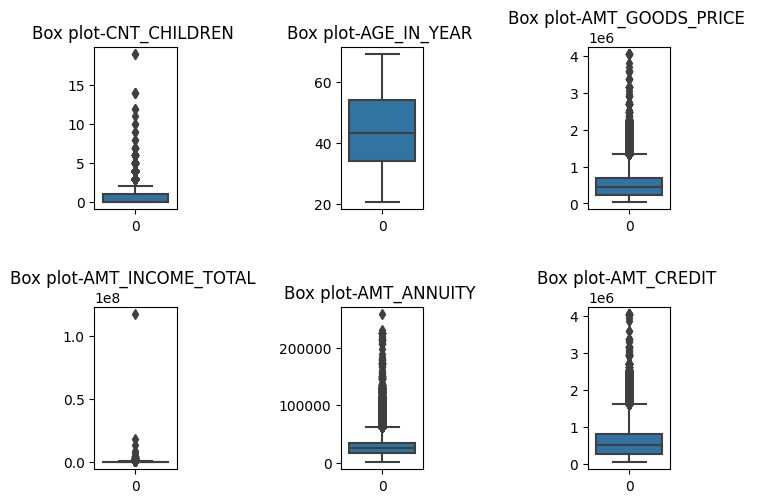

In [62]:
fig, axes = plt.subplots(nrows = 2, ncols = 3)
fig.subplots_adjust(left =0, bottom =0 , wspace = 2, hspace = 0.6)
for ax, column in zip(axes.flatten(), col_out):
  sns.boxplot(app_df_1[column], ax = ax)
  ax.set_title(f"Box plot-{column} ")
plt.show()



- Columns-  CNT_CHILDREN, AMT_GOODS_PRICE, AMT_INCOME_TOTAL, AMT_ANNUITY, AMT_CREDIT boxplot visualization shows some outliers
- In Columm -  AGE_IN_YEAR - No outlier detected

In [63]:
#So doing further analysis of columns showing outliers
combined_stats = pd.DataFrame()
for i in col_out:
  stat = app_df_1[i].describe()
  combined_stats = pd.concat([combined_stats, stat], axis=1)
combined_stats

CNT_CHILDREN    AGE_IN_YEAR  AMT_GOODS_PRICE  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000     3.072330e+05      3.075110e+05   
mean        0.417052      43.936976     5.383962e+05      1.687979e+05   
std         0.722121      11.956135     3.694465e+05      2.371231e+05   
min         0.000000      20.520000     4.050000e+04      2.565000e+04   
25%         0.000000      34.010000     2.385000e+05      1.125000e+05   
50%         0.000000      43.150000     4.500000e+05      1.471500e+05   
75%         1.000000      53.920000     6.795000e+05      2.025000e+05   
max        19.000000      69.120000     4.050000e+06      1.170000e+08   

         AMT_ANNUITY    AMT_CREDIT  
count  307499.000000  3.075110e+05  
mean    27108.573909  5.990260e+05  
std     14493.737315  4.024908e+05  
min      1615.500000  4.500000e+04  
25%     16524.000000  2.700000e+05  
50%     24903.000000  5.135310e+05  
75%     34596.000000  8.086500e+05  
max    258025.500000  4.050000e+06

##### As AMT_GOODS_PRICE, AMT_INCOME_TOTAL, AMT_CREDIT statistical analysis data is tough to read. So, for better analysis we have to divide it by 1000.

In [64]:
(app_df_1["AMT_GOODS_PRICE"]/1000).describe()

count    307233.000000
mean        538.396207
std         369.446461
min          40.500000
25%         238.500000
50%         450.000000
75%         679.500000
max        4050.000000
Name: AMT_GOODS_PRICE, dtype: float64

In [65]:
(app_df_1["AMT_INCOME_TOTAL"]/1000).describe()

count    307511.000000
mean        168.797919
std         237.123146
min          25.650000
25%         112.500000
50%         147.150000
75%         202.500000
max      117000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [66]:
(app_df_1["AMT_CREDIT"]/1000).describe()

count    307511.000000
mean        599.026000
std         402.490777
min          45.000000
25%         270.000000
50%         513.531000
75%         808.650000
max        4050.000000
Name: AMT_CREDIT, dtype: float64

In [67]:
for i in col_out:
  Q3 = app_df_1[i].quantile(0.75)
  Q1 = app_df_1[i].quantile(0.25)
# Calculate IQR (interquartile range)
  IQR = Q3 - Q1
# Calculate the lower bound for outliers
  lower_bound = Q1 - 1.5 * IQR
# Calculate the upper bound for outliers
  upper_bound = Q3 + 1.5 * IQR
# Count the number of outliers
  outliers = app_df_1[(app_df_1[i] < lower_bound) | (app_df_1[i] > upper_bound)]
  num_outliers = len(outliers)
# Calculate the percentage of outliers
  percentage_outliers = (num_outliers / len(app_df_1)) * 100
  print(f"Percentage of outliers in '{i}': {percentage_outliers:.2f}%")

Percentage of outliers in 'CNT_CHILDREN': 1.39%
Percentage of outliers in 'AGE_IN_YEAR': 0.00%
Percentage of outliers in 'AMT_GOODS_PRICE': 4.79%
Percentage of outliers in 'AMT_INCOME_TOTAL': 4.56%
Percentage of outliers in 'AMT_ANNUITY': 2.44%
Percentage of outliers in 'AMT_CREDIT': 2.13%


So, from above analysis columns -  CNT_CHILDREN, AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_ANNUITY,AMT_CREDIT are having outliers while column AGE_IN_YEAR having 0% outliers in data.

Binning using following columns
- AGE_GROUP
- AMT_INCOME_TYPE

In [68]:
#Taking columns with continuous data
app_df_1["AGE_GROUP"]= pd.cut(x= app_df_1.AGE_IN_YEAR, bins = [0, 20,30,40,50,60,100], labels = ["0-20","20-30","30-40","40-50","50-60","60-above"])
(app_df_1["AGE_GROUP"].value_counts(normalize= True)*100).round(2)

30-40       26.77
40-50       24.89
50-60       22.13
20-30       14.65
60-above    11.56
0-20         0.00
Name: AGE_GROUP, dtype: float64

In [69]:
(app_df_1["AMT_CREDIT"]/1000).describe()

count    307511.000000
mean        599.026000
std         402.490777
min          45.000000
25%         270.000000
50%         513.531000
75%         808.650000
max        4050.000000
Name: AMT_CREDIT, dtype: float64

In [70]:
app_df_1["AMT_INCOME_TYPE"]= pd.qcut(x =app_df_1["AMT_INCOME_TOTAL"], q =[0,0.2,0.4,0.6,0.9,1], labels =["VERY_LOW", "LOW", "MEDIUM", "HIGH", "VERY_HIGH"])
app_df_1["AMT_INCOME_TYPE"].value_counts()

HIGH         95470
LOW          85756
VERY_LOW     63671
MEDIUM       35453
VERY_HIGH    27161
Name: AMT_INCOME_TYPE, dtype: int64

In [71]:
app_df_1.shape

(307511, 46)

In [72]:
#Checking and handling missing value in other Data frame
round((pre_df.isnull().mean()*100).sort_values(),2)

SK_ID_PREV                      0.00
NAME_YIELD_GROUP                0.00
NAME_SELLER_INDUSTRY            0.00
SELLERPLACE_AREA                0.00
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
NAME_PORTFOLIO                  0.00
NAME_GOODS_CATEGORY             0.00
NAME_CLIENT_TYPE                0.00
CODE_REJECT_REASON              0.00
DAYS_DECISION                   0.00
NAME_CONTRACT_STATUS            0.00
NAME_CASH_LOAN_PURPOSE          0.00
NAME_PAYMENT_TYPE               0.00
AMT_APPLICATION                 0.00
NFLAG_LAST_APPL_IN_DAY          0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
HOUR_APPR_PROCESS_START         0.00
WEEKDAY_APPR_PROCESS_START      0.00
NAME_CONTRACT_TYPE              0.00
SK_ID_CURR                      0.00
AMT_CREDIT                      0.00
PRODUCT_COMBINATION             0.02
CNT_PAYMENT                    22.29
AMT_ANNUITY                    22.29
AMT_GOODS_PRICE                23.08
DAYS_LAST_DUE                  40.30
D

In [73]:
pre_df.shape

(1670214, 37)

In [74]:
pre_df_1 = pre_df.drop(pre_df.columns[pre_df.apply(lambda x : x.isnull().mean()*100>40)], axis =1)
pre_df_1.shape


(1670214, 26)

In [75]:
#Dropping unwanted columns
col_drop3 = ["NFLAG_LAST_APPL_IN_DAY","FLAG_LAST_APPL_PER_CONTRACT","HOUR_APPR_PROCESS_START","WEEKDAY_APPR_PROCESS_START"]
pre_df_1.drop(columns = col_drop3, axis =1,inplace = True)

In [76]:
pre_df_1.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0     17145.0          17145.0                    XAP             Approved   
1    679671.0         607500.0                    XNA             Approved   
2    136444.5         112500.0                    XNA             Approved   
3    470790.0         450000.0                    XNA             Approved   
4    404055.0         337500.0                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0            -73  Cash through the bank                XAP         Repeater   
1           -164                    XNA                XAP         Repeater   
2           -301  Cash through the bank                XAP         Repeater   
3           -512  Cash through the bank                XAP         Repeater   
4           -781  Cash through the bank                 HC         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Mobile            POS               XNA   
1                 XNA           Cash            x-sell   
2                 XNA           Cash            x-sell   
3                 XNA           Cash            x-sell   
4                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  
0         12.0           middle  POS mobile with interest  
1         36.0       low_action          Cash X-Sell: low  
2         12.0             high         Cash X-Sell: high  
3         12.0           middle       Cash X-Sell: middle  
4         24.0             high         Cash Street: high

Treating negative values in DAYS_DECISION COLUMN


In [77]:
pre_df_1["DAYS_DECISION"] = round((pre_df_1["DAYS_DECISION"]/365).abs(),2)
pre_df_1["DAYS_DECISION"]

0          0.20
1          0.45
2          0.82
3          1.40
4          2.14
           ... 
1670209    1.49
1670210    4.64
1670211    4.08
1670212    3.25
1670213    3.27
Name: DAYS_DECISION, Length: 1670214, dtype: float64

In [78]:
(pre_df_1.isnull().mean()*100).sort_values(ascending = False)

AMT_GOODS_PRICE           23.081773
AMT_ANNUITY               22.286665
CNT_PAYMENT               22.286366
PRODUCT_COMBINATION        0.020716
AMT_CREDIT                 0.000060
NAME_GOODS_CATEGORY        0.000000
NAME_YIELD_GROUP           0.000000
NAME_SELLER_INDUSTRY       0.000000
SELLERPLACE_AREA           0.000000
CHANNEL_TYPE               0.000000
NAME_PRODUCT_TYPE          0.000000
NAME_PORTFOLIO             0.000000
SK_ID_PREV                 0.000000
NAME_CLIENT_TYPE           0.000000
SK_ID_CURR                 0.000000
NAME_PAYMENT_TYPE          0.000000
DAYS_DECISION              0.000000
NAME_CONTRACT_STATUS       0.000000
NAME_CASH_LOAN_PURPOSE     0.000000
AMT_APPLICATION            0.000000
NAME_CONTRACT_TYPE         0.000000
CODE_REJECT_REASON         0.000000
dtype: float64

Merging Data set

In [79]:
merged_df = pd.merge(app_df_1,pre_df_1, how = "inner", on = "SK_ID_CURR")
merged_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
3               N             0          270000.0     1293502.5   
4               Y             0           67500.0      135000.0   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0        24700.5           351000.0   Unaccompanied          Working   
1        35698.5          1129500.0          Family    State servant   
2        35698.5          1129500.0          Family    State servant   
3        35698.5          1129500.0          Family    State servant   
4         6750.0           135000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  AGE_IN_YEAR  YEARS_EMPLOYED  \
0                    0.018801        25.92            1.75   
1                    0.003541        45.93            3.25   
2                    0.003541        45.93            3.25   
3                    0.003541        45.93            3.25   
4                    0.010032        52.18            0.62   

   YEARS_REGISTRATION  YEARS_ID_PUBLISH OCCUPATION_TYPE  \
0                9.99              5.81        Laborers   
1                3.25              0.80      Core staff   
2                3.25              0.80      Core staff   
3                3.25              0.80      Core staff   
4               11.67              6.93        Laborers   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                       11   
3                     MONDAY                       11   
4                     MONDAY                        9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0                  School   
3                       0                        0                  School   
4                       0                        0              Government   

   EXT_SOURCE_2  EXT_

In [80]:
merged_df.shape

(1413701, 67)

In [81]:
merged_df.describe()

SK_ID_CURR        TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  1.413701e+06  1.413701e+06  1.413701e+06      1.413701e+06   
mean   2.784813e+05  8.655296e-02  4.048933e-01      1.733160e+05   
std    1.028118e+05  2.811789e-01  7.173454e-01      1.985734e+05   
min    1.000020e+05  0.000000e+00  0.000000e+00      2.565000e+04   
25%    1.893640e+05  0.000000e+00  0.000000e+00      1.125000e+05   
50%    2.789920e+05  0.000000e+00  0.000000e+00      1.575000e+05   
75%    3.675560e+05  0.000000e+00  1.000000e+00      2.070000e+05   
max    4.562550e+05  1.000000e+00  1.900000e+01      1.170000e+08   

       AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  \
count  1.413701e+06   1.413608e+06       1.412493e+06   
mean   5.875537e+05   2.701702e+04       5.277186e+05   
std    3.849173e+05   1.395116e+04       3.532465e+05   
min    4.500000e+04   1.615500e+03       4.050000e+04   
25%    2.700000e+05   1.682100e+04       2.385000e+05   
50%    5.084955e+05   2.492550e+04       4.500000e+05   
75%    8.079840e+05   3.454200e+04       6.795000e+05   
max    4.050000e+06   2.250000e+05       4.050000e+06   

       REGION_POPULATION_RELATIVE   AGE_IN_YEAR  YEARS_EMPLOYED  \
count                1.413701e+06  1.413701e+06    1.413701e+06   
mean                 2.074985e-02  4.471522e+01    1.990788e+02   
std                  1.334702e-02  1.190290e+01    3.927068e+02   
min                  2.900000e-04  2.052000e+01    0.000000e+00   
25%                  1.003200e-02  3.490000e+01    2.850000e+00   
50%                  1.885000e-02  4.396000e+01    6.580000e+00   
75%                  2.866300e-02  5.474000e+01    1.730000e+01   
max                  7.250800e-02  6.904000e+01    1.000670e+03   

       YEARS_REGISTRATION  YEARS_ID_PUBLISH  HOUR_APPR_PROCESS_START  \
count        1.413701e+06      1.413701e+06             1.413701e+06   
mean         1.370748e+01      8.313884e+00             1.198433e+01   
std          9.728901e+00      4.129784e+00             3.232181e+00   
min          0.000000e+00      0.000000e+00             0.000000e+00   
25%          5.480000e+00      4.880000e+00             1.000000e+01   
50%          1.235000e+01      9.120000e+00             1.200000e+01   
75%          2.058000e+01      1.183000e+01             1.400000e+01   
max          6.759000e+01      1.972000e+01             2.300000e+01   

       REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
count                1.413701e+06                1.413701e+06   
mean                 1.207327e-02                4.396686e-02   
std                  1.092132e-01                2.050215e-01   
min                  0.000000e+00                0.000000e+00   
25%                  0.000000e+00                0.000000e+00   
50%                  0.000000e+00                0.000000e+00   
75%                  0.000000e+00                0.000000e+00   
max                  1.000000e+00                1.000000e+00   

       LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
count                 1.413701e+06            1.413701e+06   
mean                  3.604793e-02            7.360538e-02   
std                   1.864095e-01            2.611277e-01   
min                   0.000000e+00            0.000000e+00   
25%                   0.000000e+00            0.000000e+00   
50%                   0.000000e+00            0.000000e+00   
75%                   0.000000e+00            0.000000e+00   
max                   1.000000e+00            1.000000e+00   

       REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_2  \
count            1.413701e+06             1.413701e+06  1.411880e+06   
mean             2.221481e-01             1.740601e-01  5.114275e-01   
std              4.156903e-01             3.791613e-01  1.911188e-01   
min              0.000000e+00             0.000000e+00  8.173617e-08   
25%              0.000000e+00             0.000000e+00  3.890839e-01   
50%              0.000000e+00             0

#Checking data imbalance
###### Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)

In [82]:
#Finding percentage of client with outstanding dues/payment difficulties and no outstanding dues.(In merged data set)
Target_0 = merged_df.loc[merged_df["TARGET"]==0]
Target_1 = merged_df.loc[merged_df["TARGET"]==1]
merged_target_counts = merged_df["TARGET"].value_counts()
merged_target_counts

0    1291341
1     122360
Name: TARGET, dtype: int64

In [83]:
#Calculating data imbalance in merged data set
round(len(Target_0)/len(Target_1),2)

10.55

In [84]:
#Calculating data imbalance for primary data set
Target0 = app_df_1.loc[app_df_1["TARGET"]==0]
Target1 = app_df_1.loc[app_df_1["TARGET"]==1]
target_counts = app_df_1["TARGET"].value_counts()
target_counts

0    282686
1     24825
Name: TARGET, dtype: int64

In [85]:
# Data imbalance ratio of Target variable in main data frame
round(len(Target0)/len(Target1),2)

11.39

Plotting pie chart for data imbalance in merged dataframe

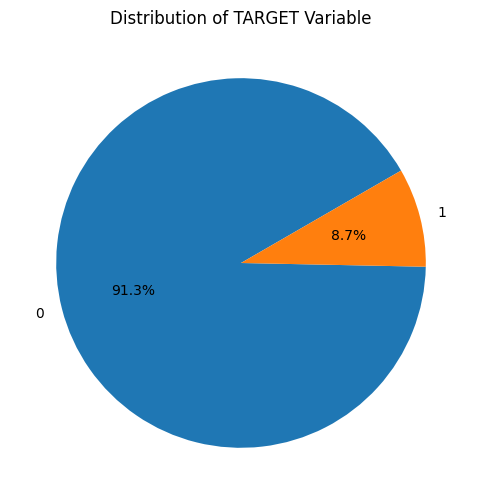

In [86]:
plt.figure(figsize=(6, 6))
plt.pie(merged_target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=30)
plt.title('Distribution of TARGET Variable')
plt.show()

Checking number of unique values in columns

In [87]:
merged_df.nunique().sort_values()

TARGET                               2
NAME_CONTRACT_TYPE_x                 2
CODE_GENDER                          2
FLAG_OWN_CAR                         2
FLAG_OWN_REALTY                      2
REG_REGION_NOT_LIVE_REGION           2
REG_REGION_NOT_WORK_REGION           2
LIVE_REGION_NOT_WORK_REGION          2
REG_CITY_NOT_LIVE_CITY               2
LIVE_CITY_NOT_WORK_CITY              2
REG_CITY_NOT_WORK_CITY               2
NAME_PRODUCT_TYPE                    3
NAME_CLIENT_TYPE                     4
NAME_CONTRACT_TYPE_y                 4
NAME_CONTRACT_STATUS                 4
NAME_PAYMENT_TYPE                    4
AMT_INCOME_TYPE                      5
NAME_YIELD_GROUP                     5
AMT_REQ_CREDIT_BUREAU_HOUR           5
AGE_GROUP                            5
NAME_FAMILY_STATUS                   5
NAME_EDUCATION_TYPE                  5
NAME_PORTFOLIO                       5
NAME_HOUSING_TYPE                    6
WEEKDAY_APPR_PROCESS_START           7
NAME_INCOME_TYPE         

Column with dtype as object or number of unique values less than 40 values is considered as categorical. And remaining columns will be considered as type int or float will be considered numerical.

In [88]:
numerical_columns = []
categorical_columns = []
for col in merged_df.columns:
    nunique_count = merged_df[col].nunique()
    if nunique_count > 40:
        numerical_columns.append(col)
    else:
        categorical_columns.append(col)
columns_divided = [numerical_columns, categorical_columns]

In [89]:
print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)

Numerical Columns: ['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'REGION_POPULATION_RELATIVE', 'AGE_IN_YEAR', 'YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_LAST_PHONE_CHANGE', 'SK_ID_PREV', 'AMT_ANNUITY_y', 'AMT_APPLICATION', 'AMT_CREDIT_y', 'AMT_GOODS_PRICE_y', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT']
Categorical Columns: ['TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT

Univariate analysis of Categorical columns together using subplots

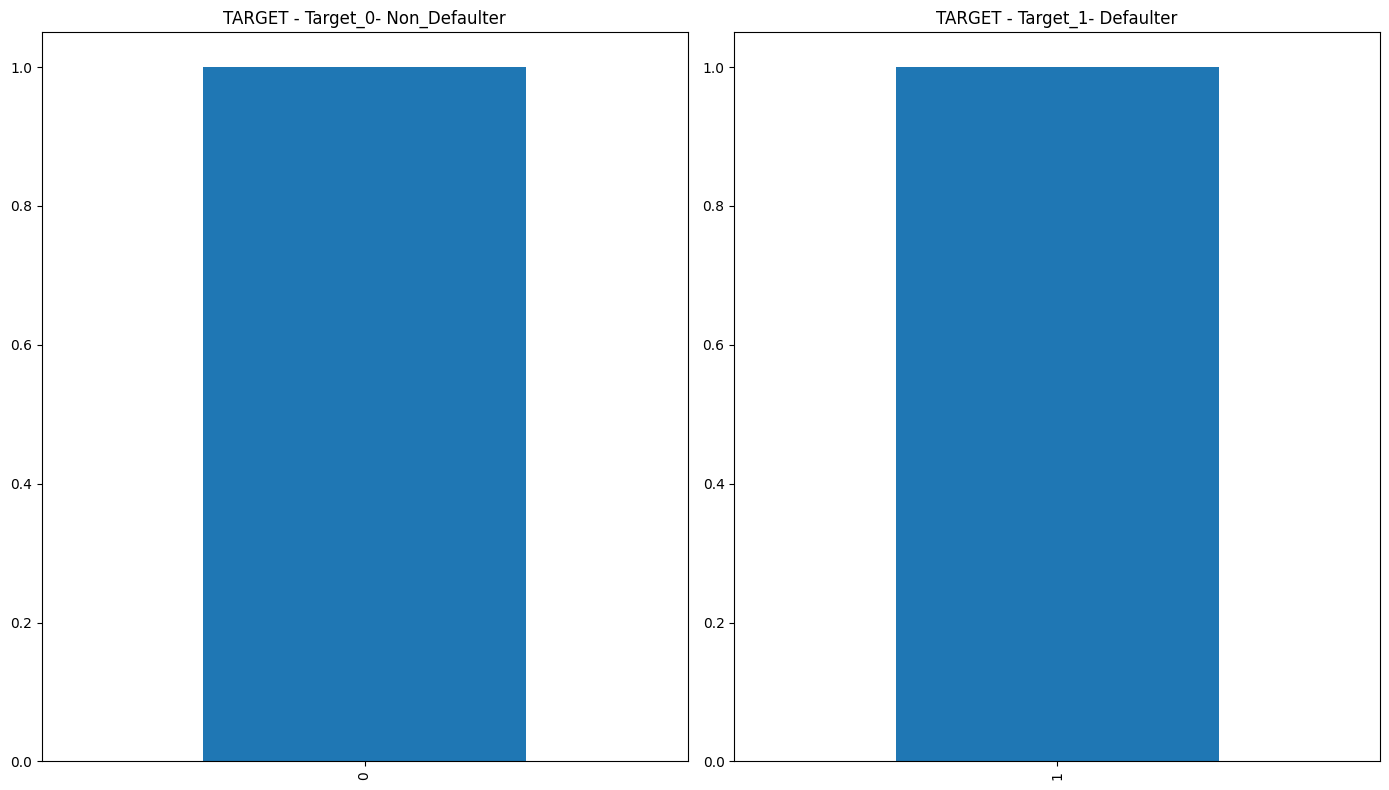

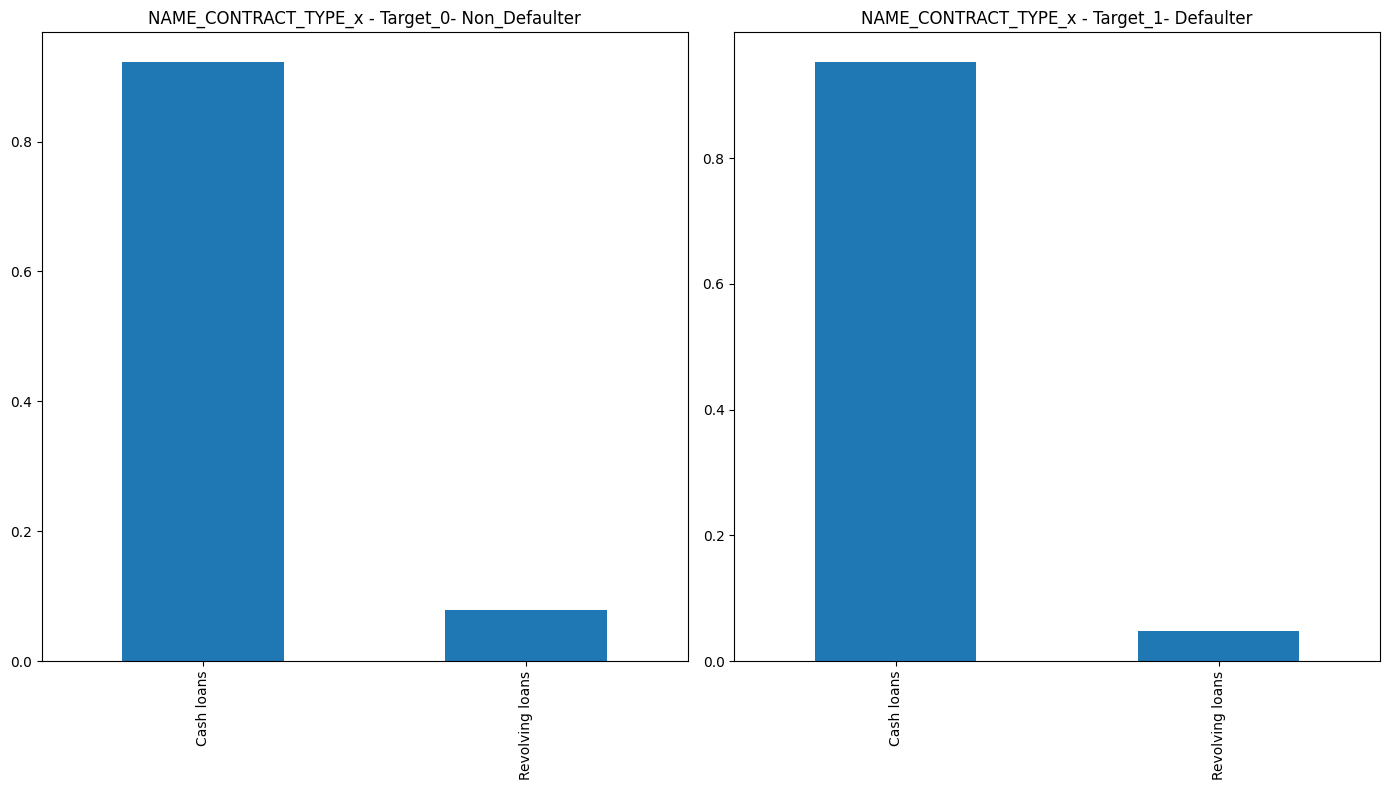

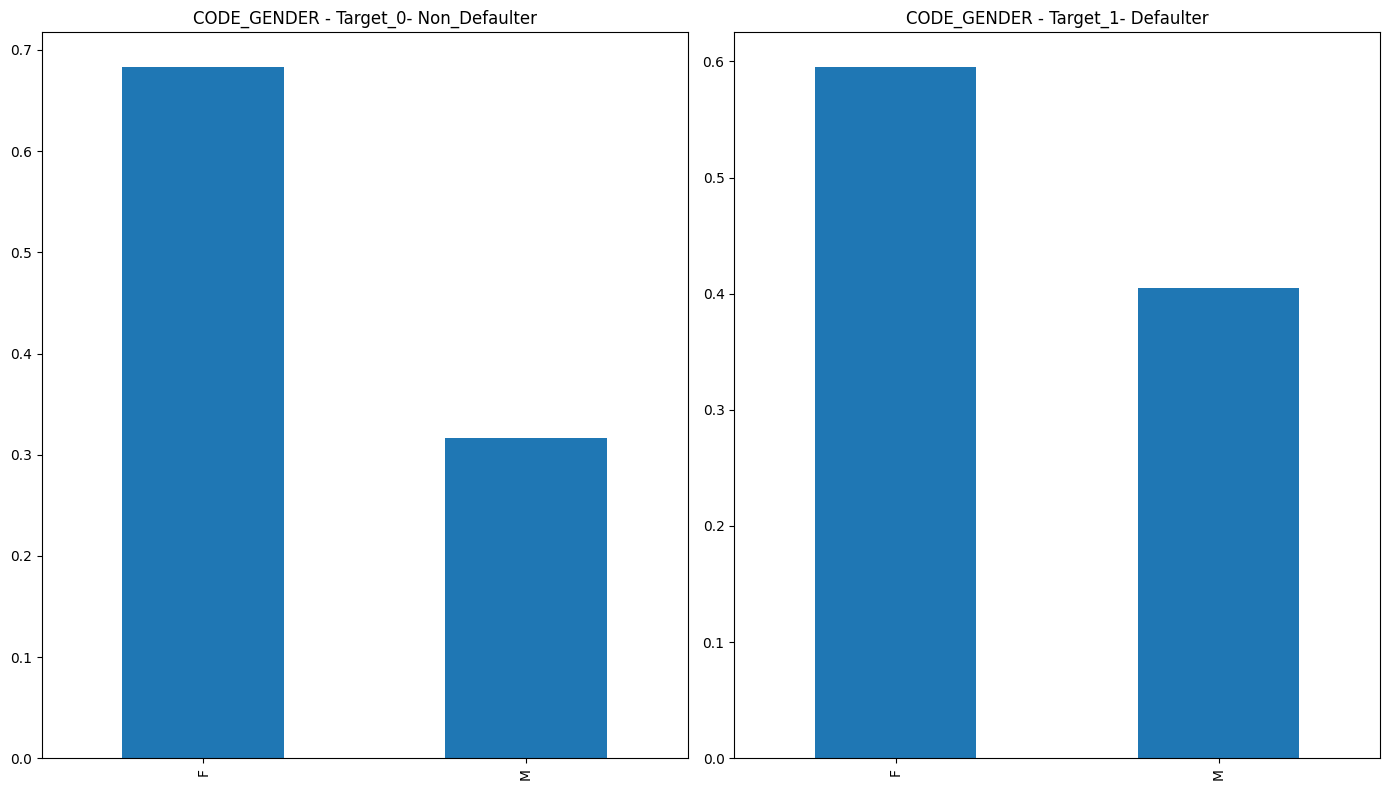

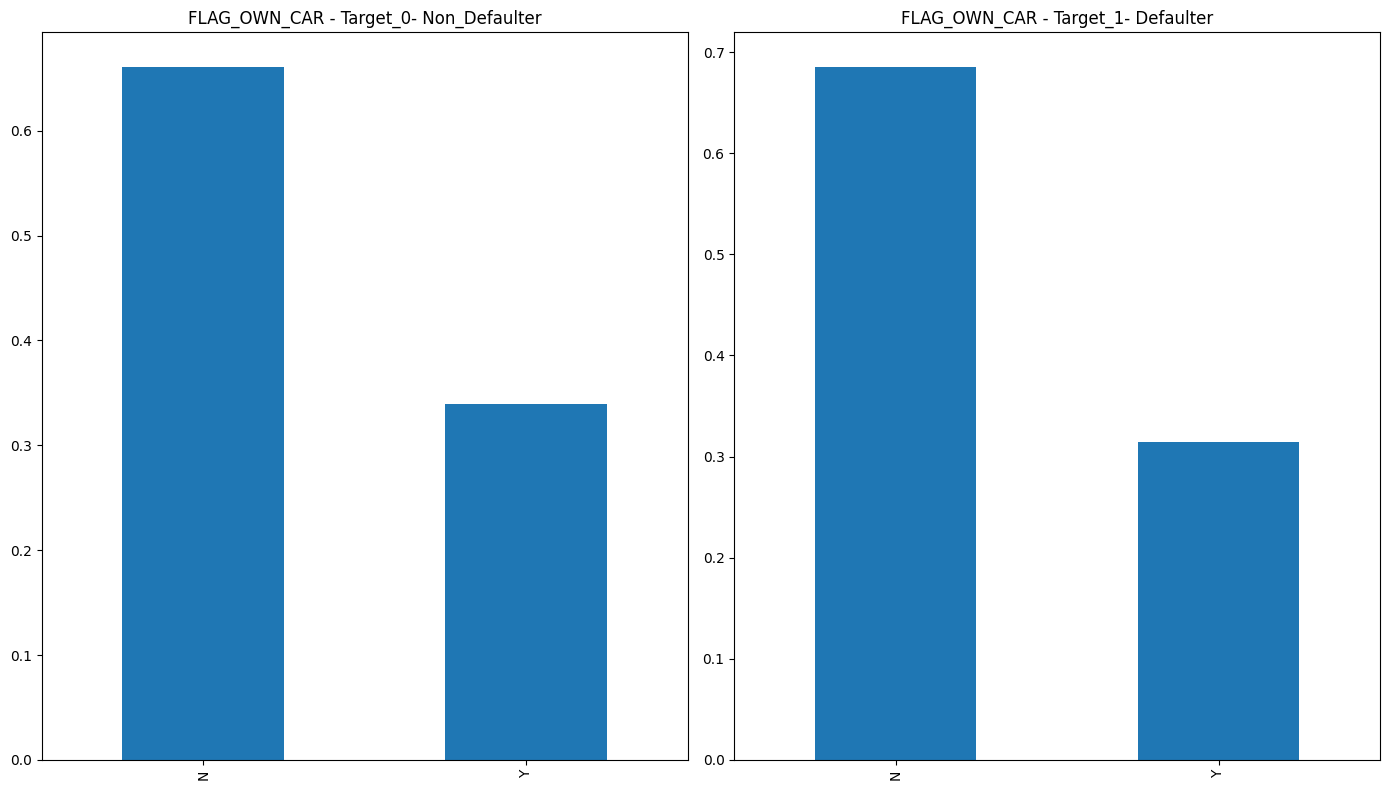

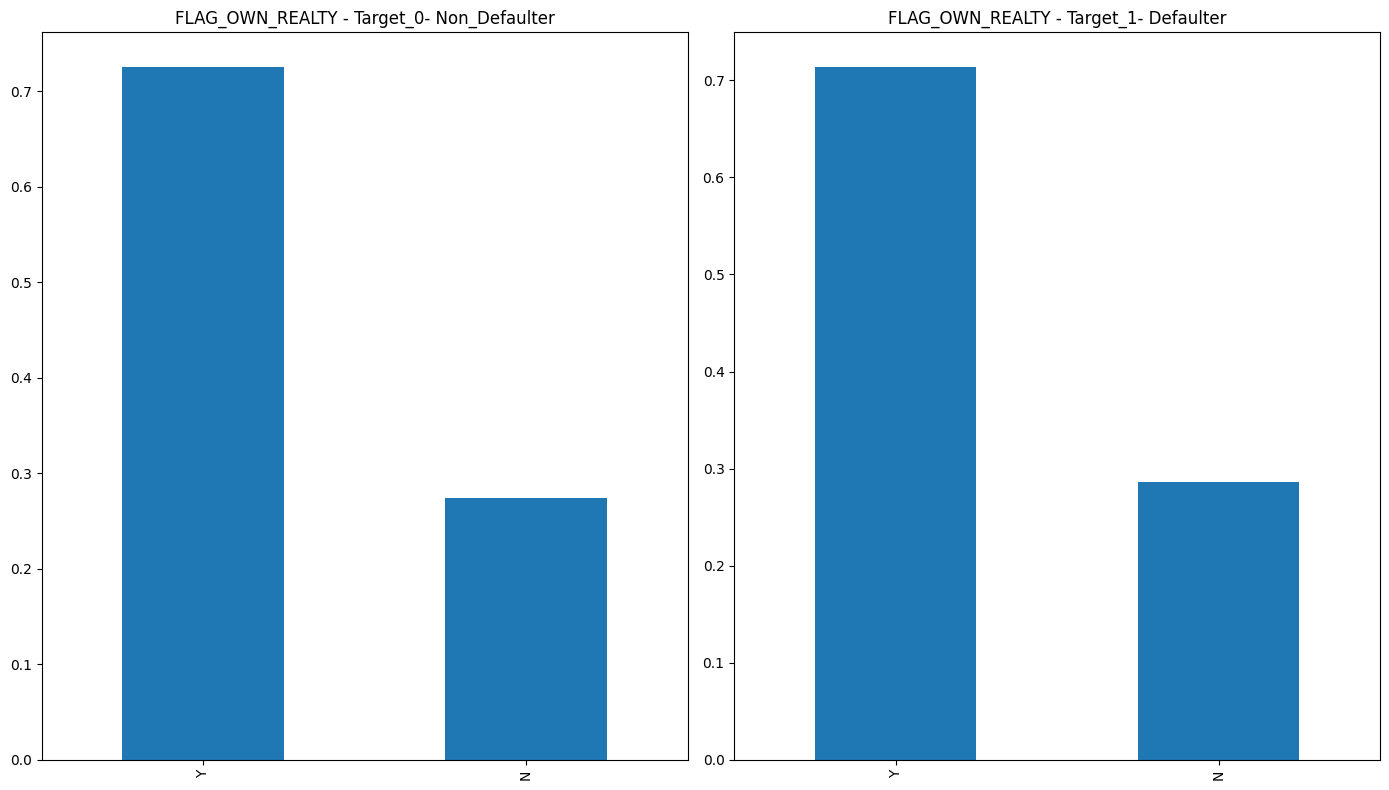

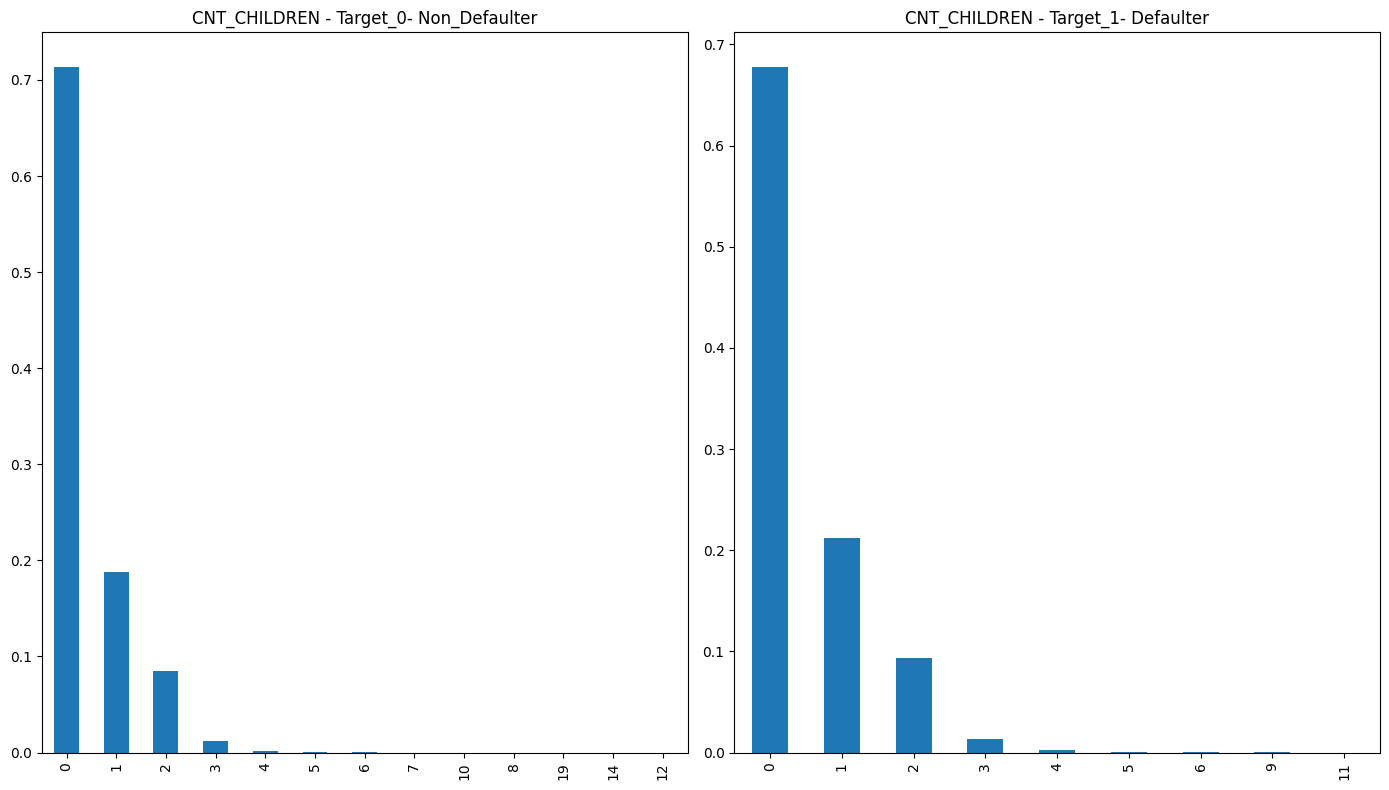

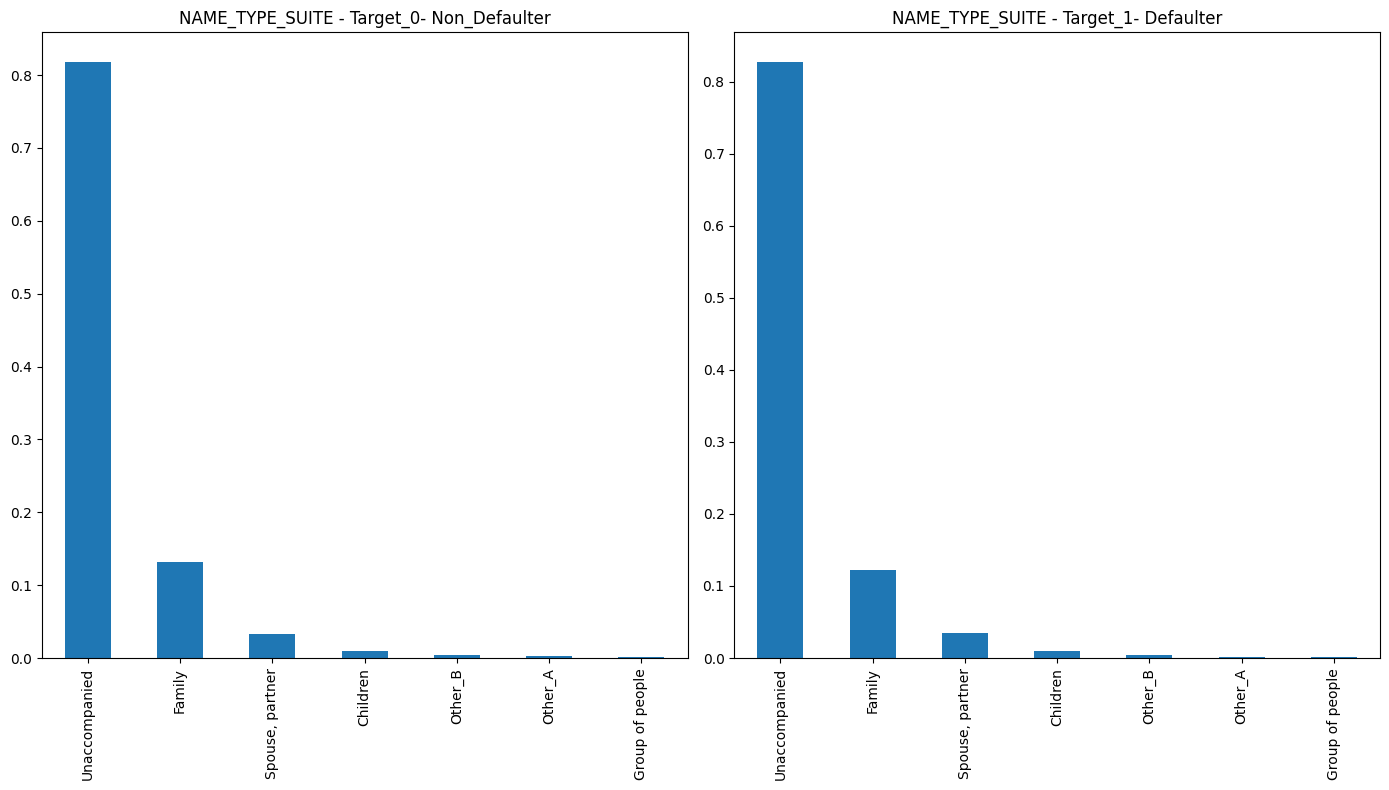

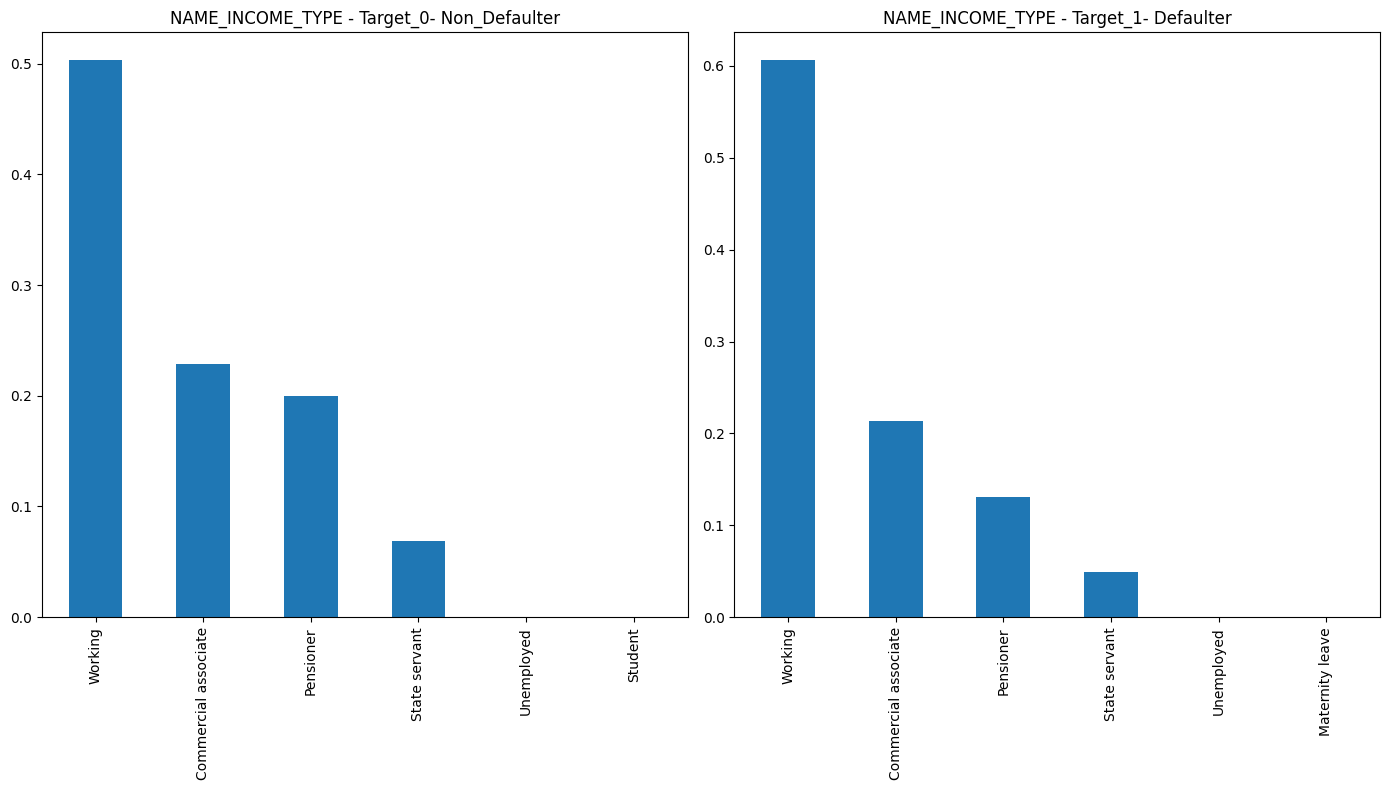

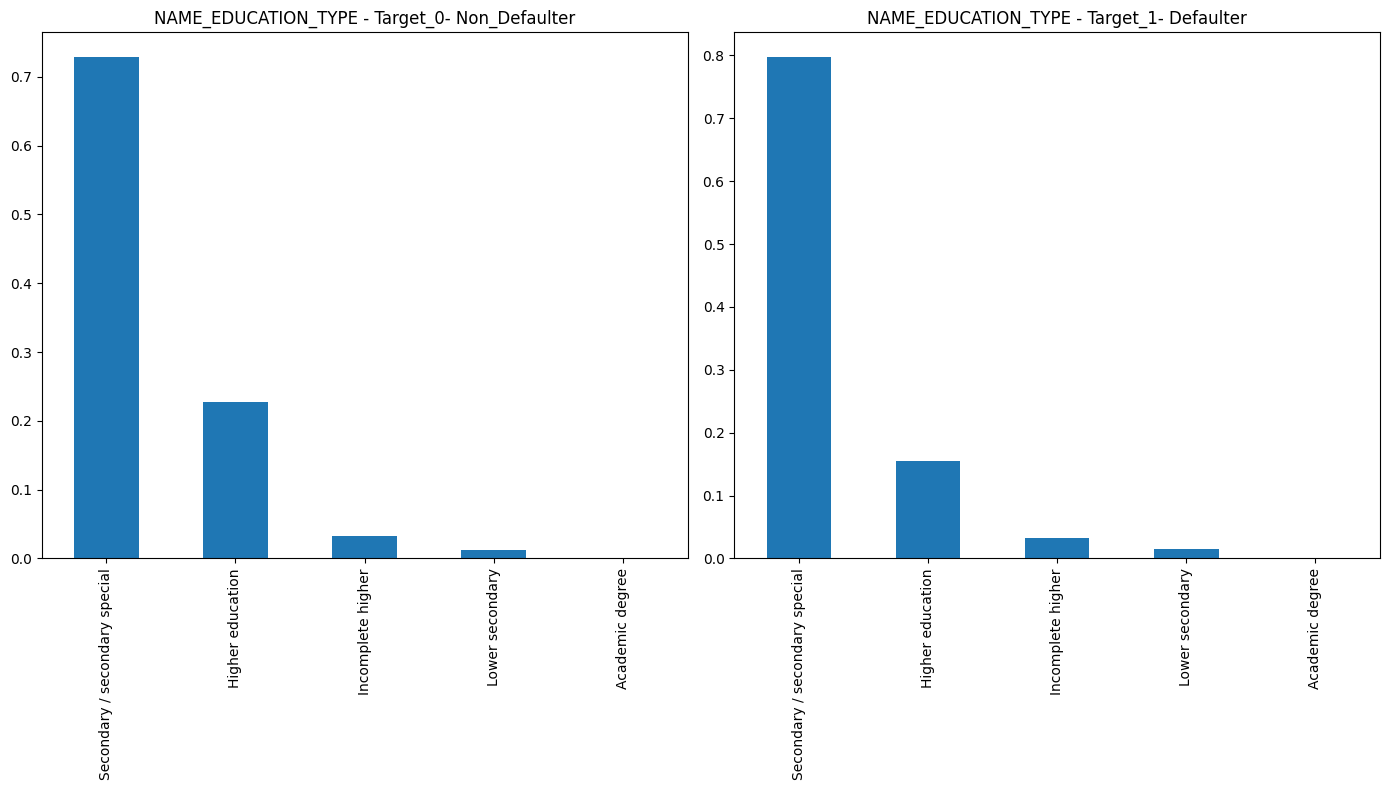

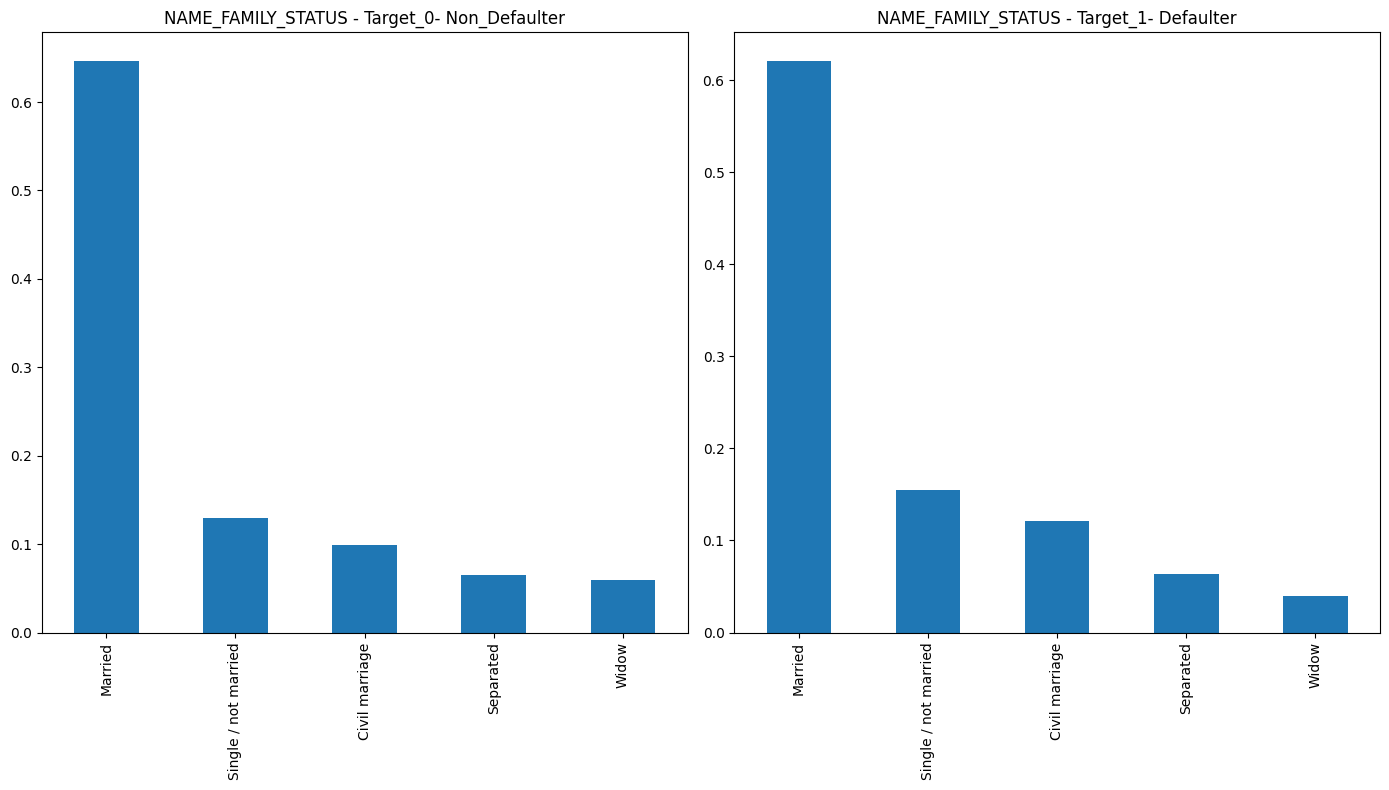

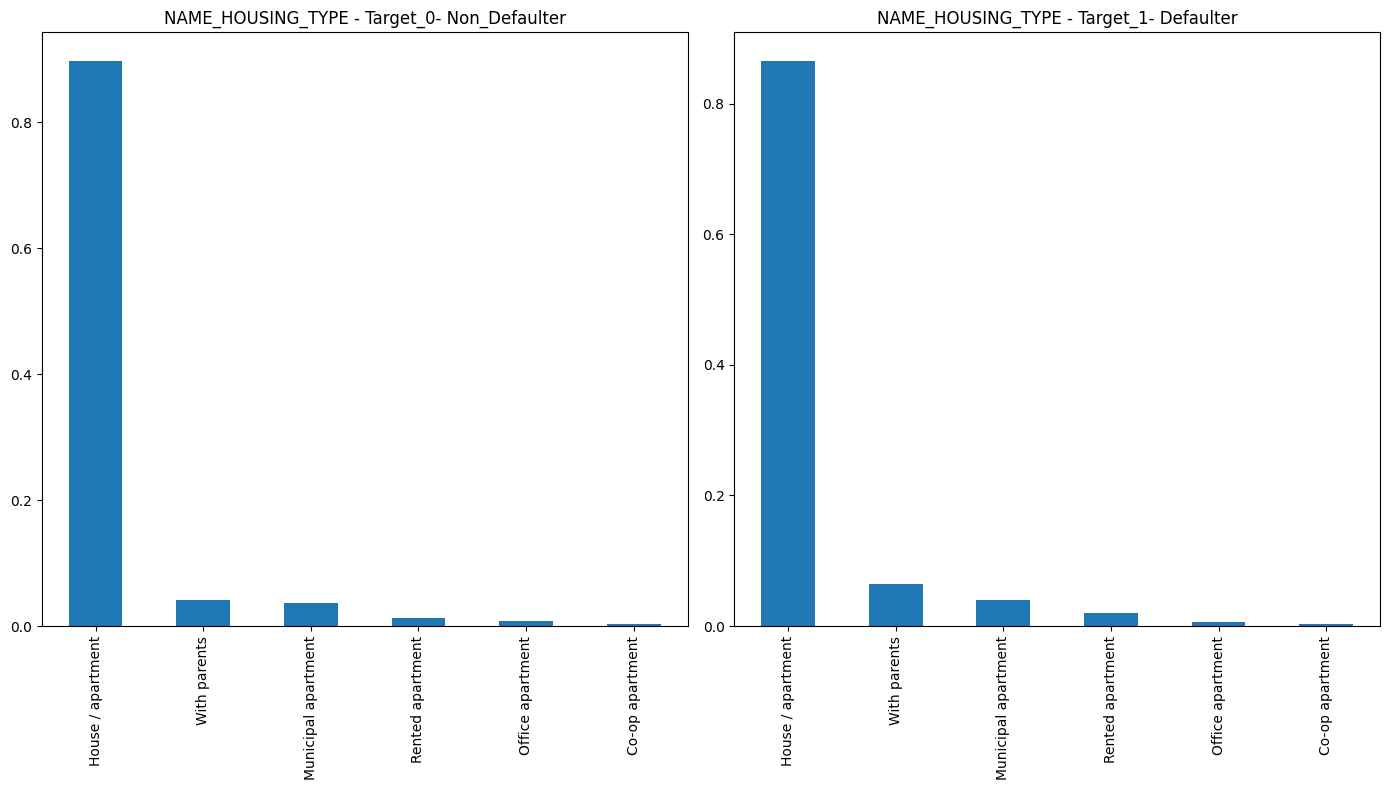

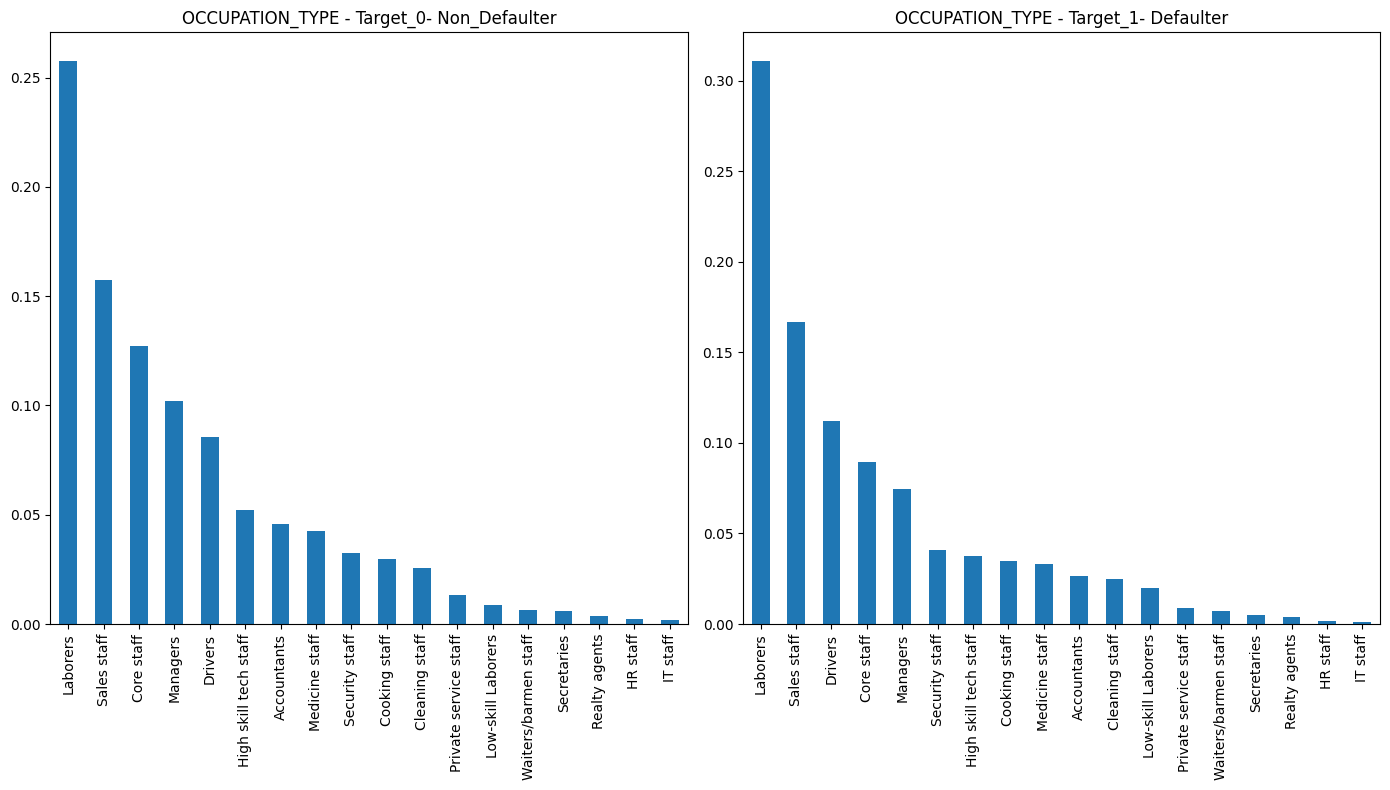

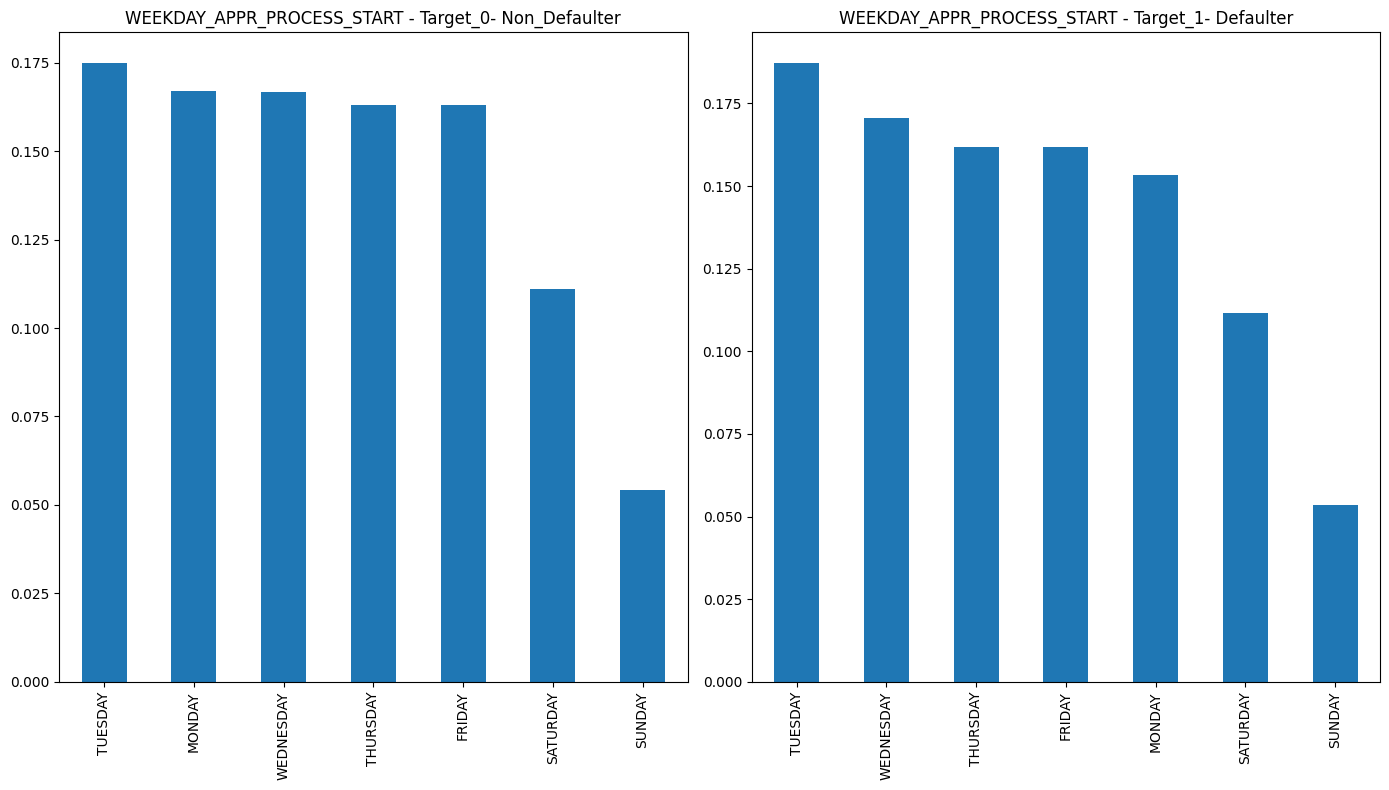

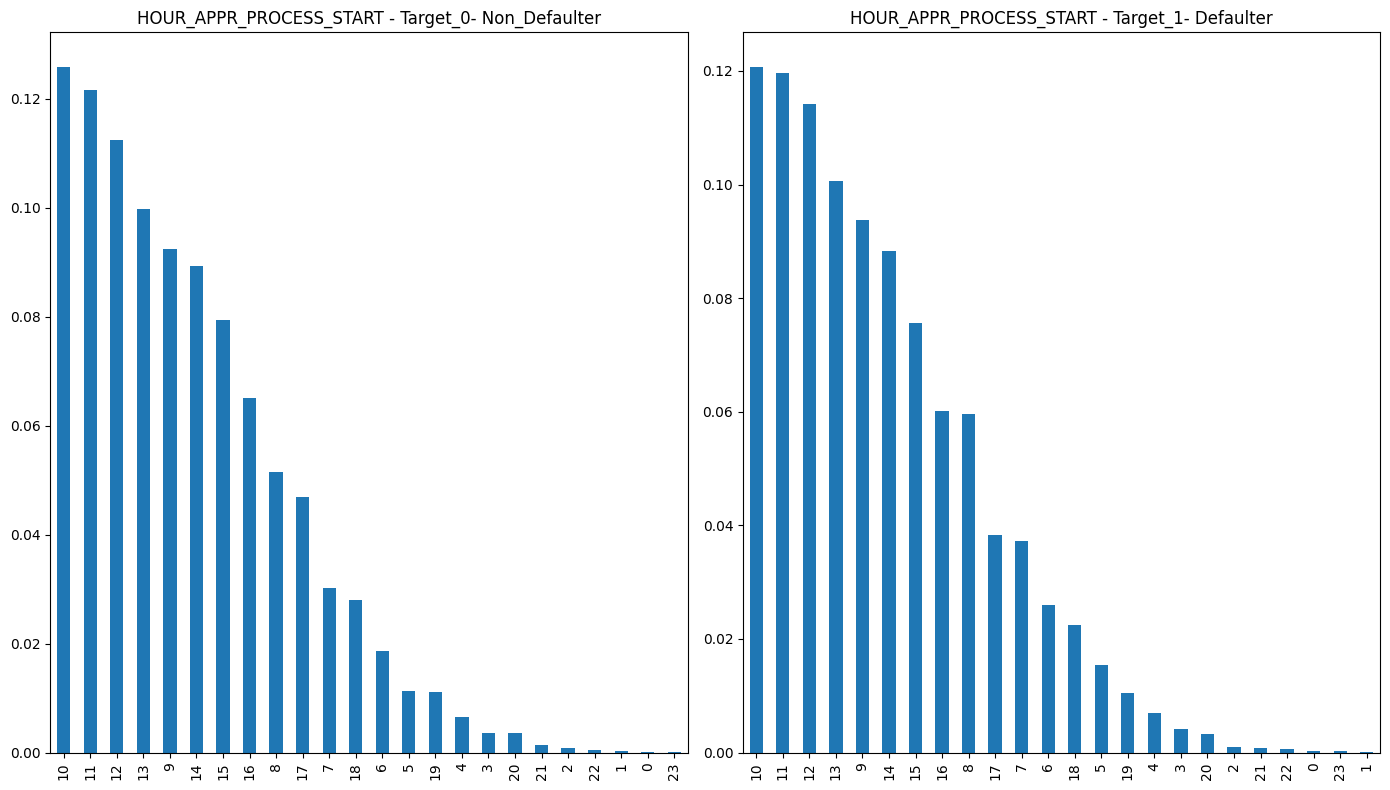

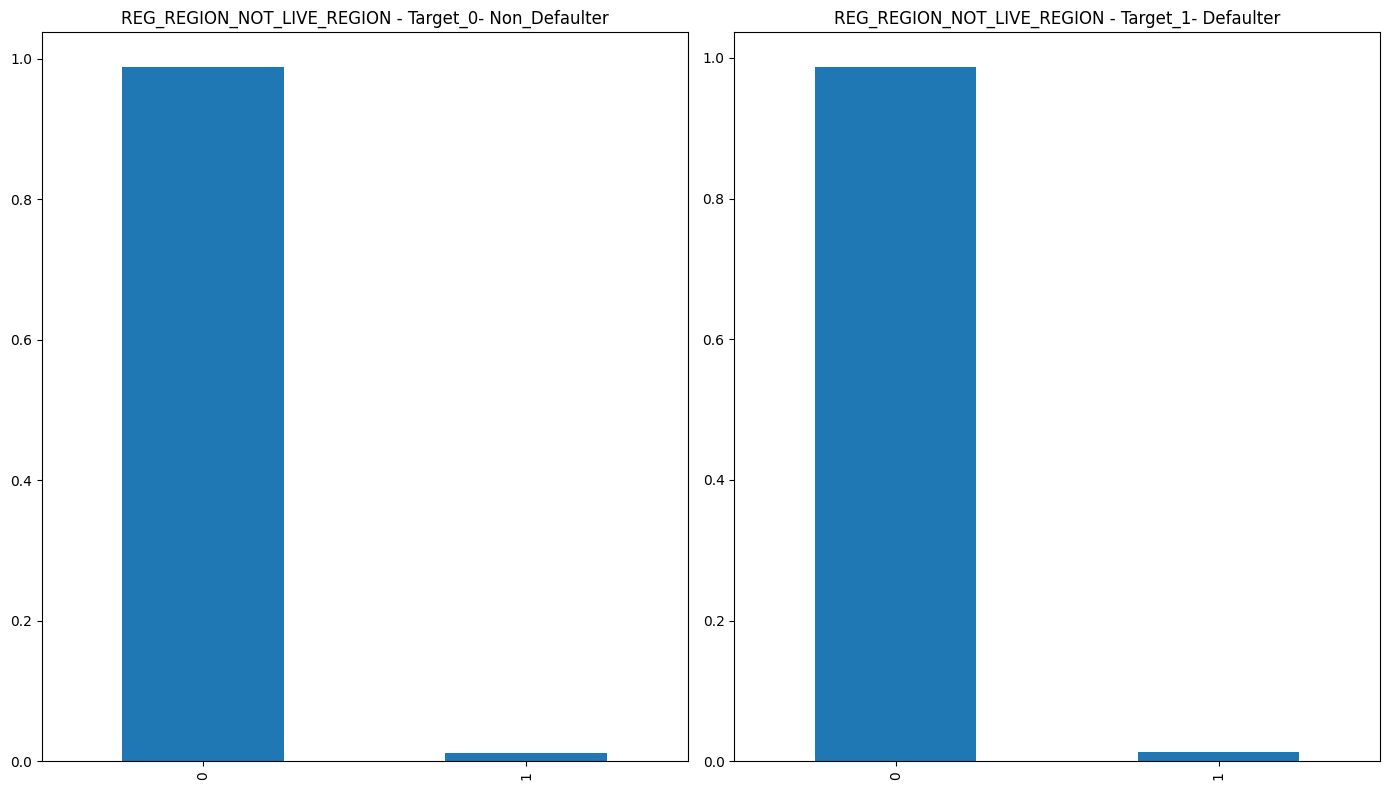

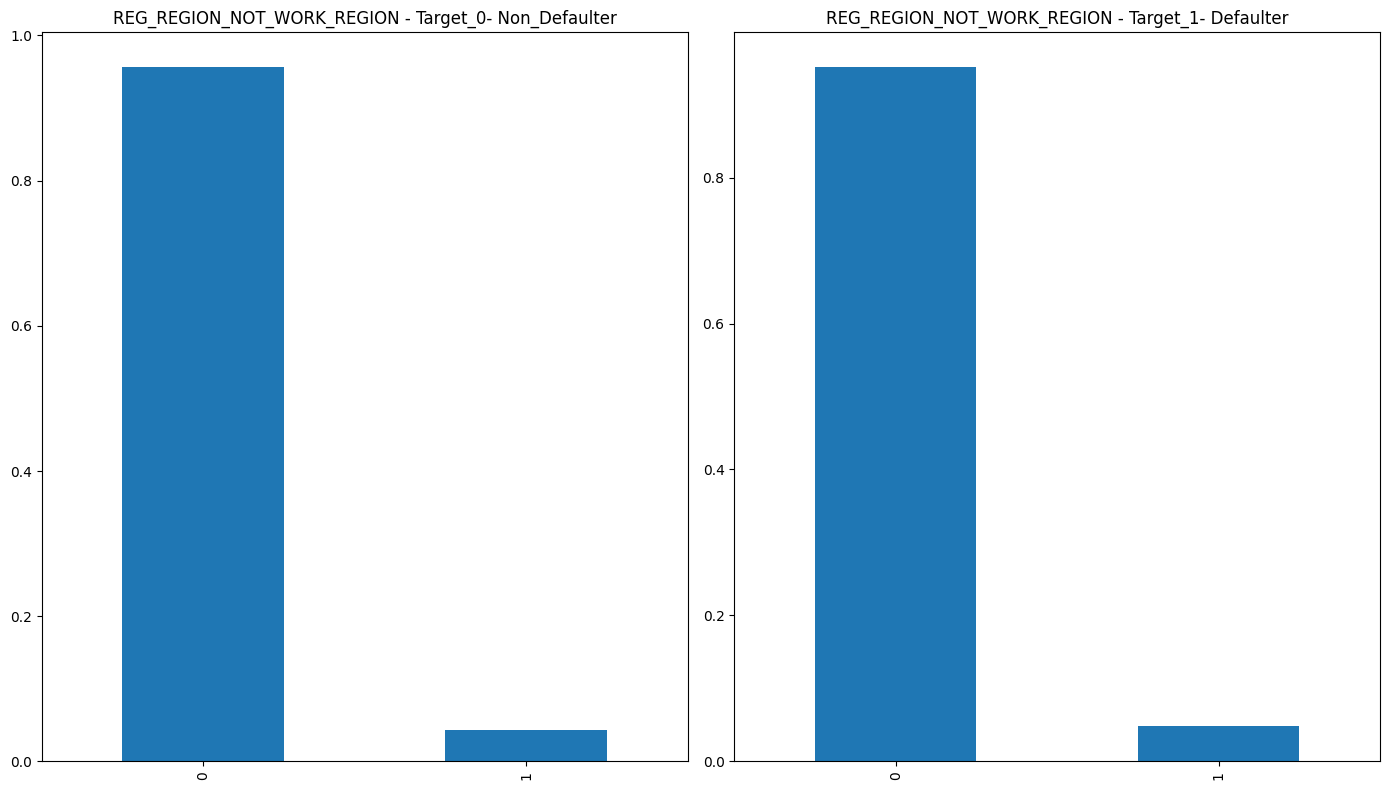

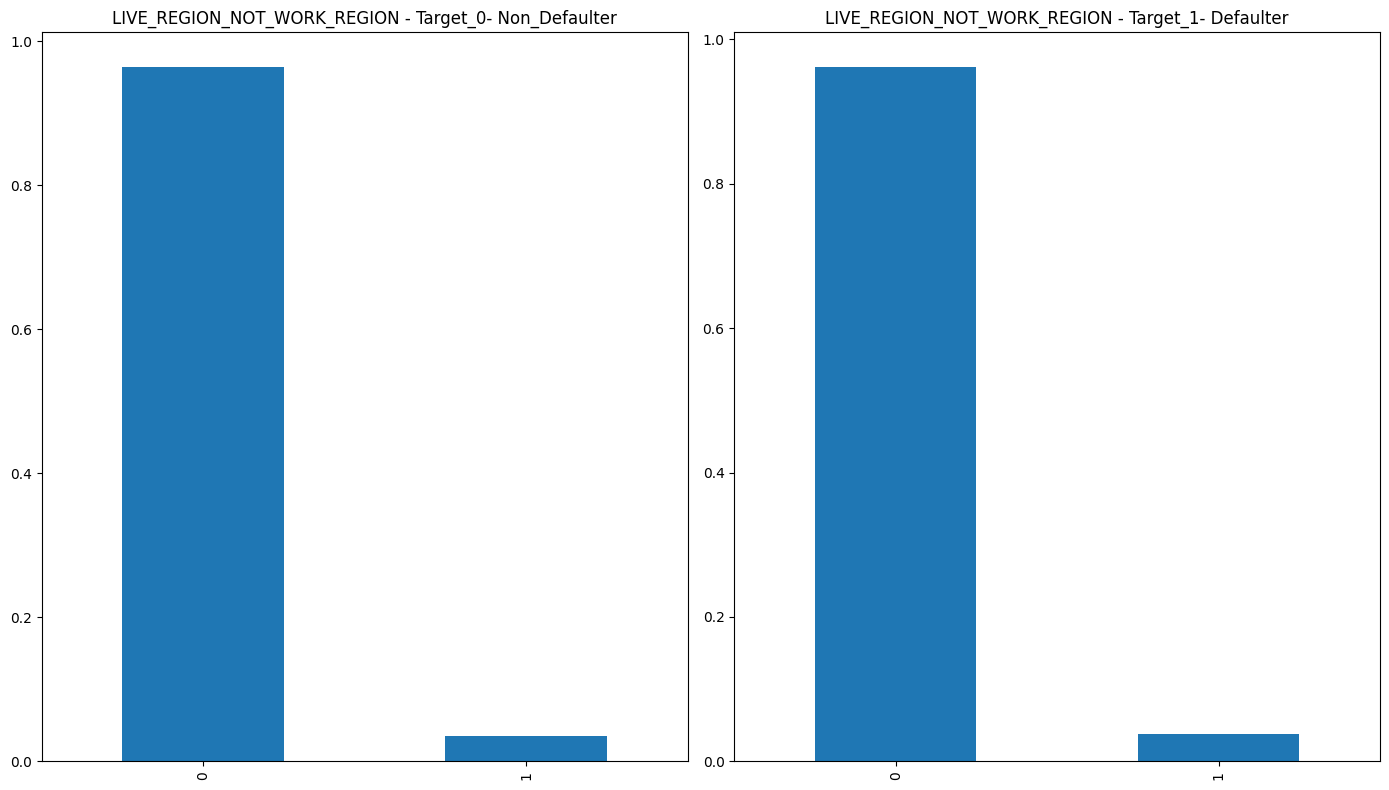

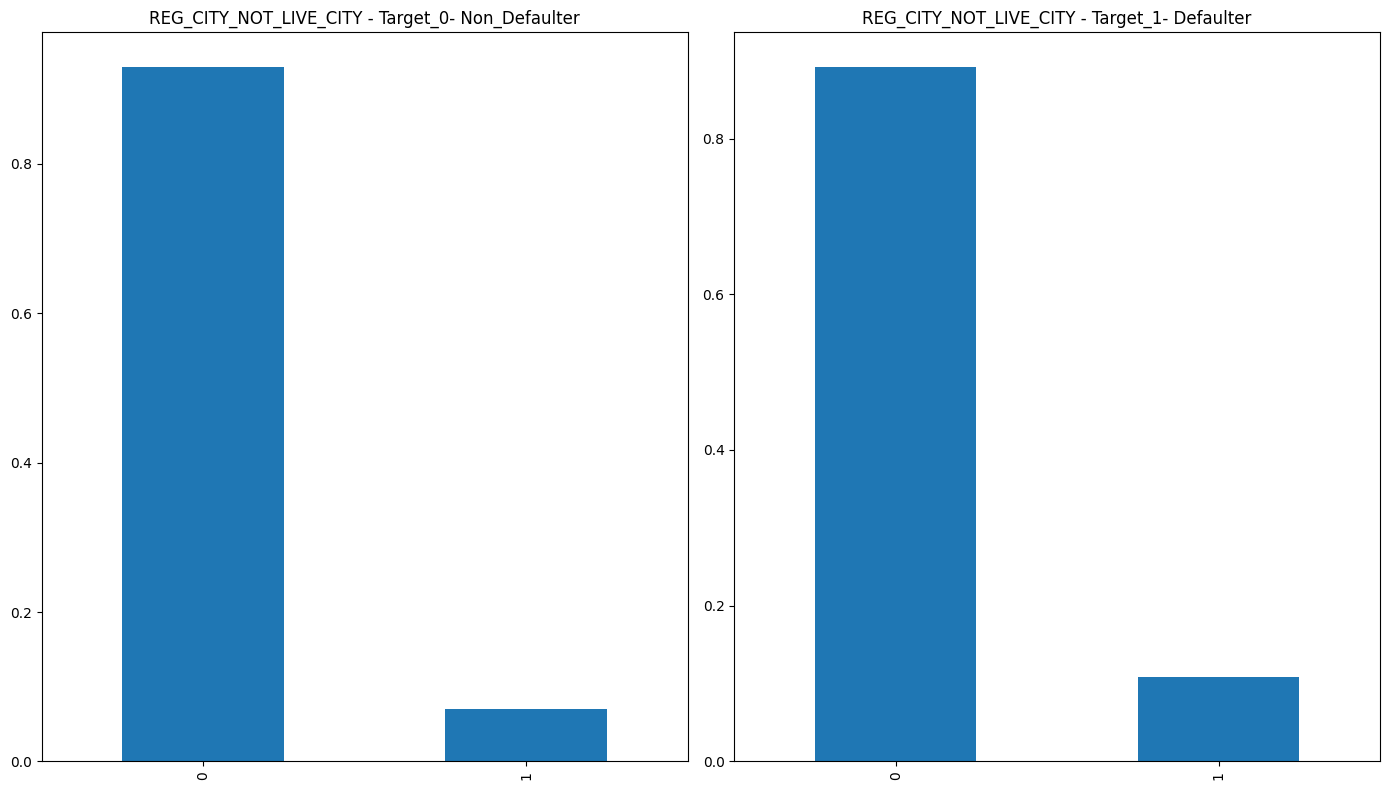

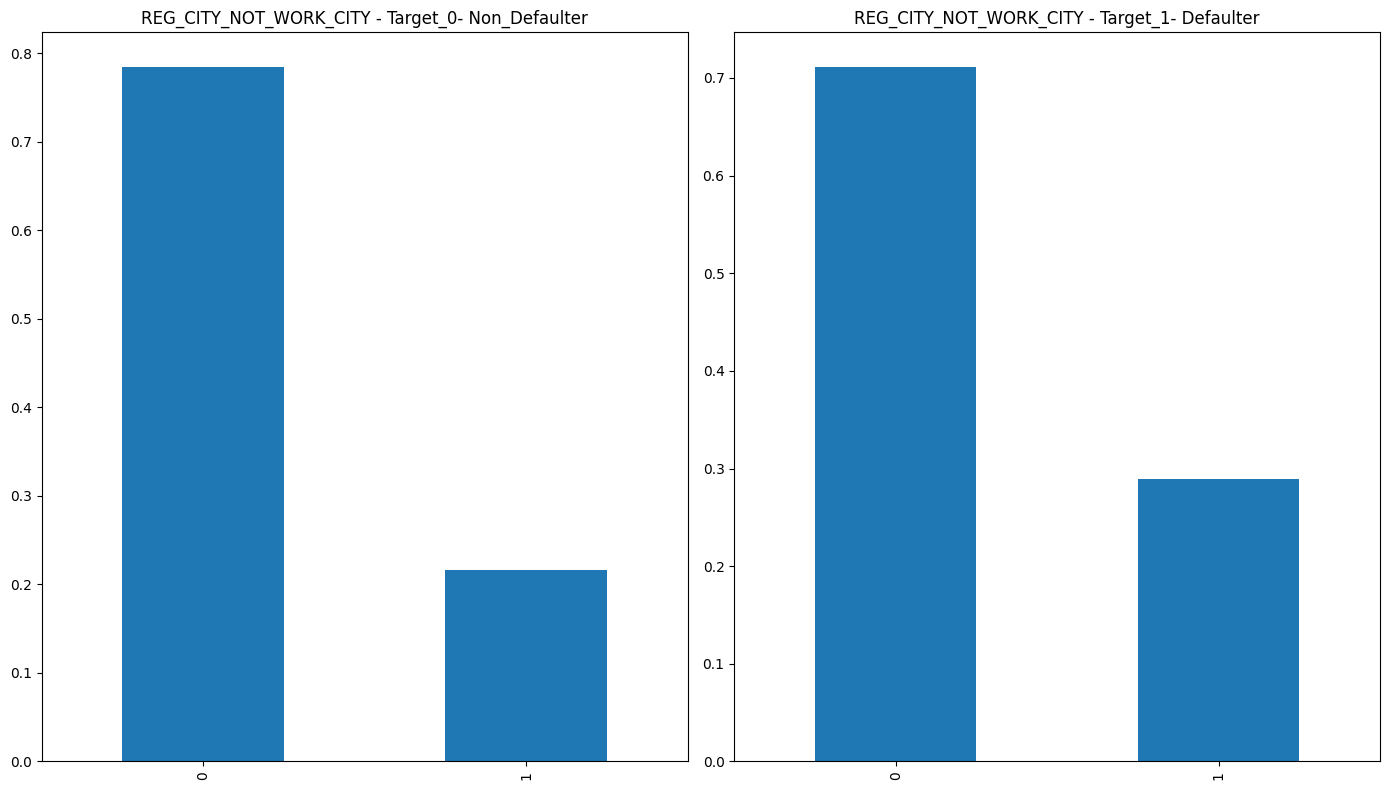

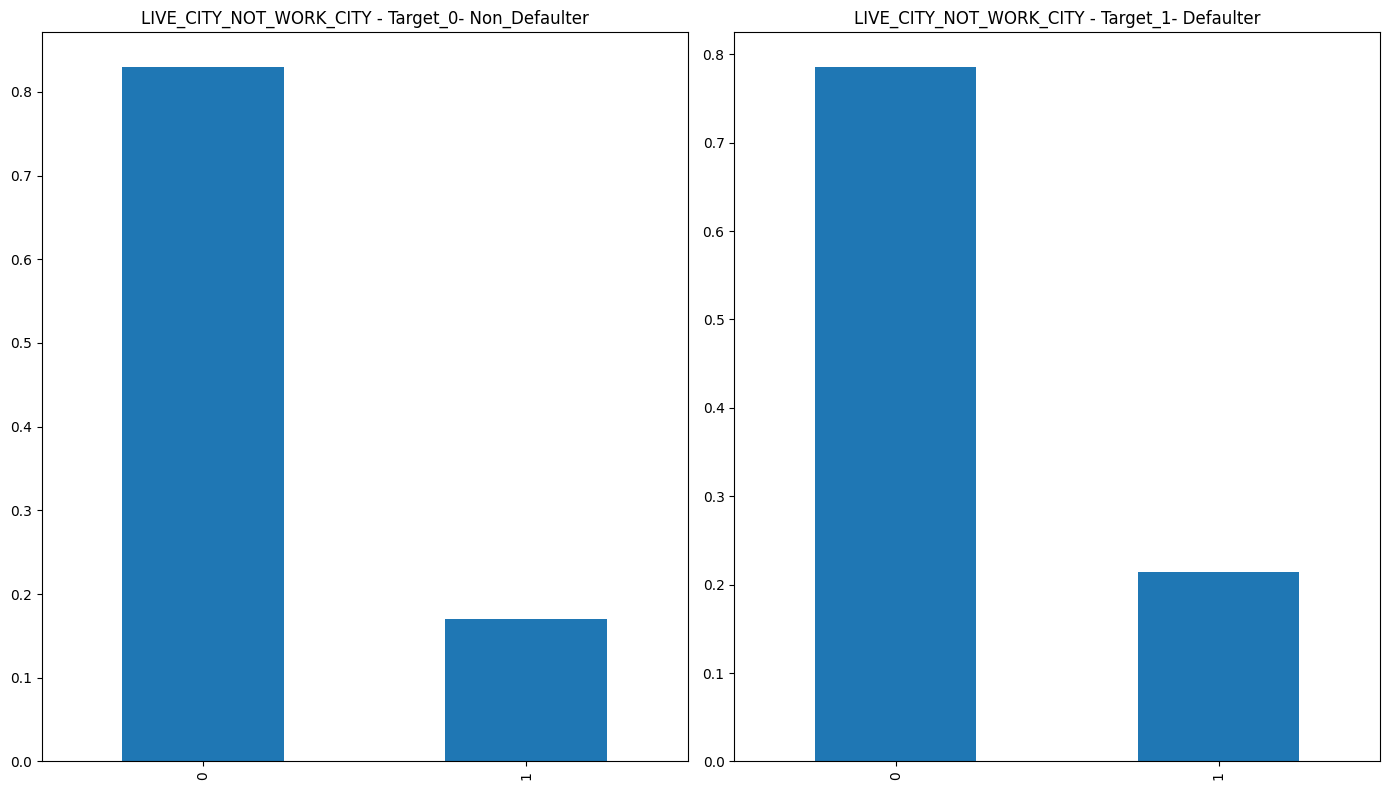

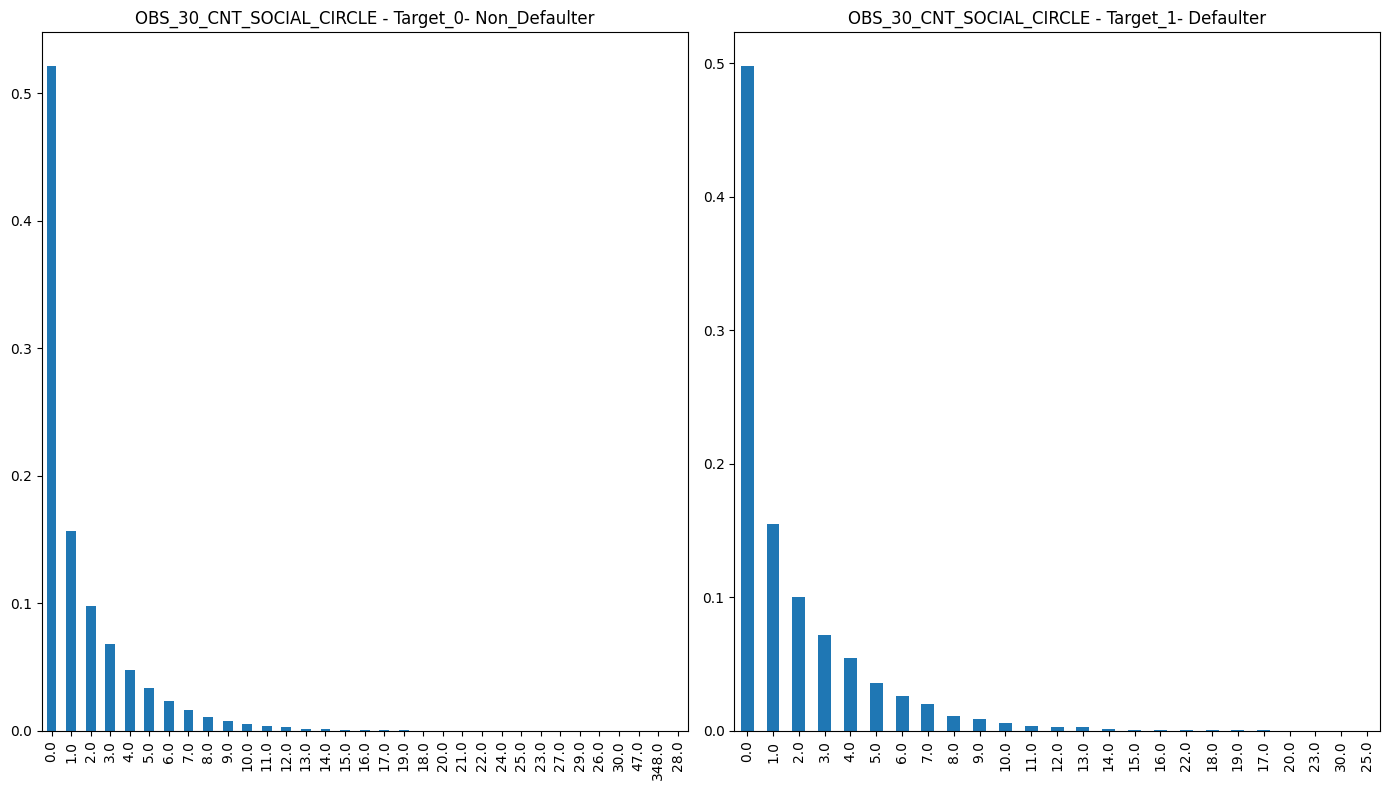

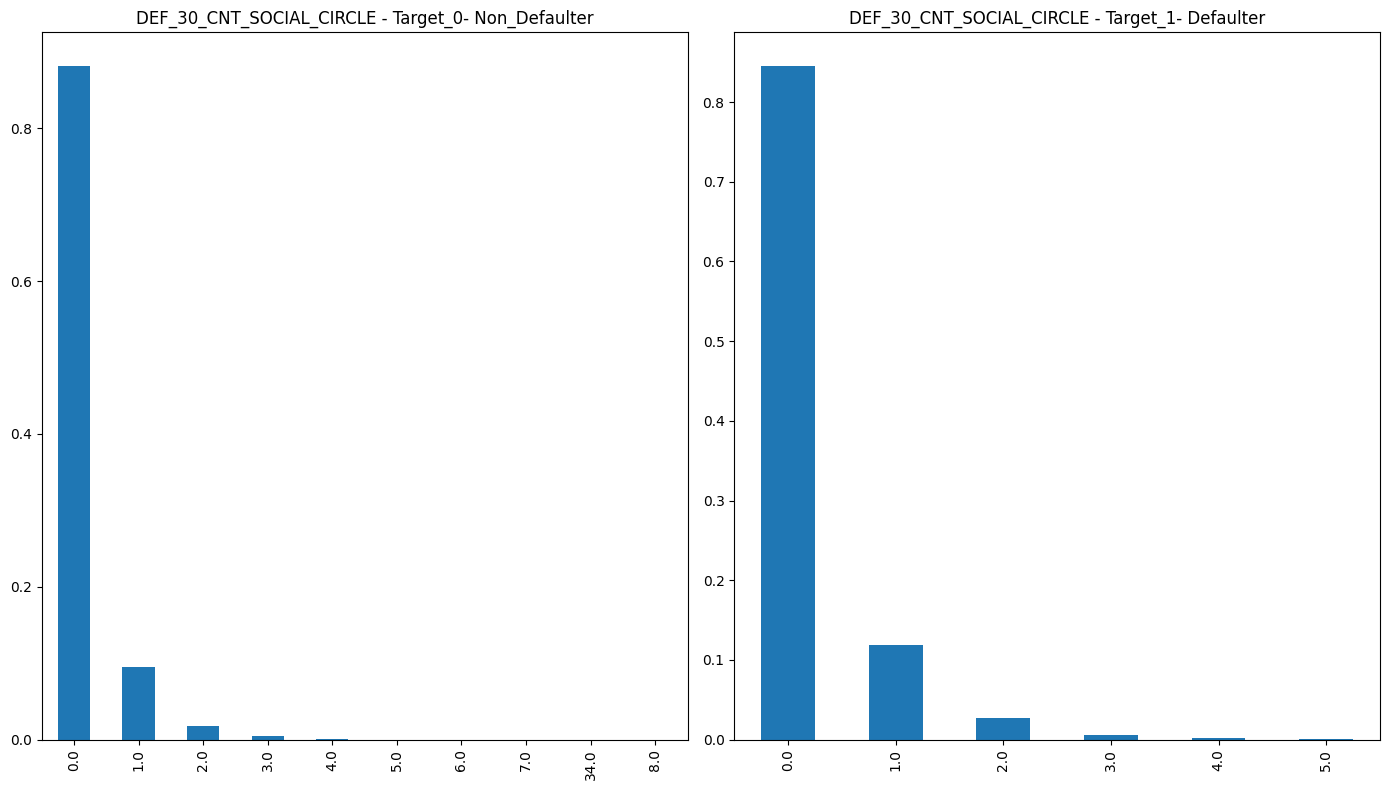

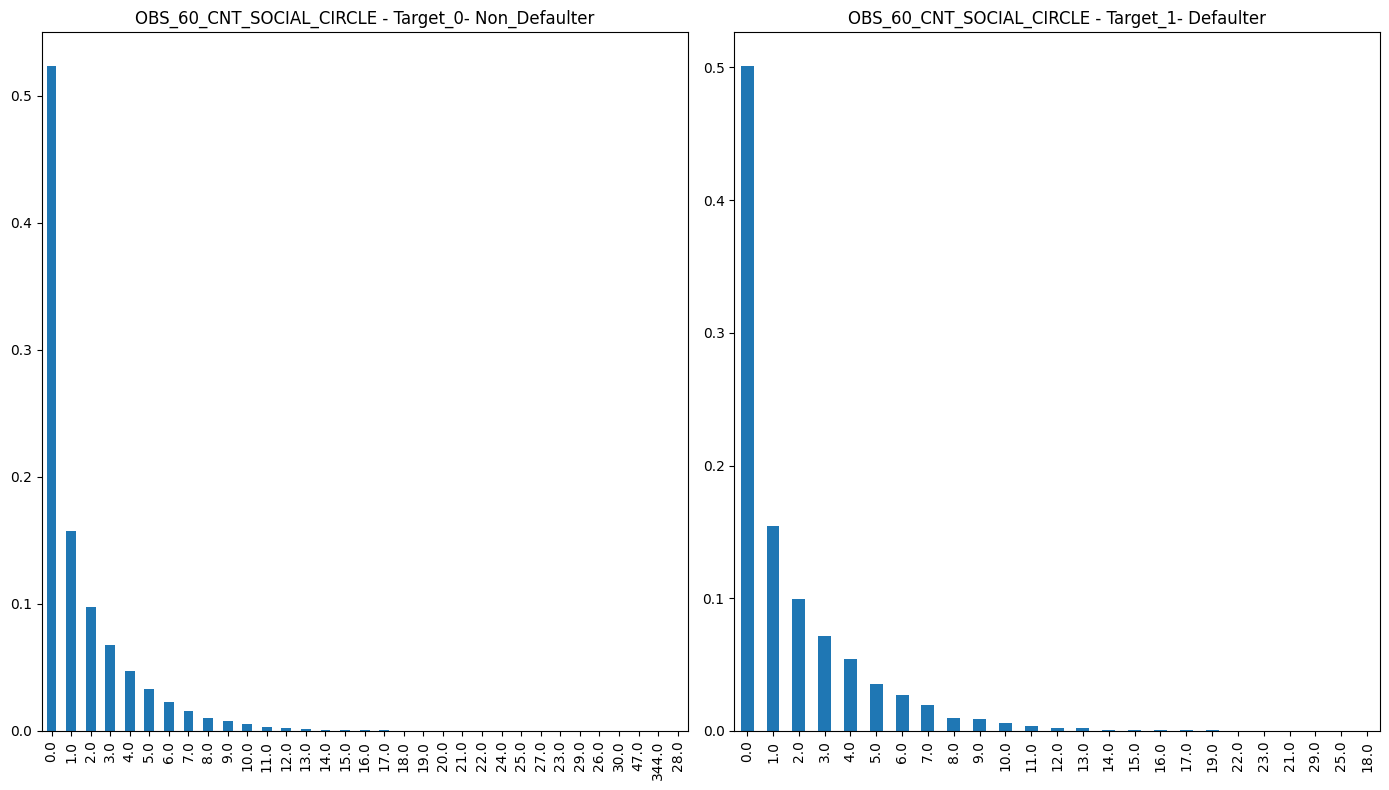

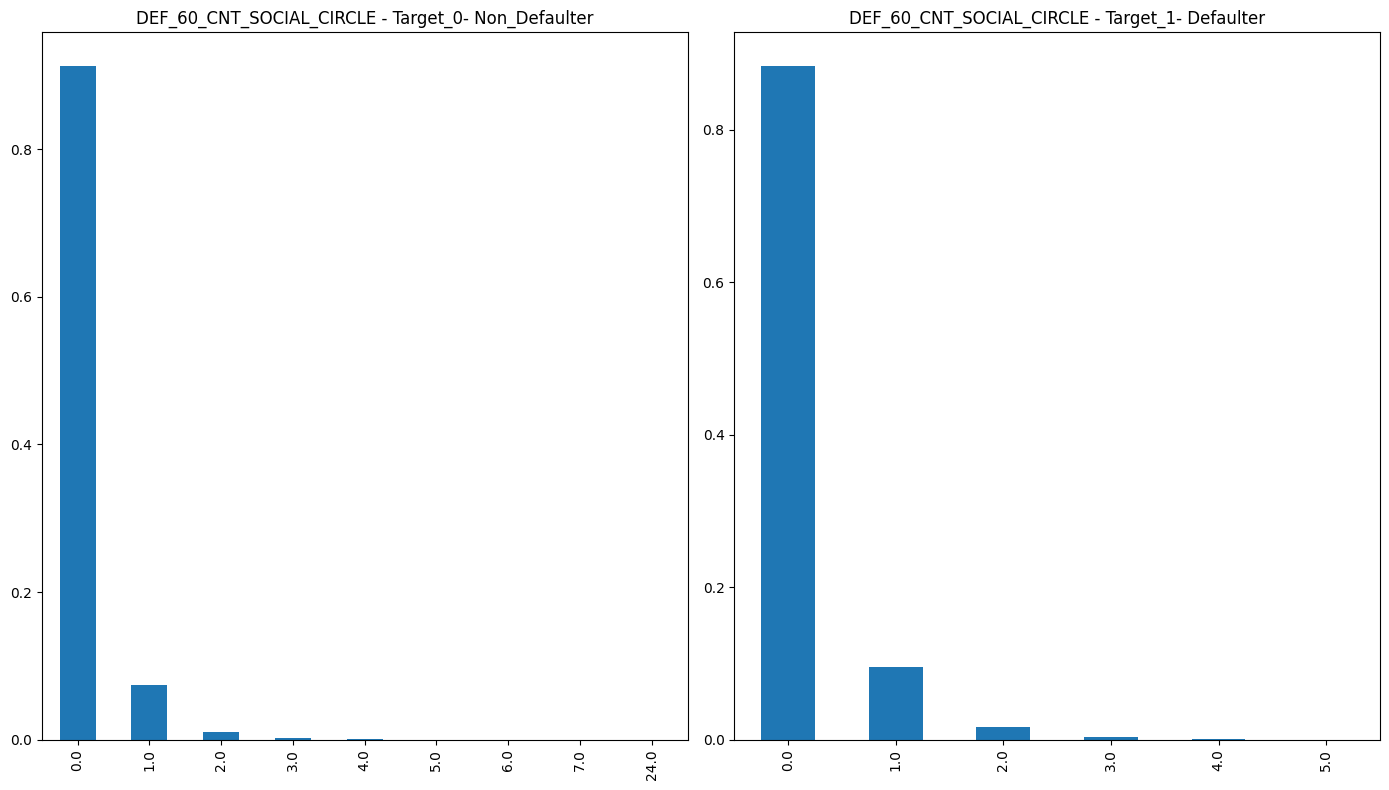

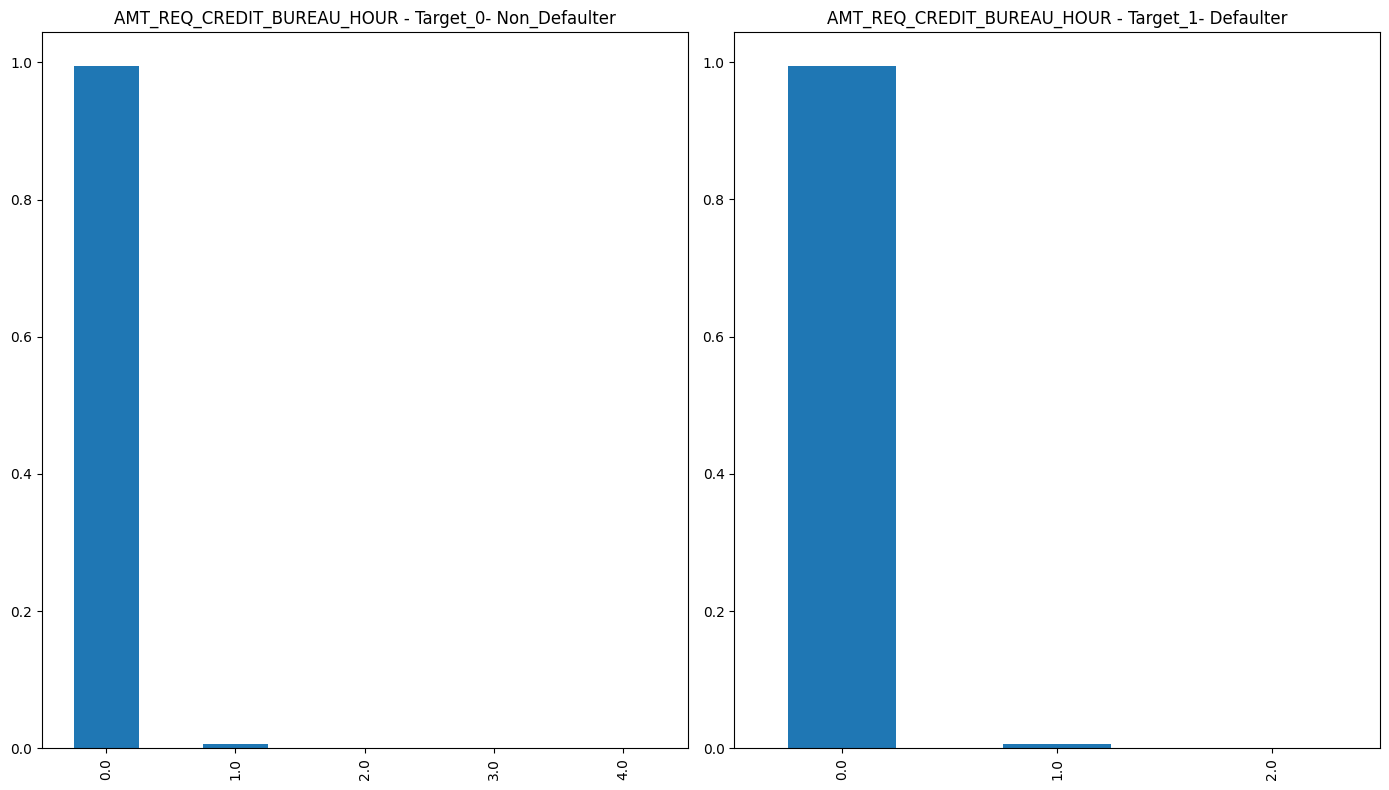

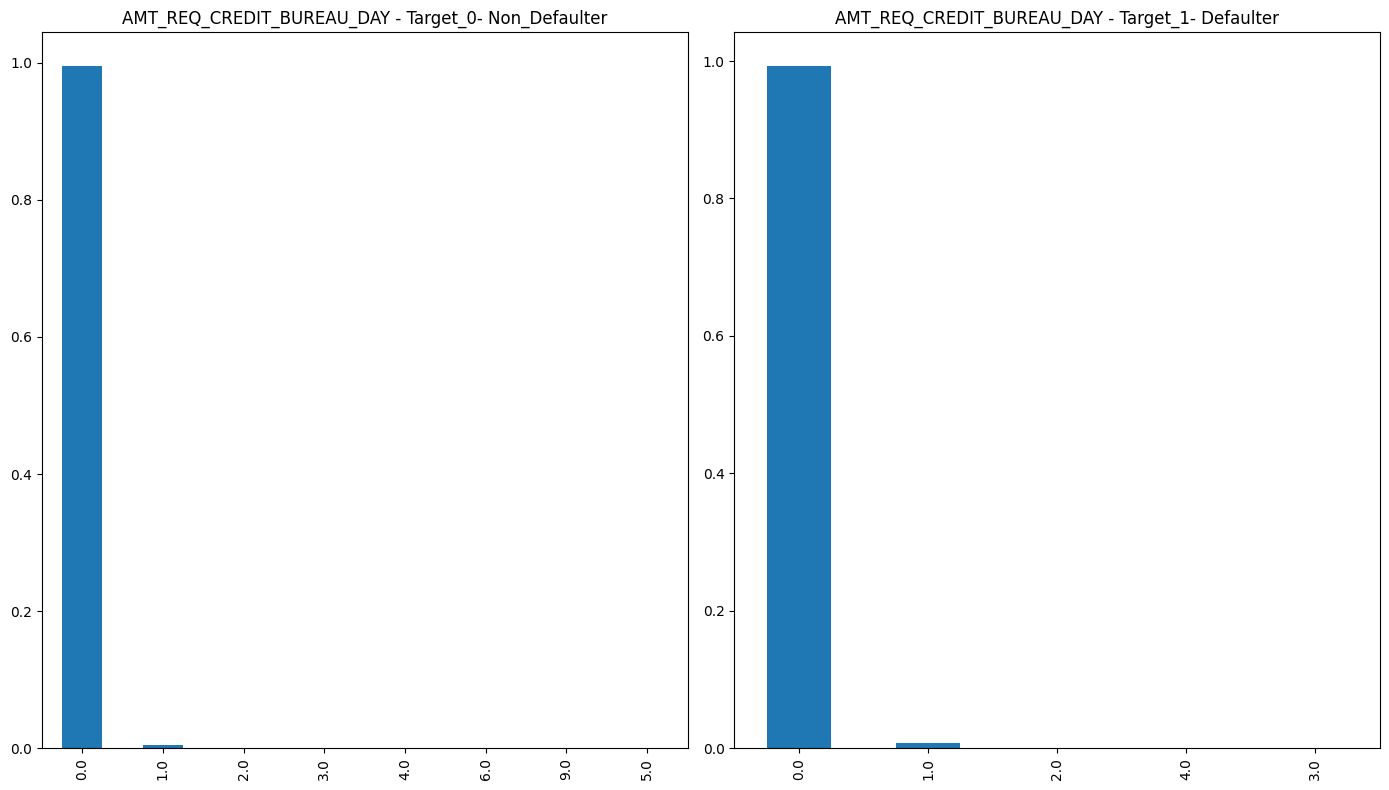

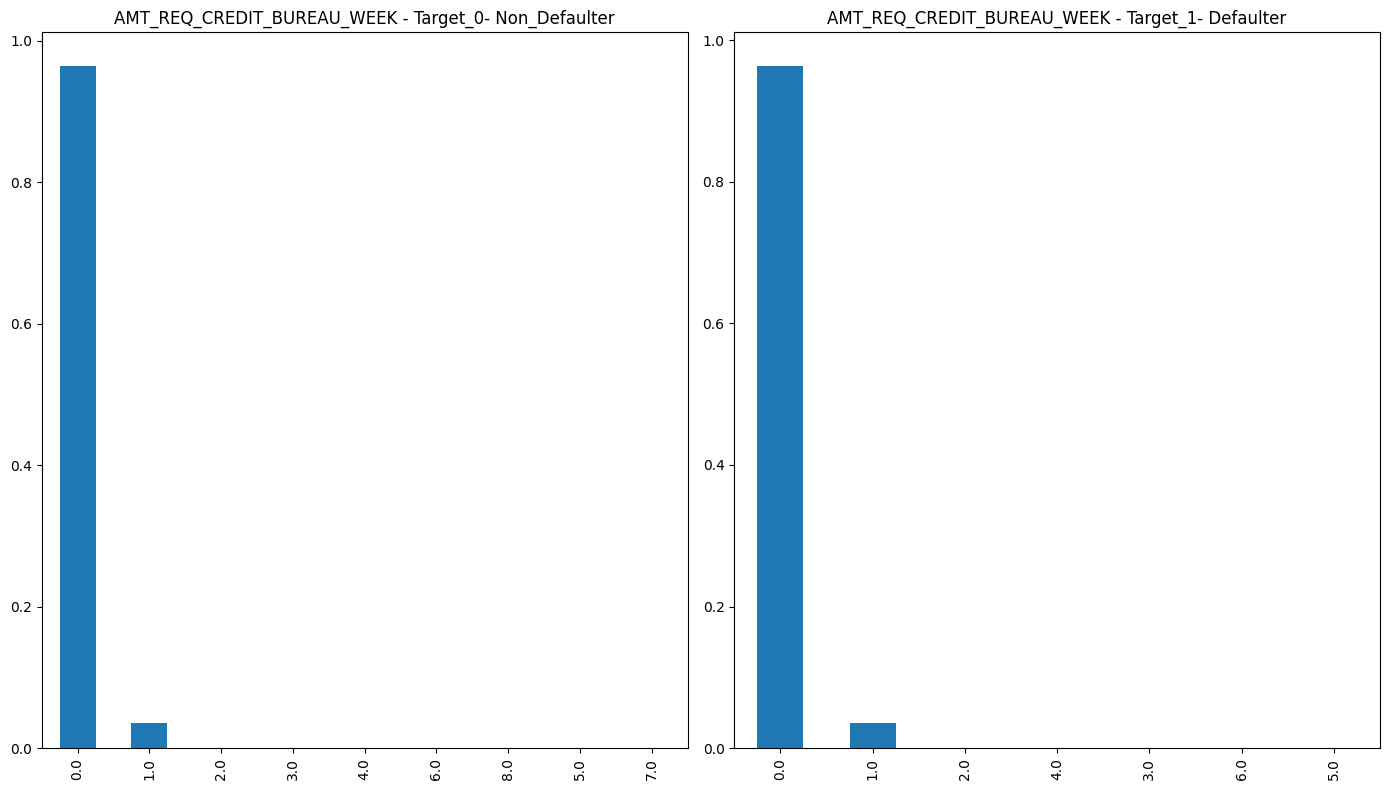

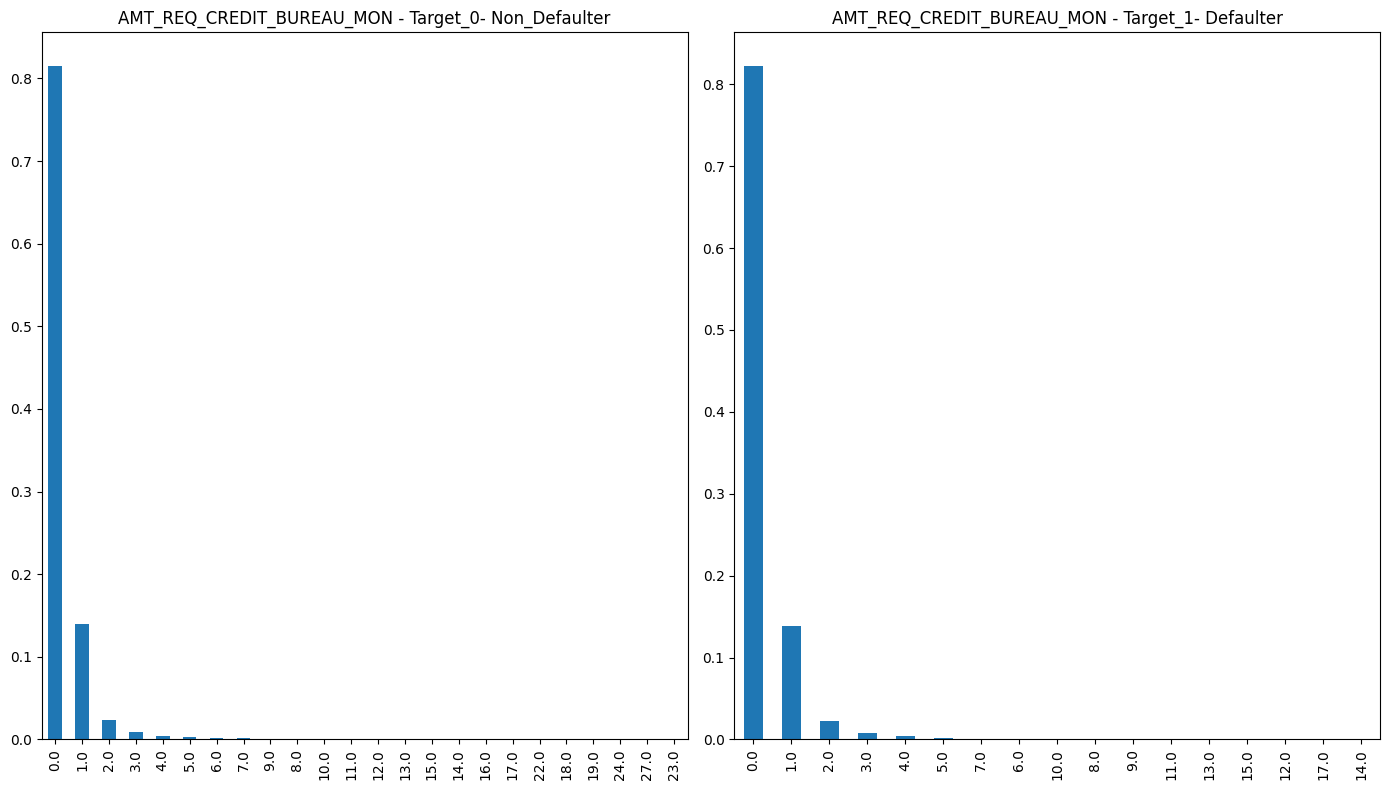

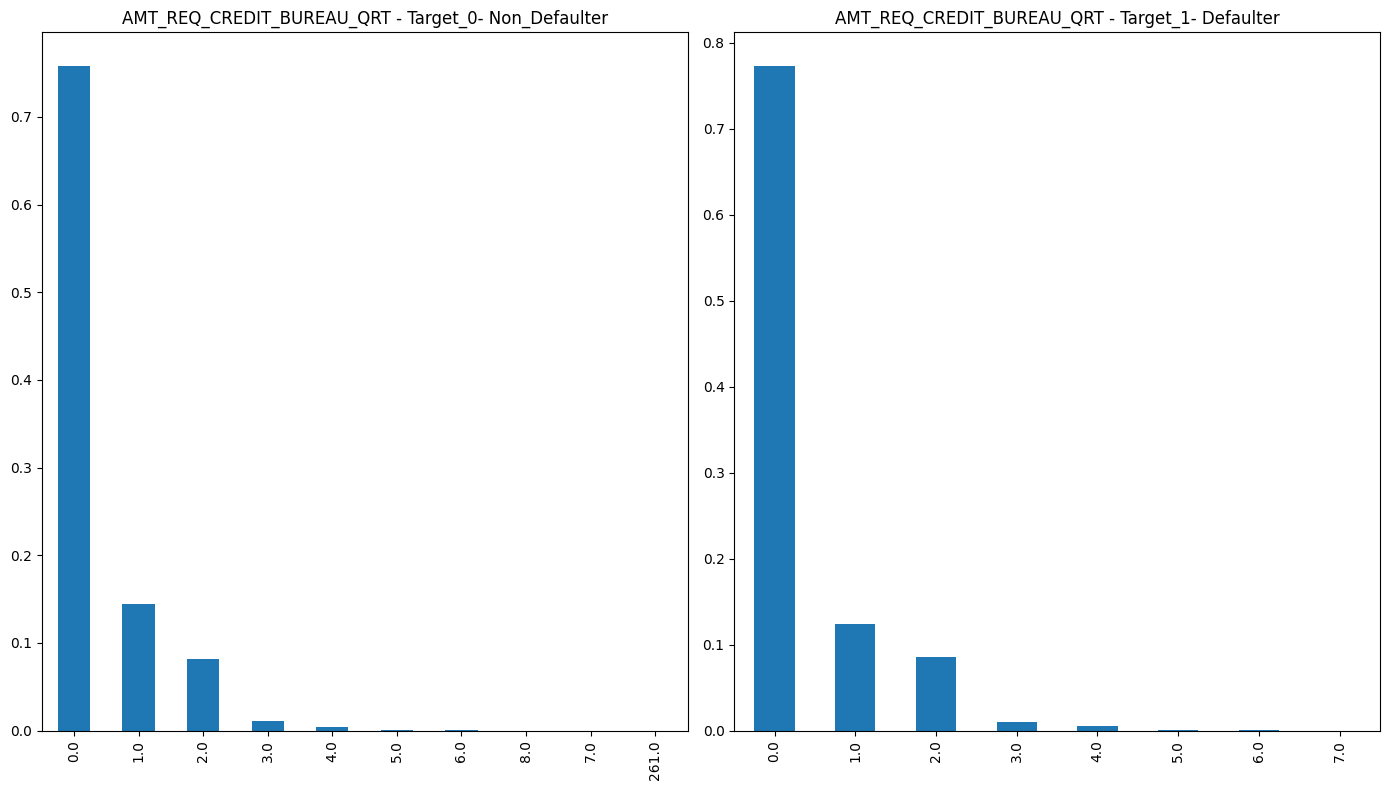

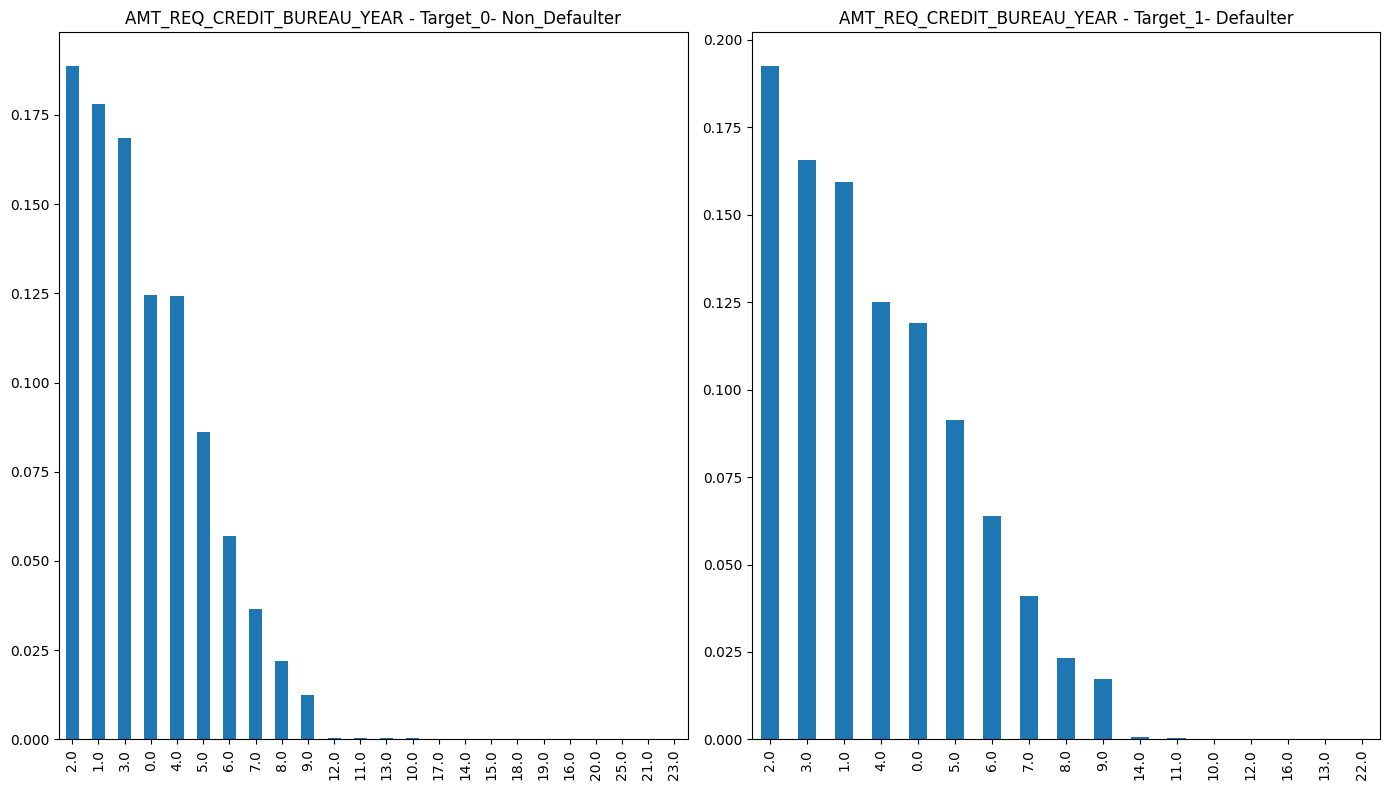

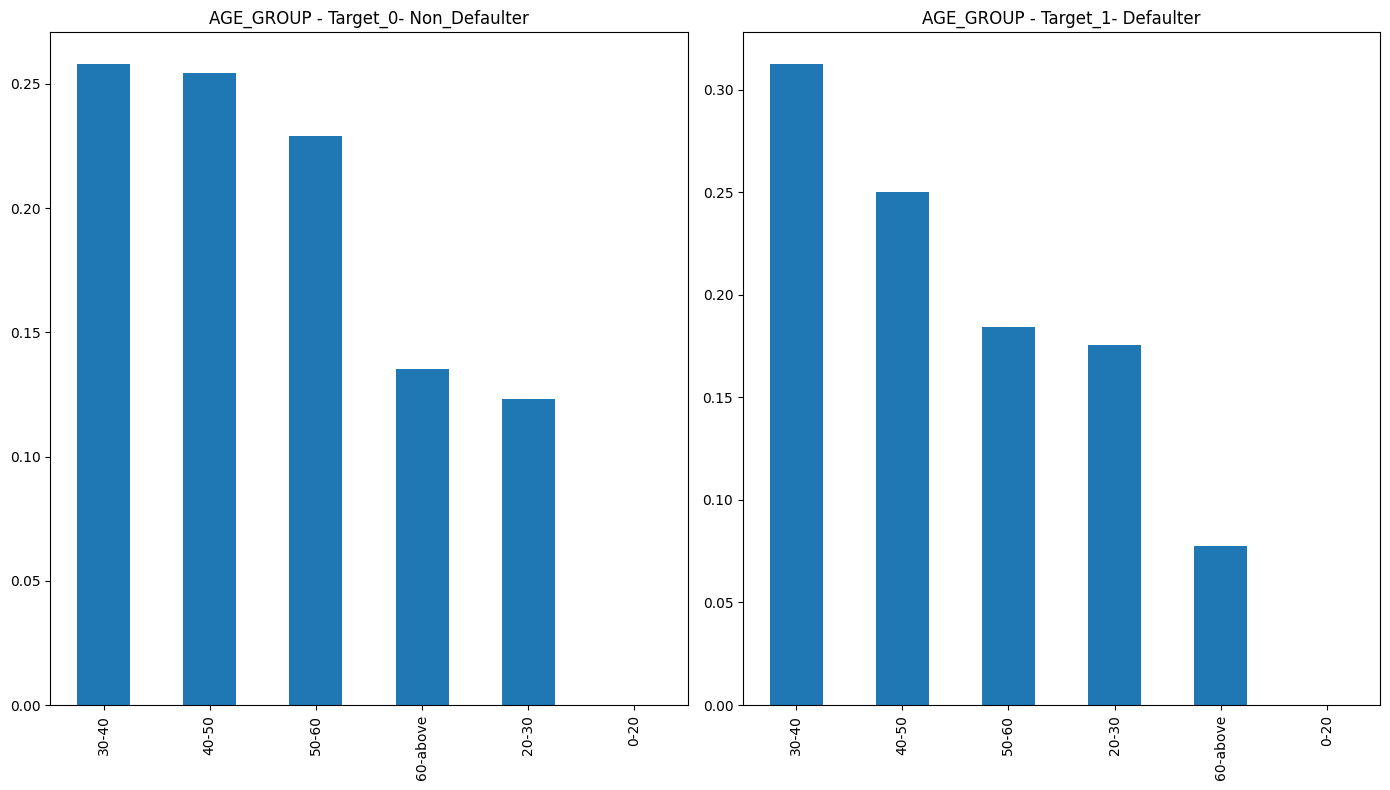

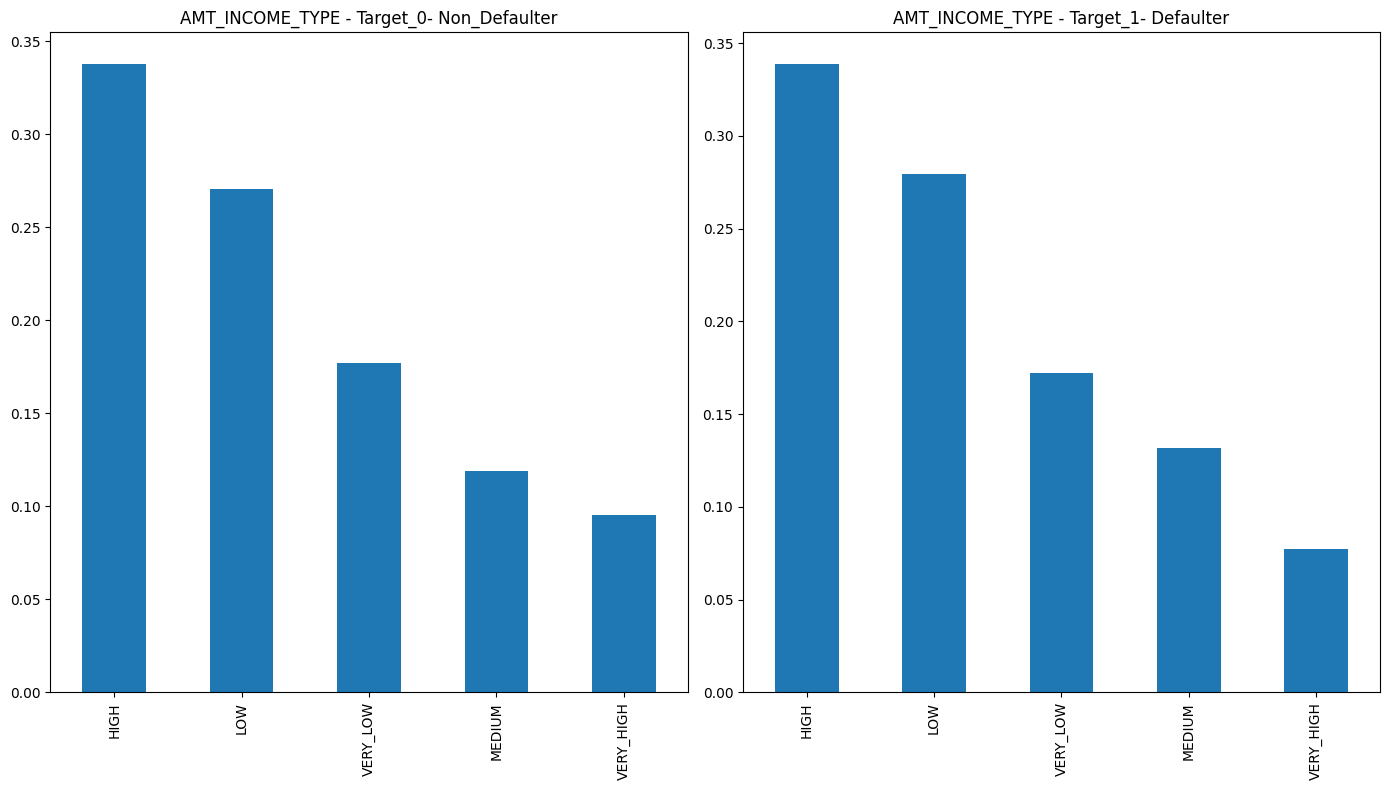

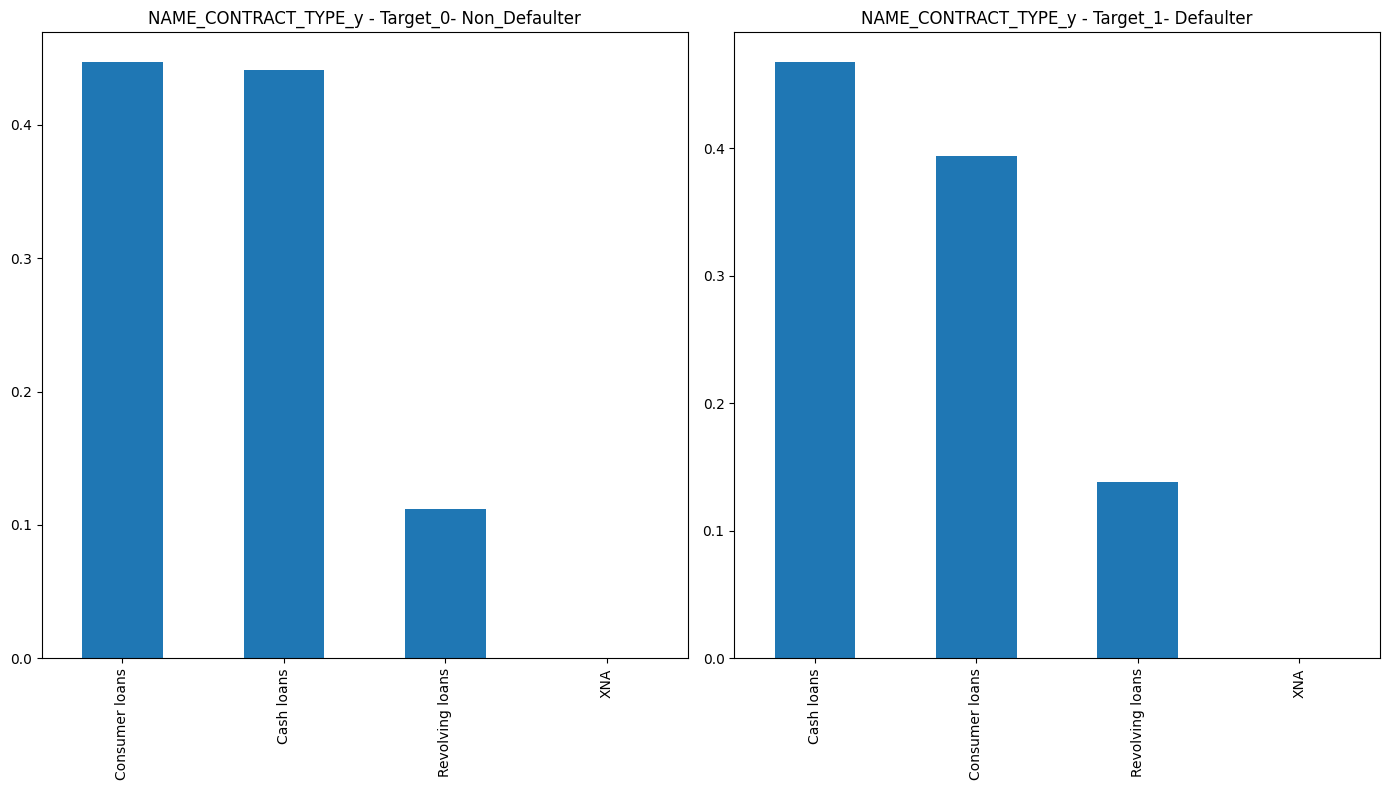

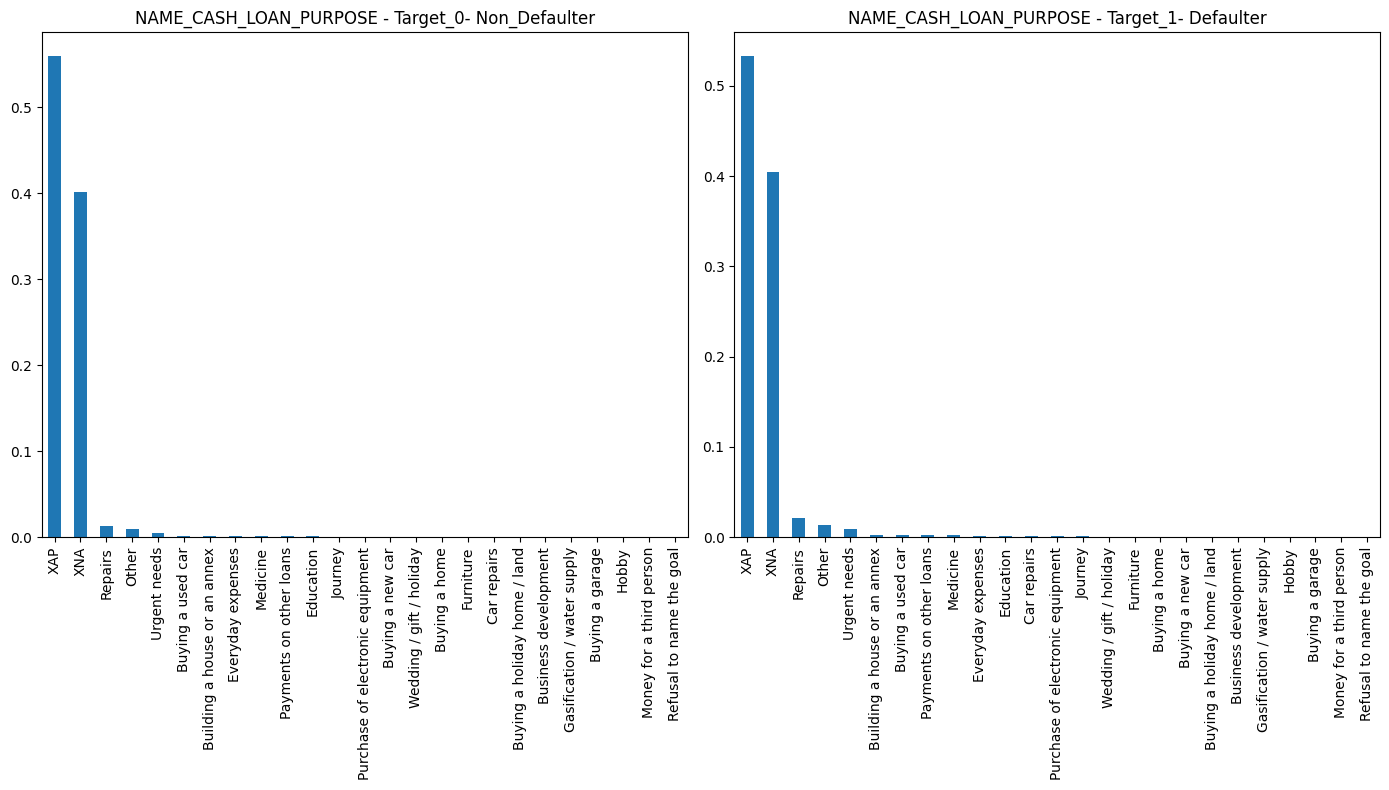

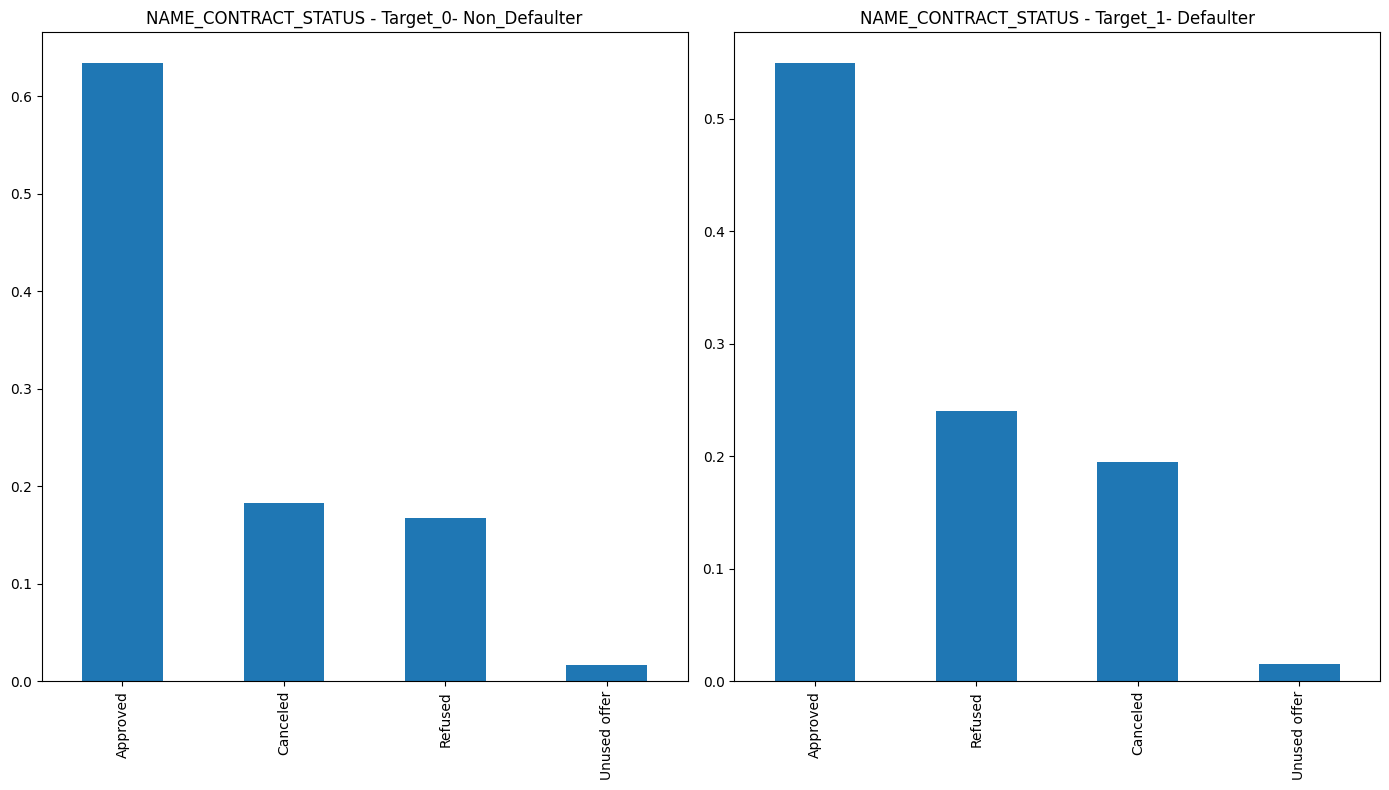

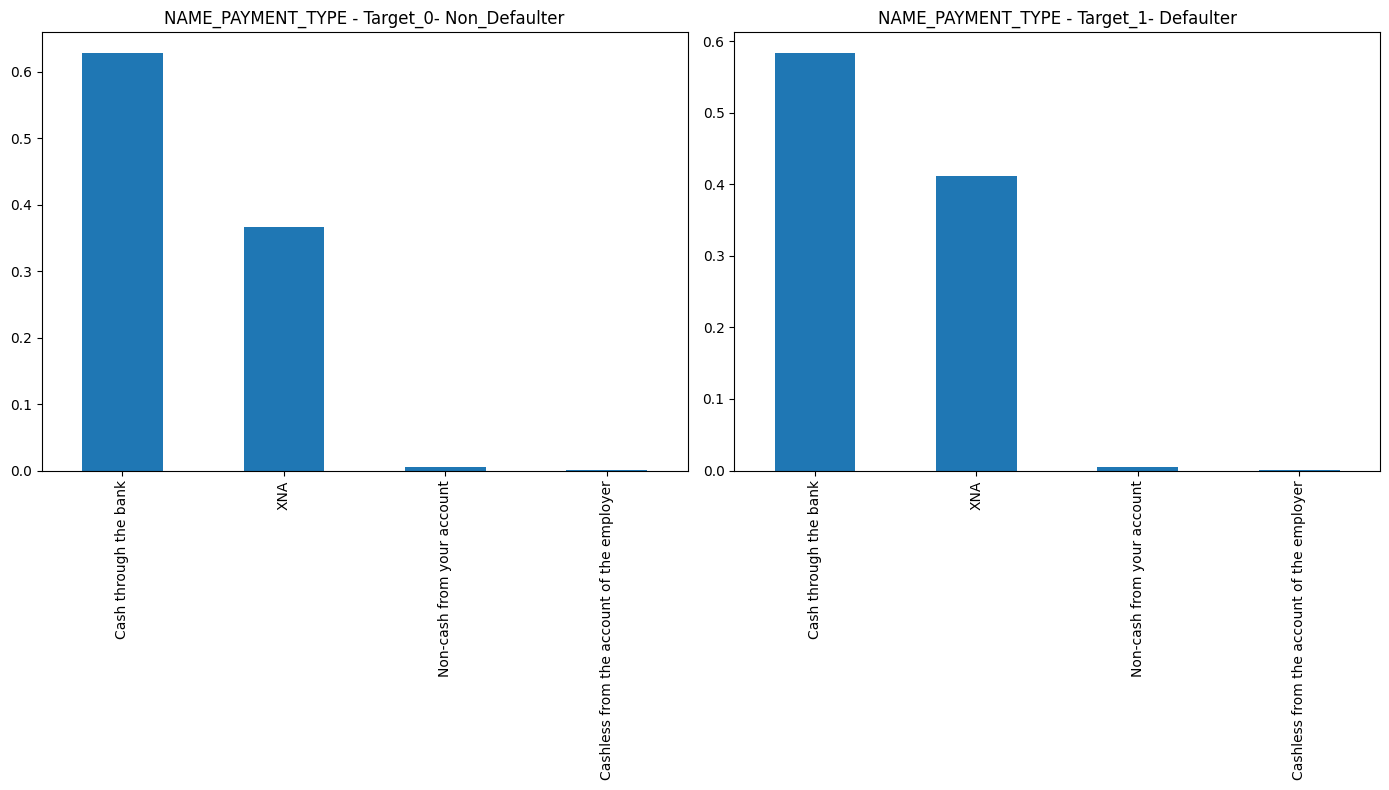

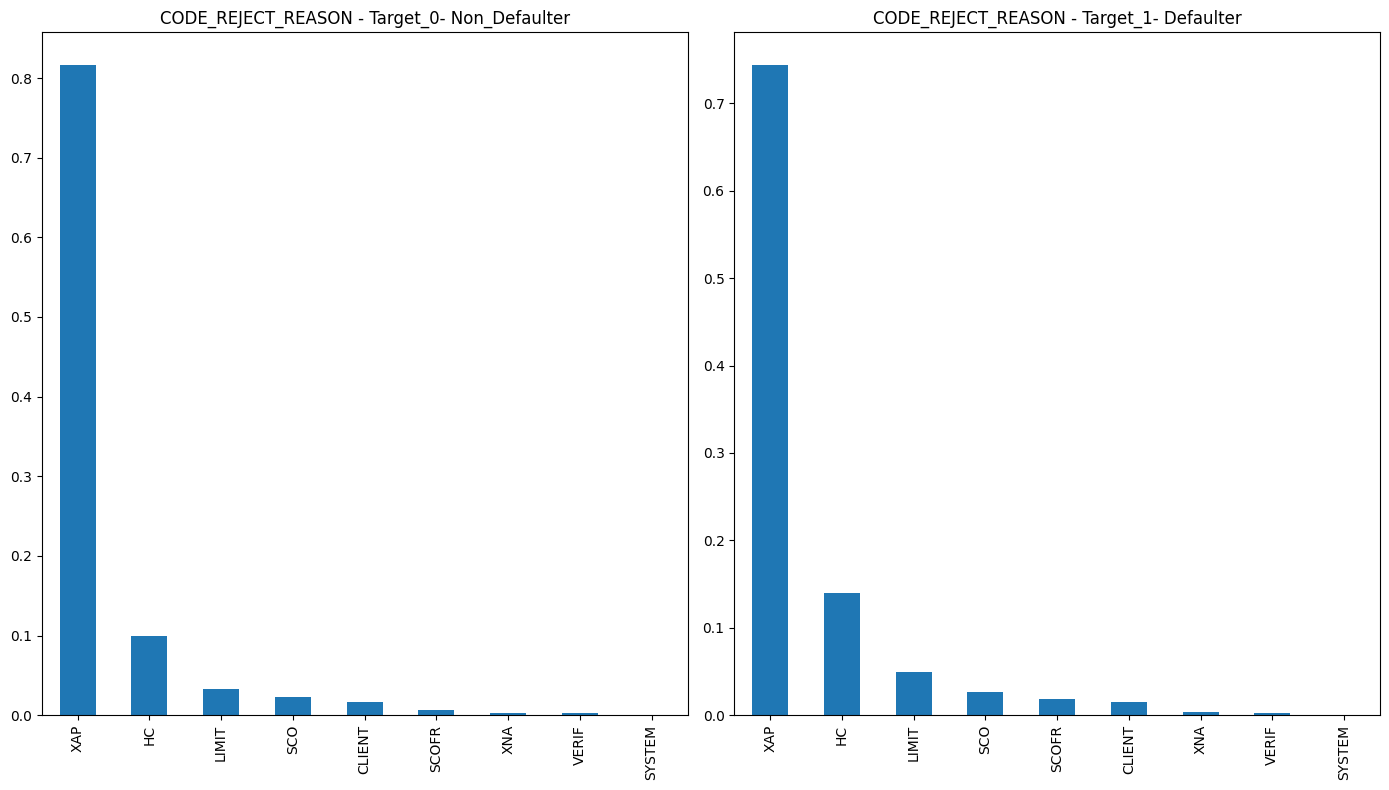

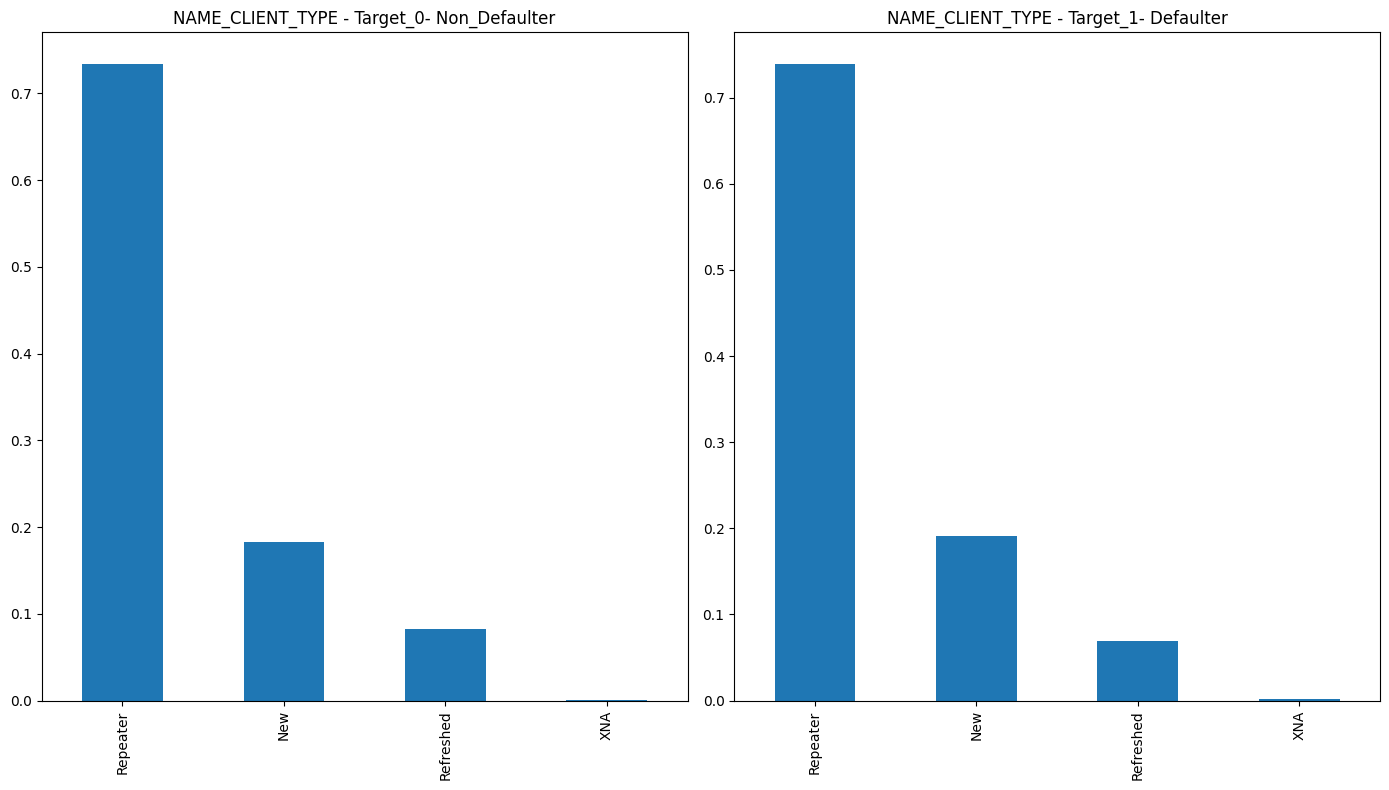

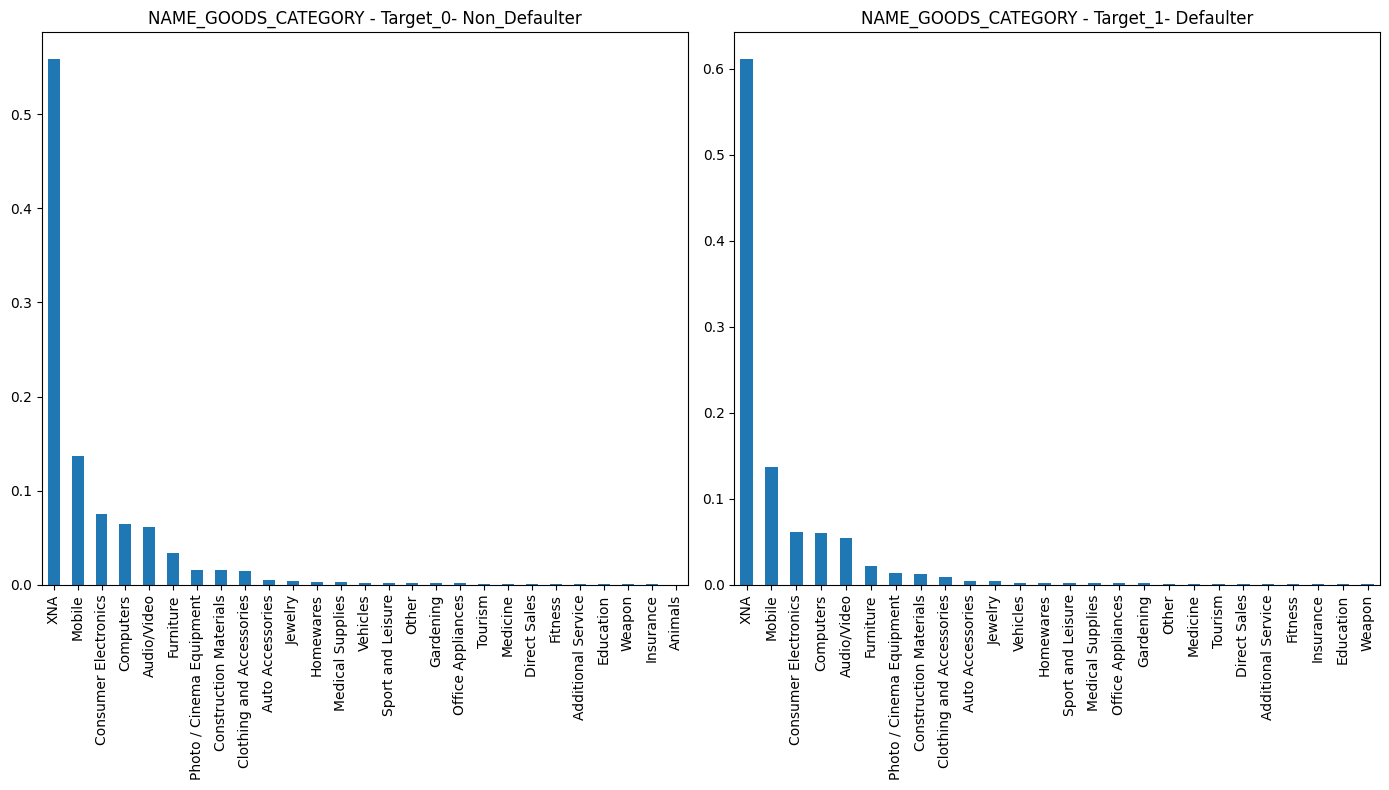

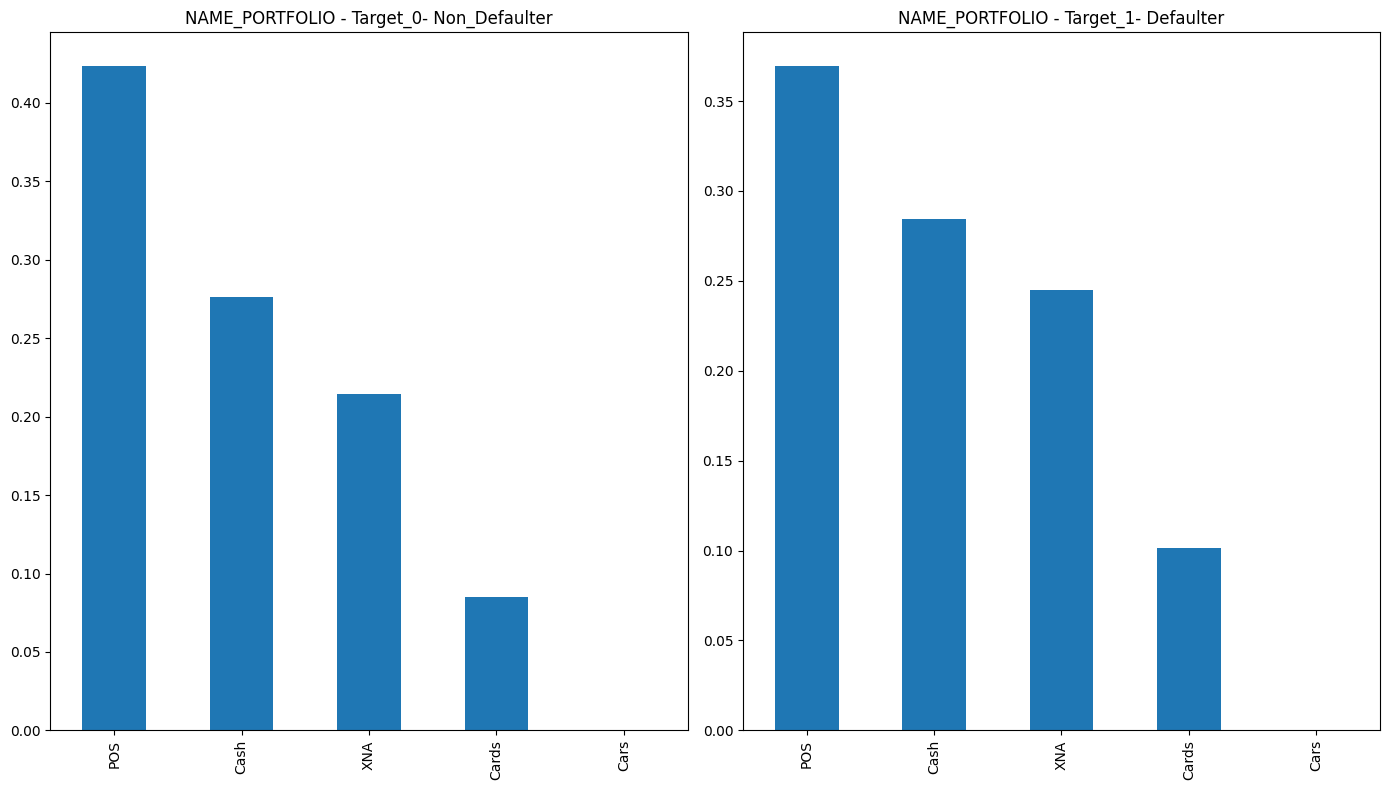

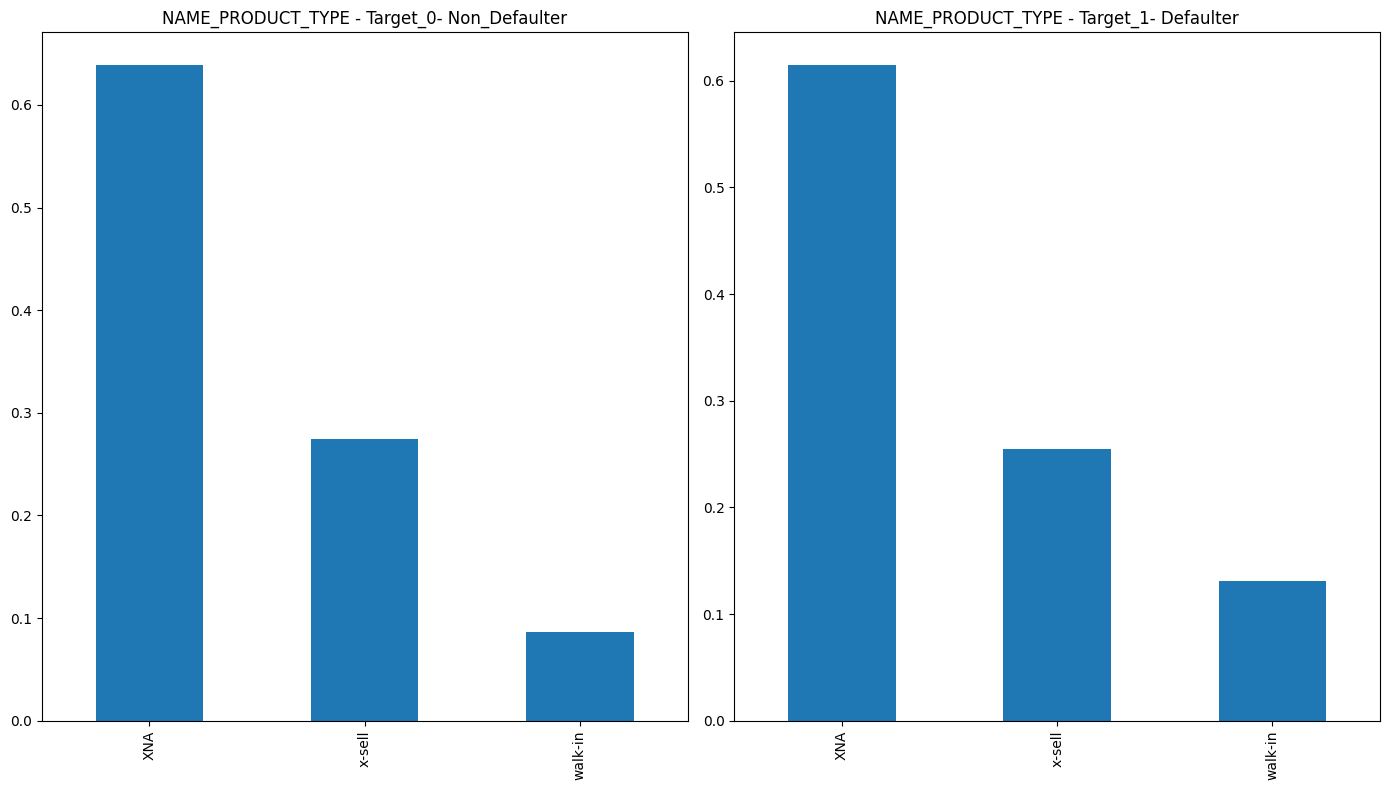

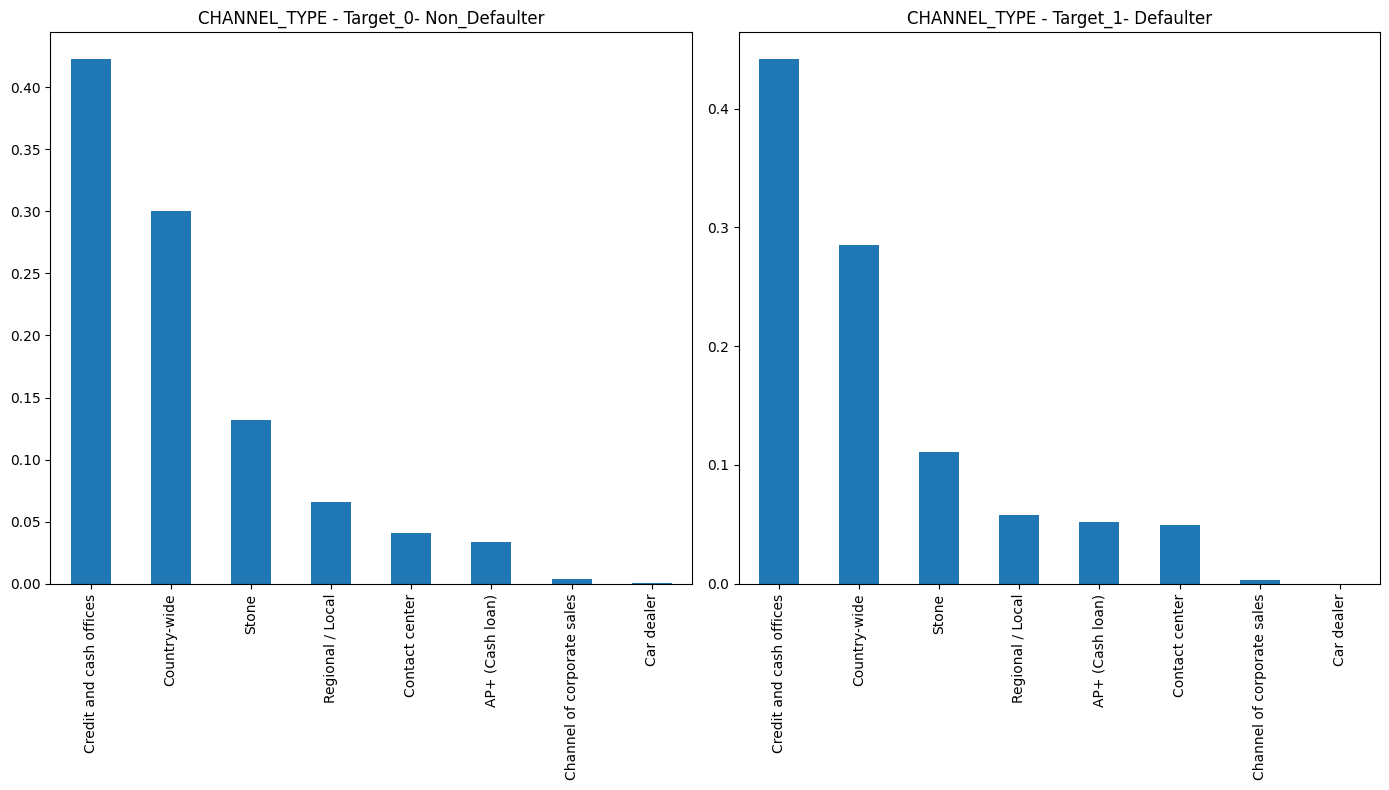

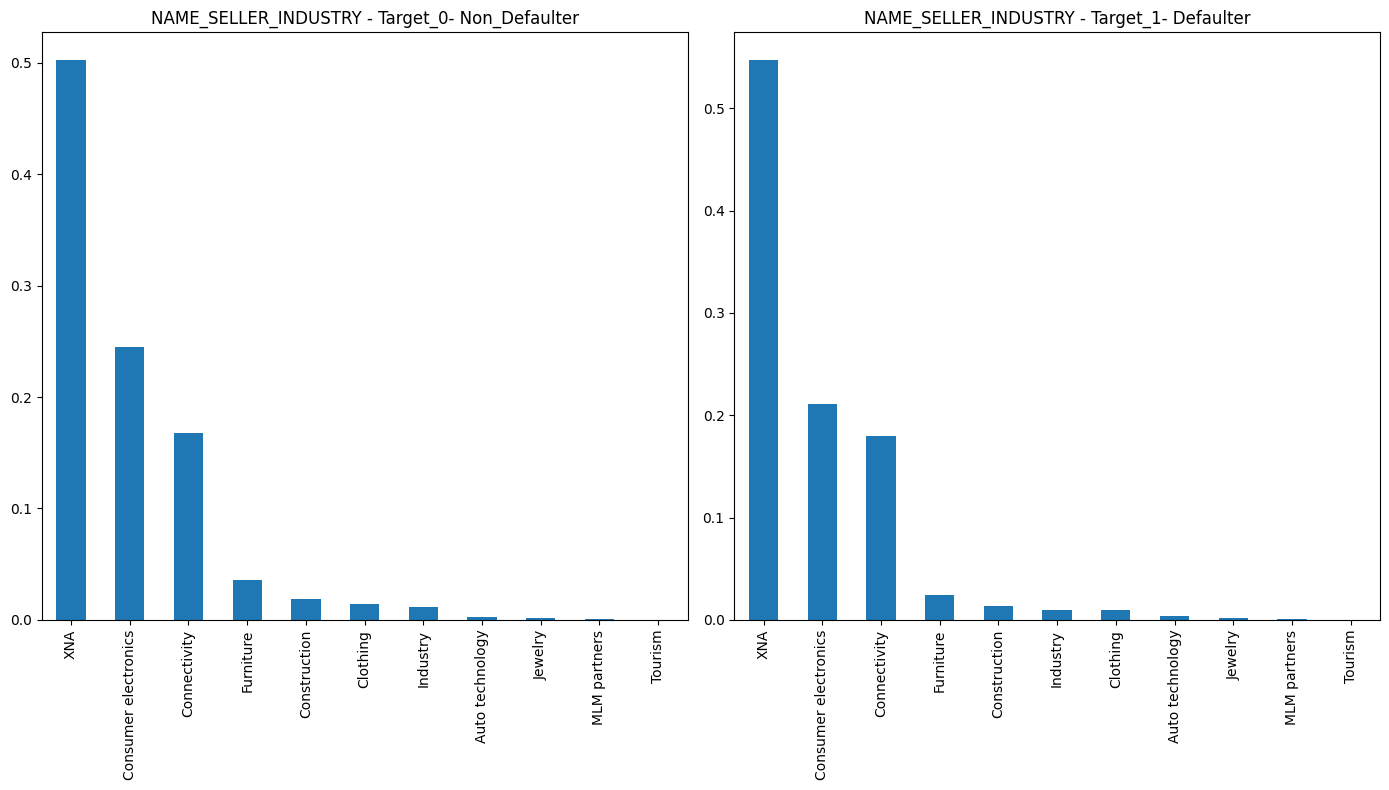

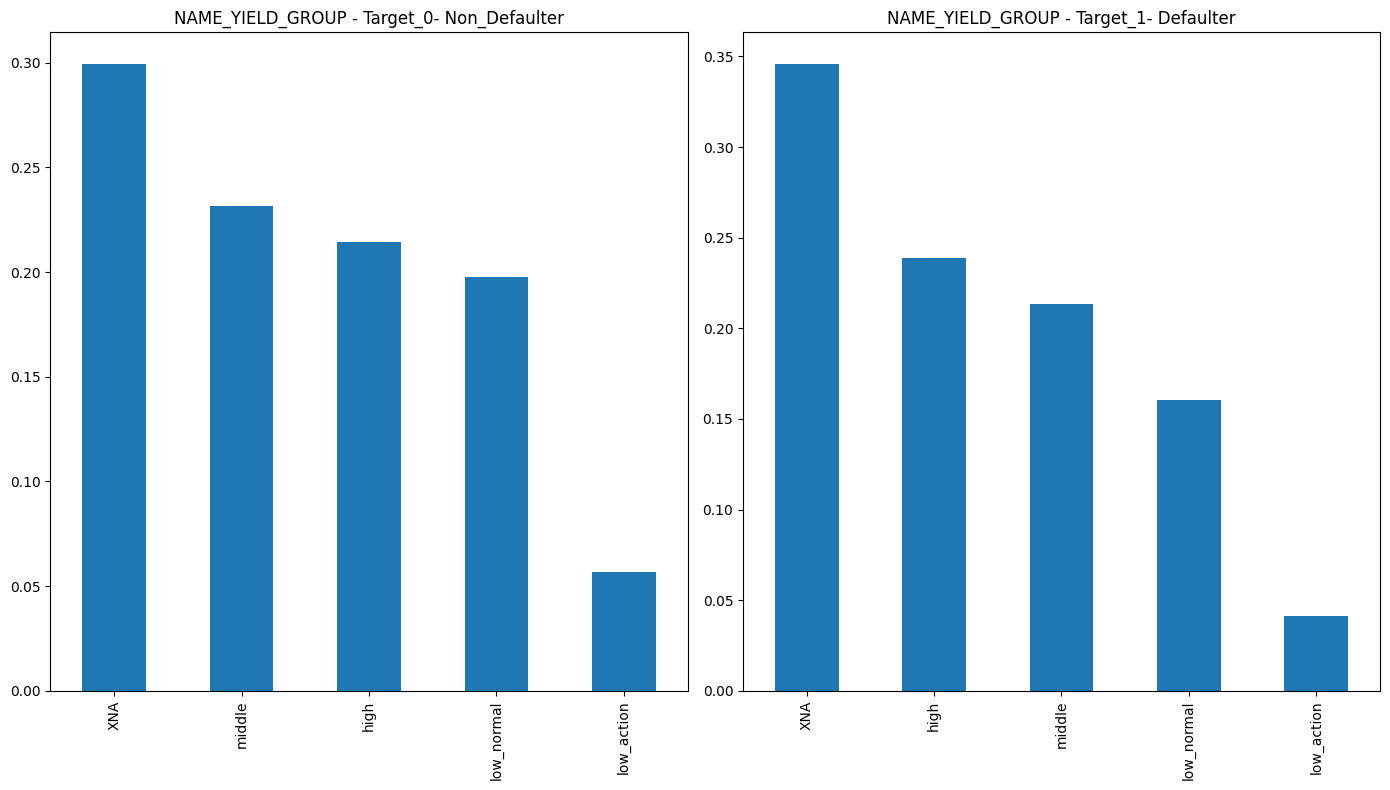

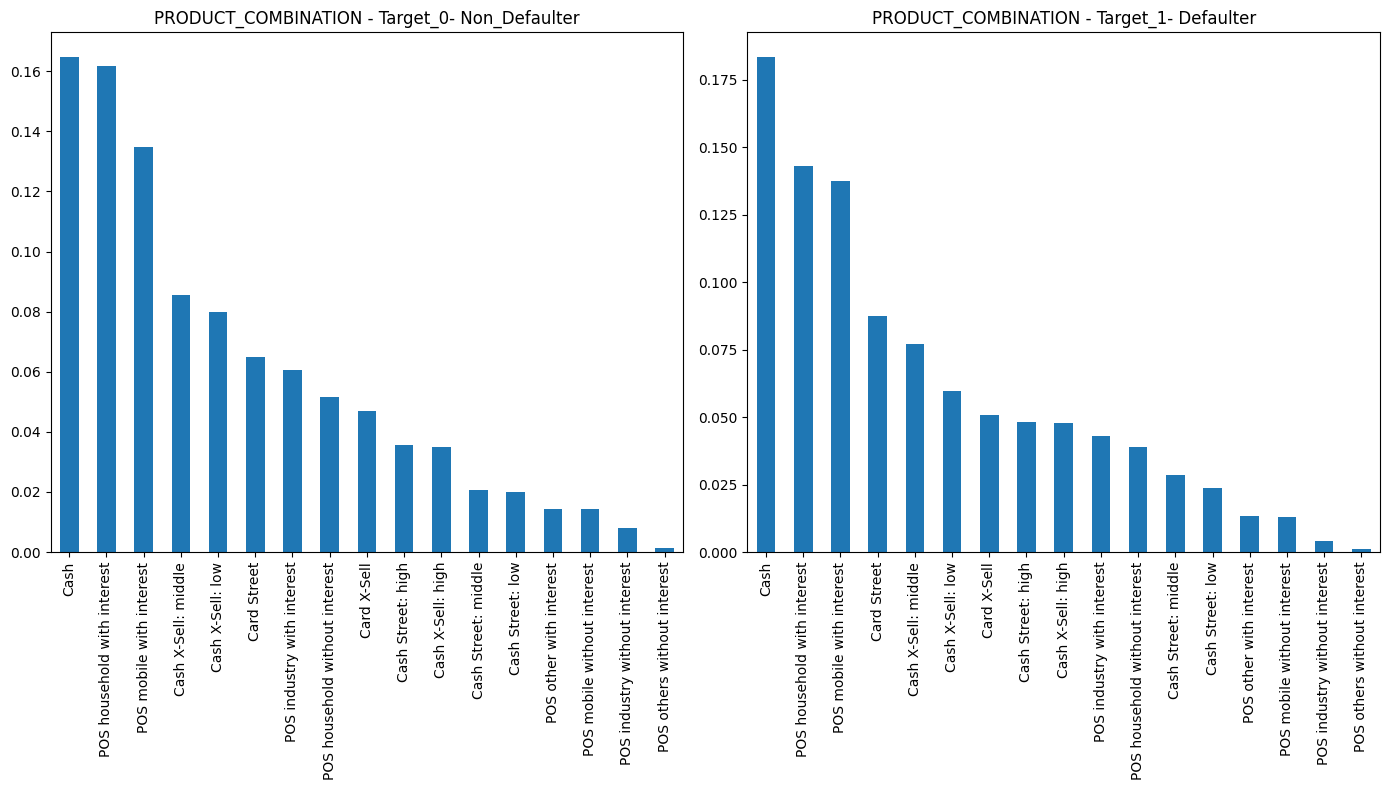

In [94]:
for cat in categorical_columns:
  plt.figure(figsize=(14,8))
  plt.subplot(1,2,1)
  Target_0[cat].value_counts(normalize=True).plot(kind='bar')
  plt.title(f'{cat} - Target_0- Non_Defaulter')
  plt.subplot(1, 2, 2)
  Target_1[cat].value_counts(normalize=True).plot(kind='bar')
  plt.title(f'{cat} - Target_1- Defaulter')
  plt.tight_layout()
  plt.show()

### Univariated analysis for categorical columns more specificly for columns showing some comparative difference

In [ ]:
def plot_categorical_dist(df, column1, column2=None):
    fig, axes = plt.subplots(1, 2, figsize=(14, 8))
    sns.countplot(data=merged_df, x=column1, palette='tab10', ax=axes[0])
    axes[0].set_title(f'Distribution of {column1}')
    axes[0].set_xlabel(column1)
    axes[0].set_ylabel('Count')
    axes[0].set_yscale("log")
    axes[0].tick_params(rotation=45)
    # Second countplot (if a second column is provided)
    if column2:
        sns.countplot(data=merged_df, x=column2, hue="TARGET", palette='tab10', ax=axes[1])
        axes[1].set_title(f'Distribution of {column2}')
        axes[1].set_xlabel(column2)
        axes[1].set_ylabel('Count')
        axes[1].set_yscale("log")
        axes[1].tick_params(rotation=50)
    plt.tight_layout()
    plt.show()


Univariate analysis for NAME_EDUCATION_TYPE  for merged columns

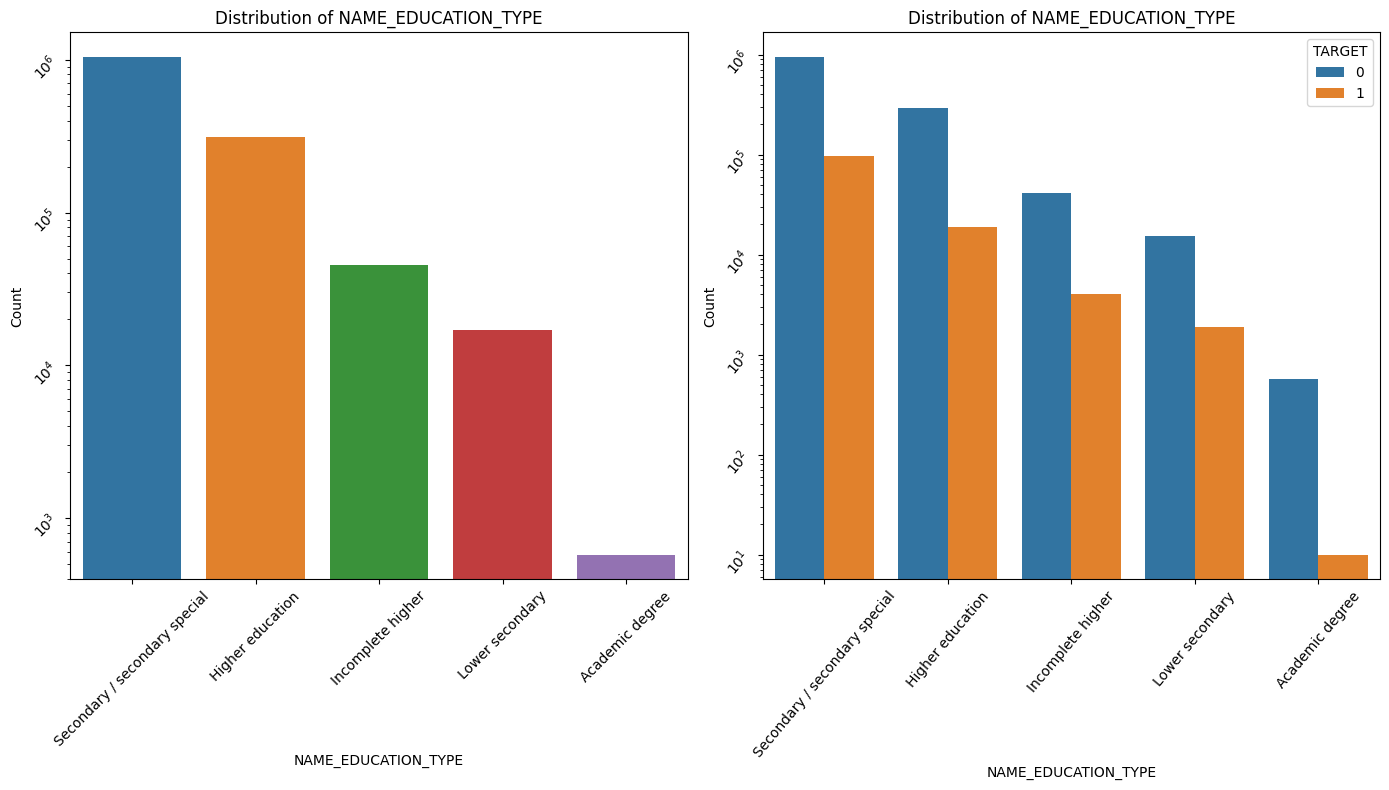

In [ ]:
plot_categorical_dist(merged_df, 'NAME_EDUCATION_TYPE', 'NAME_EDUCATION_TYPE')

It clearly shows that default rate depends on education status of client. More educated one is less defaultor and vice-versa.

Univariate analysis for Column - AGE_GROUP


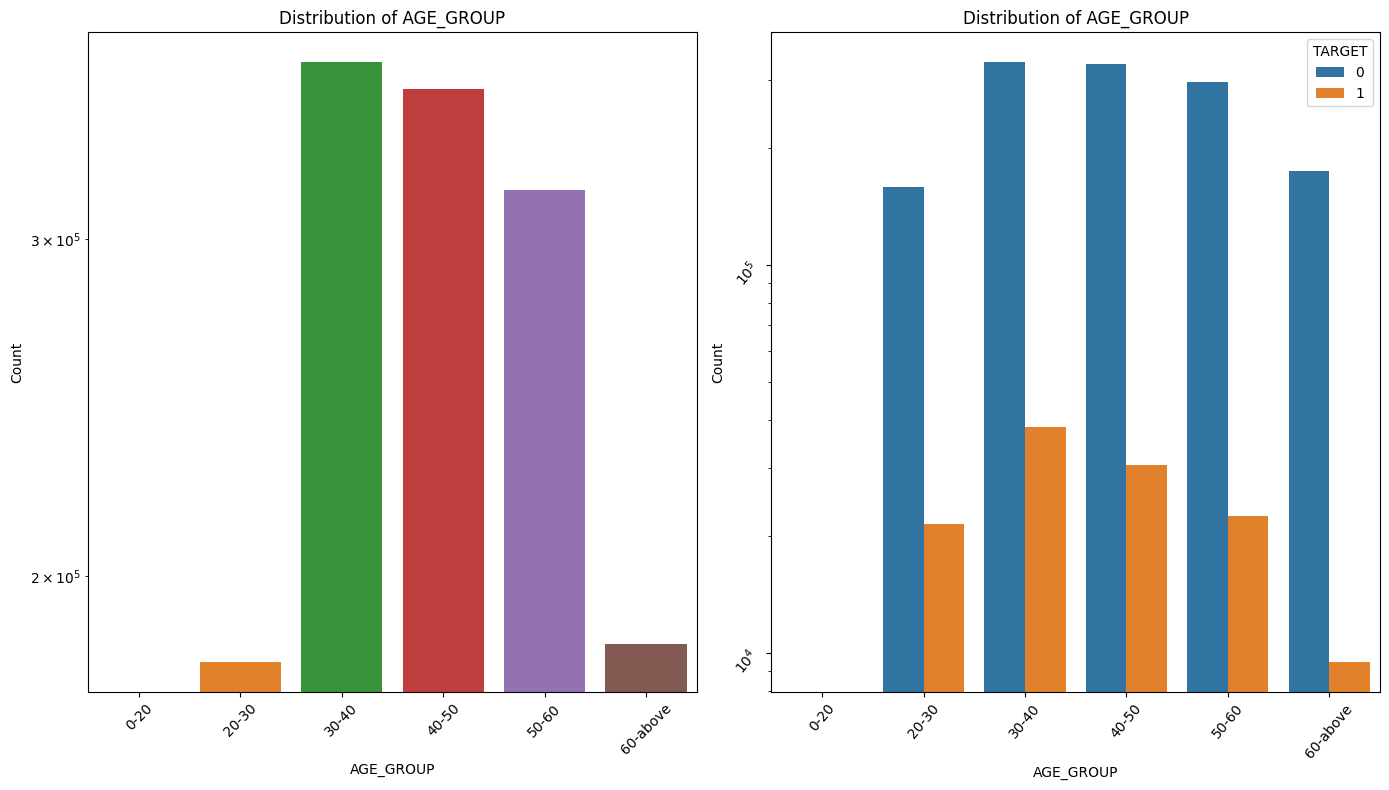

In [ ]:
plot_categorical_dist(merged_df, 'AGE_GROUP', 'AGE_GROUP')

Insights
- Maximum defaulters are of Age group - 30-40 which face problem in paying installments.
- Minimum defaulters are of Age group - 60- above

Univariate analysis for column - OCCUPATION_TYPE



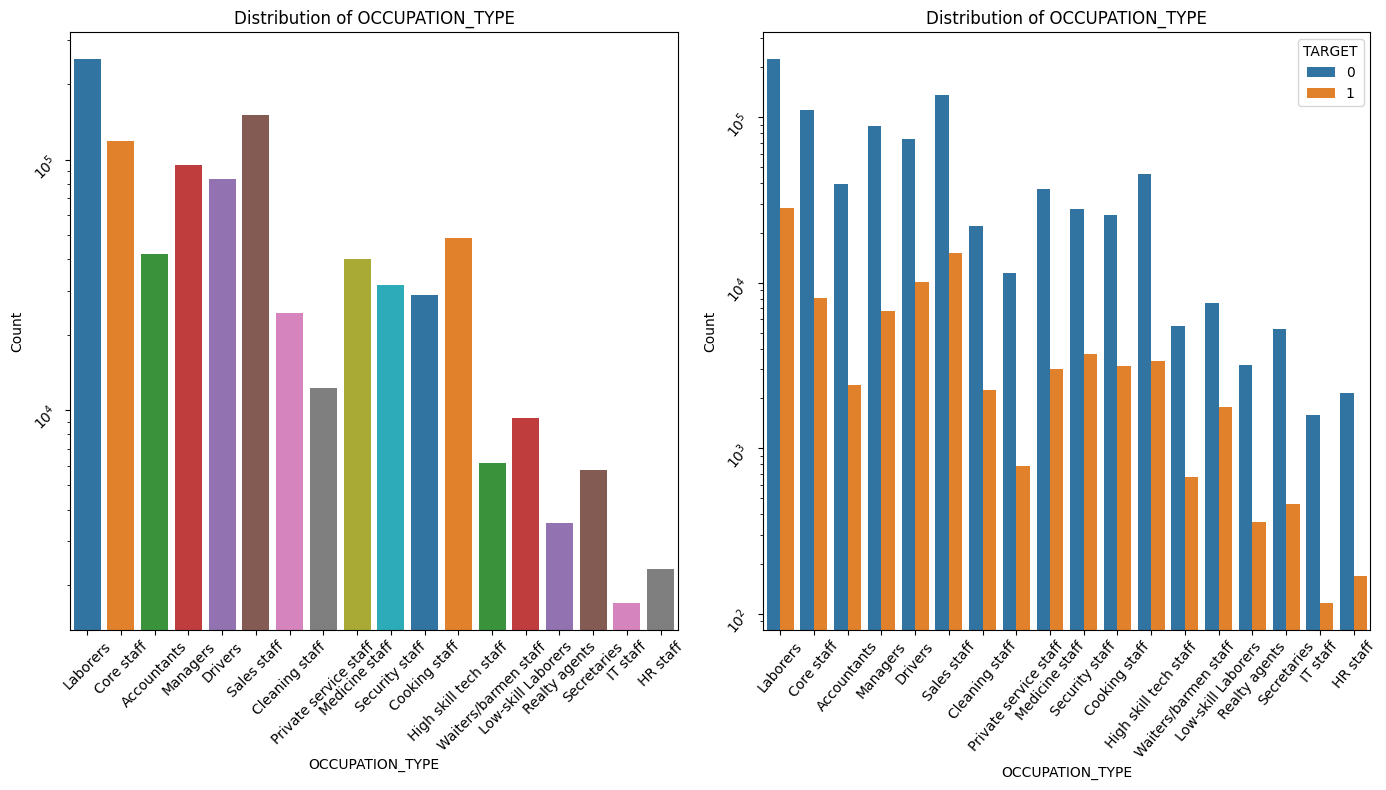

In [ ]:
plot_categorical_dist(merged_df, 'OCCUPATION_TYPE',"OCCUPATION_TYPE")

Laborers having the highest default rate being the less technical clients

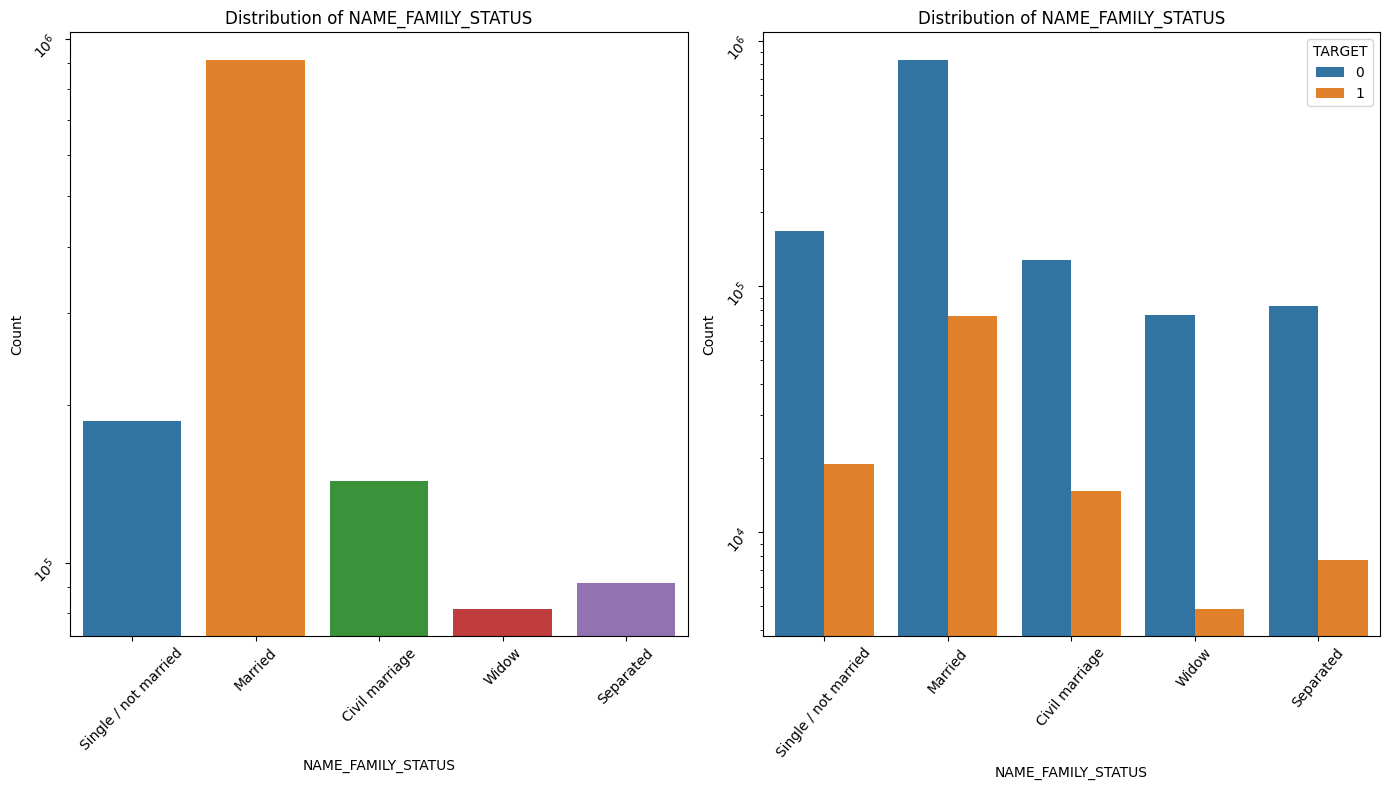

In [115]:
plot_categorical_dist(merged_df, 'NAME_FAMILY_STATUS','NAME_FAMILY_STATUS')

In [97]:
#Important columns of primary data frame
numerical_columns1 = ['AMT_GOODS_PRICE',
                    'YEARS_LAST_PHONE_CHANGE',
                    'YEARS_ID_PUBLISH',
                    'AMT_INCOME_TOTAL',
                    'YEARS_EMPLOYED',
                    'YEARS_REGISTRATION',
                    'AGE_IN_YEAR',
                    'AMT_CREDIT',
                    'AMT_ANNUITY']

Correlation analysis of numerical columns (app_df_1)

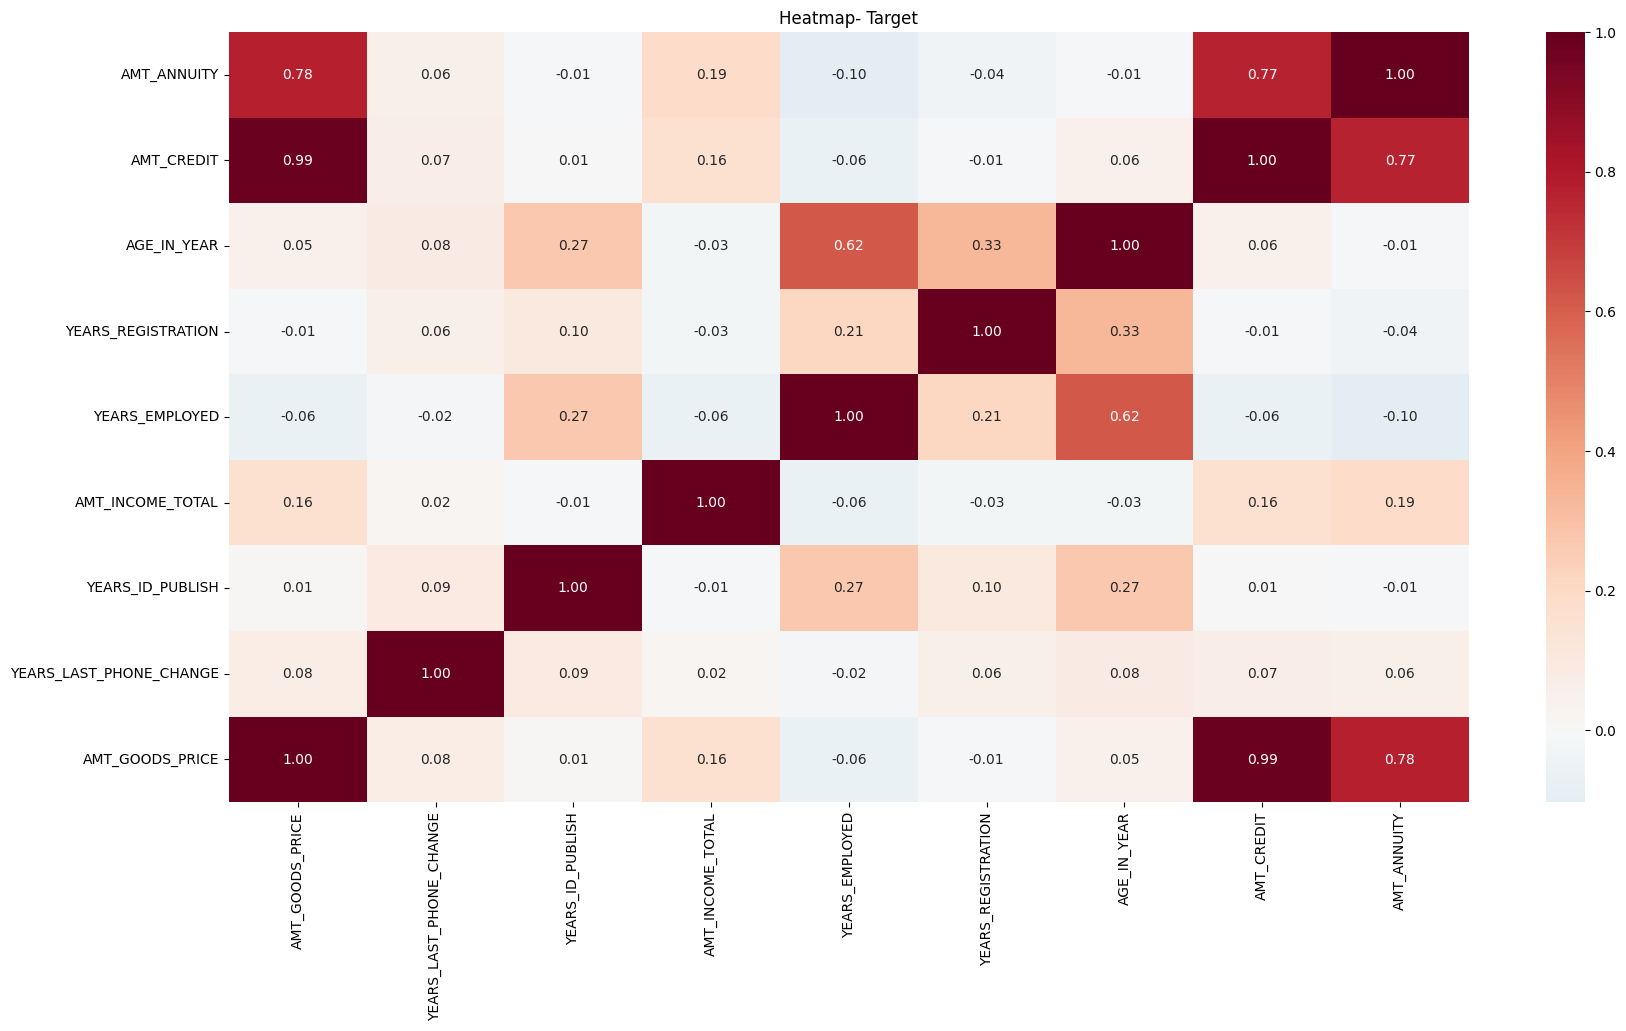

In [110]:
plt.figure(figsize=(20, 10))
sns.heatmap(app_df_1[numerical_columns1].corr(), annot=True, fmt=".2f", cmap='RdBu_r', center=0)
plt.tick_params(axis='y', rotation=0)
plt.yticks(rotation=0)
plt.ylim(0, len(app_df_1[numerical_columns1].corr().index))
plt.title('Heatmap- Target')
plt.show()


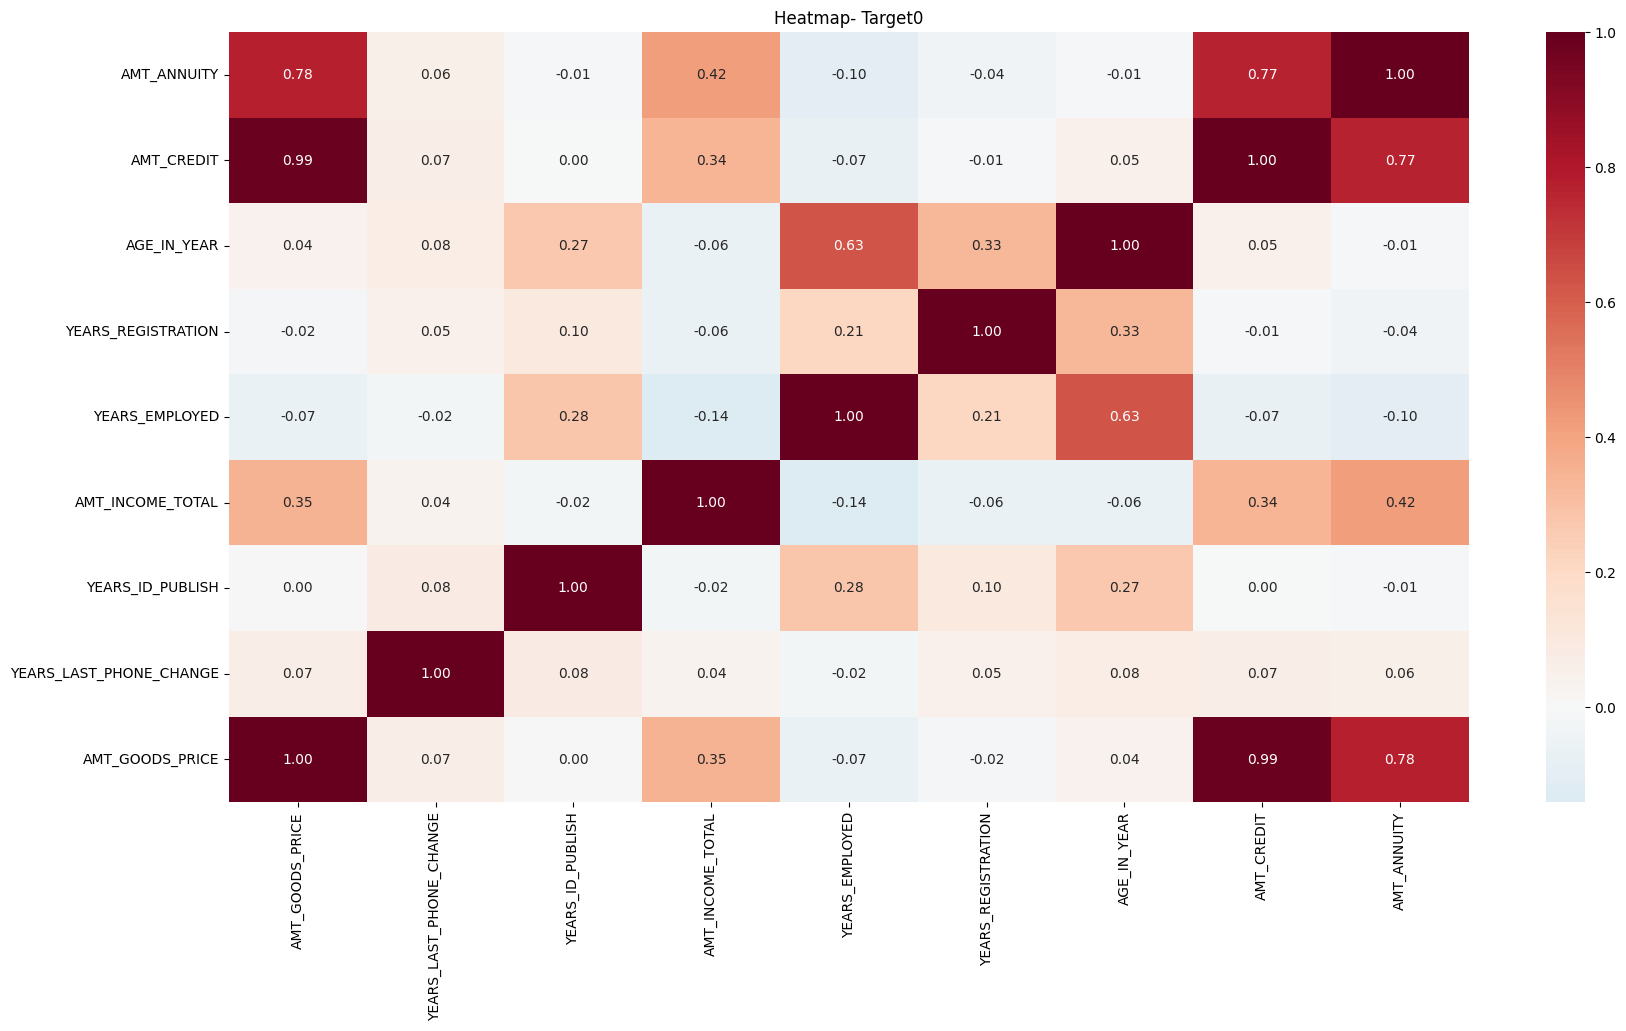

In [111]:
#Heatmap showing correlation btw numerical columns for target 0 (Non defaulters)
plt.figure(figsize=(20, 10))
sns.heatmap(Target0[numerical_columns1].corr(), annot=True, fmt=".2f", cmap='RdBu_r', center=0)
plt.tick_params(axis='y', rotation=0)
plt.yticks(rotation=0)
plt.ylim(0, len(app_df_1[numerical_columns1].corr().index))
plt.title('Heatmap- Target0')
plt.show()

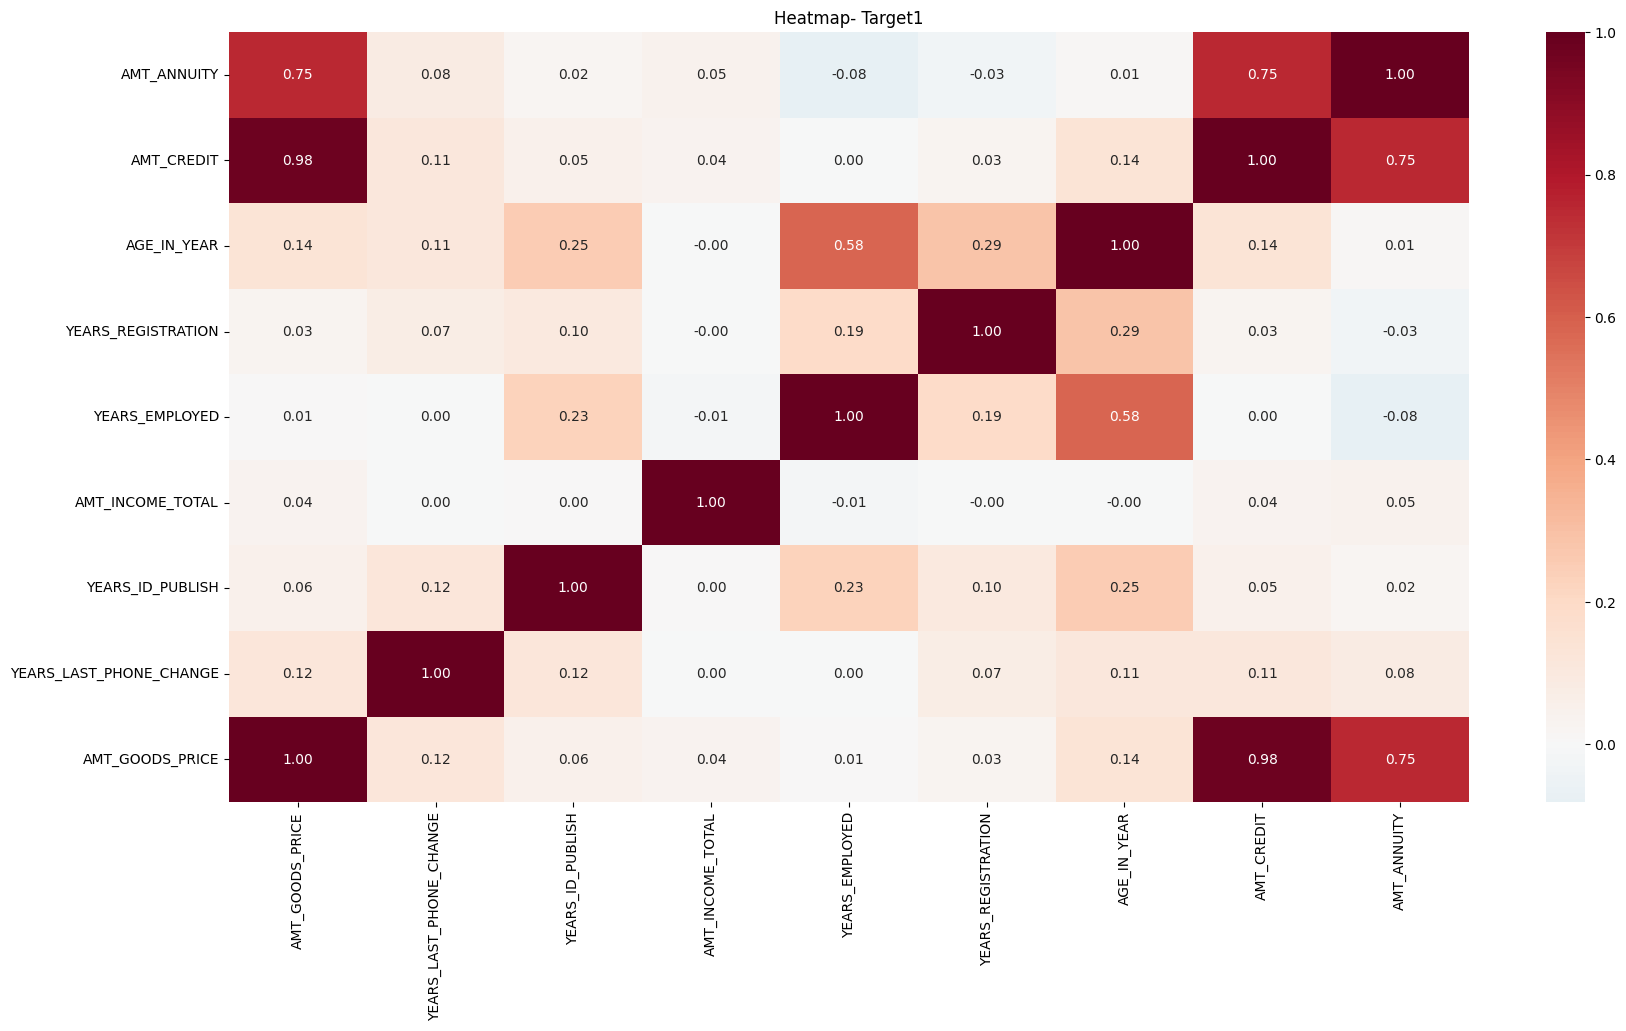

In [113]:
#Heatmap showing correlation btw numerical columns for target 1 (Non defaulters)
plt.figure(figsize=(20, 10))
sns.heatmap(Target1[numerical_columns1].corr(), annot=True, fmt=".2f", cmap='RdBu_r', center=0)
plt.tick_params(axis='y', rotation=0)
plt.yticks(rotation=0)
plt.ylim(0, len(app_df_1[numerical_columns1].corr().index))
plt.title('Heatmap- Target1')
plt.show()

Insights from above Heatmaps showing correlation
(Darker points showing more correlation includes)
- AMT_GOOD_PRICE - AMT_CREDIT
- AMT_GOOD_PRICE - AMT_ANNUITY
- AMT_CREDIT - AMT_ANNUITY
- YEARS_EMPLOYED - AGE_IN_YEAR (low)

Univariate analysis of numerical columns using scatterplot


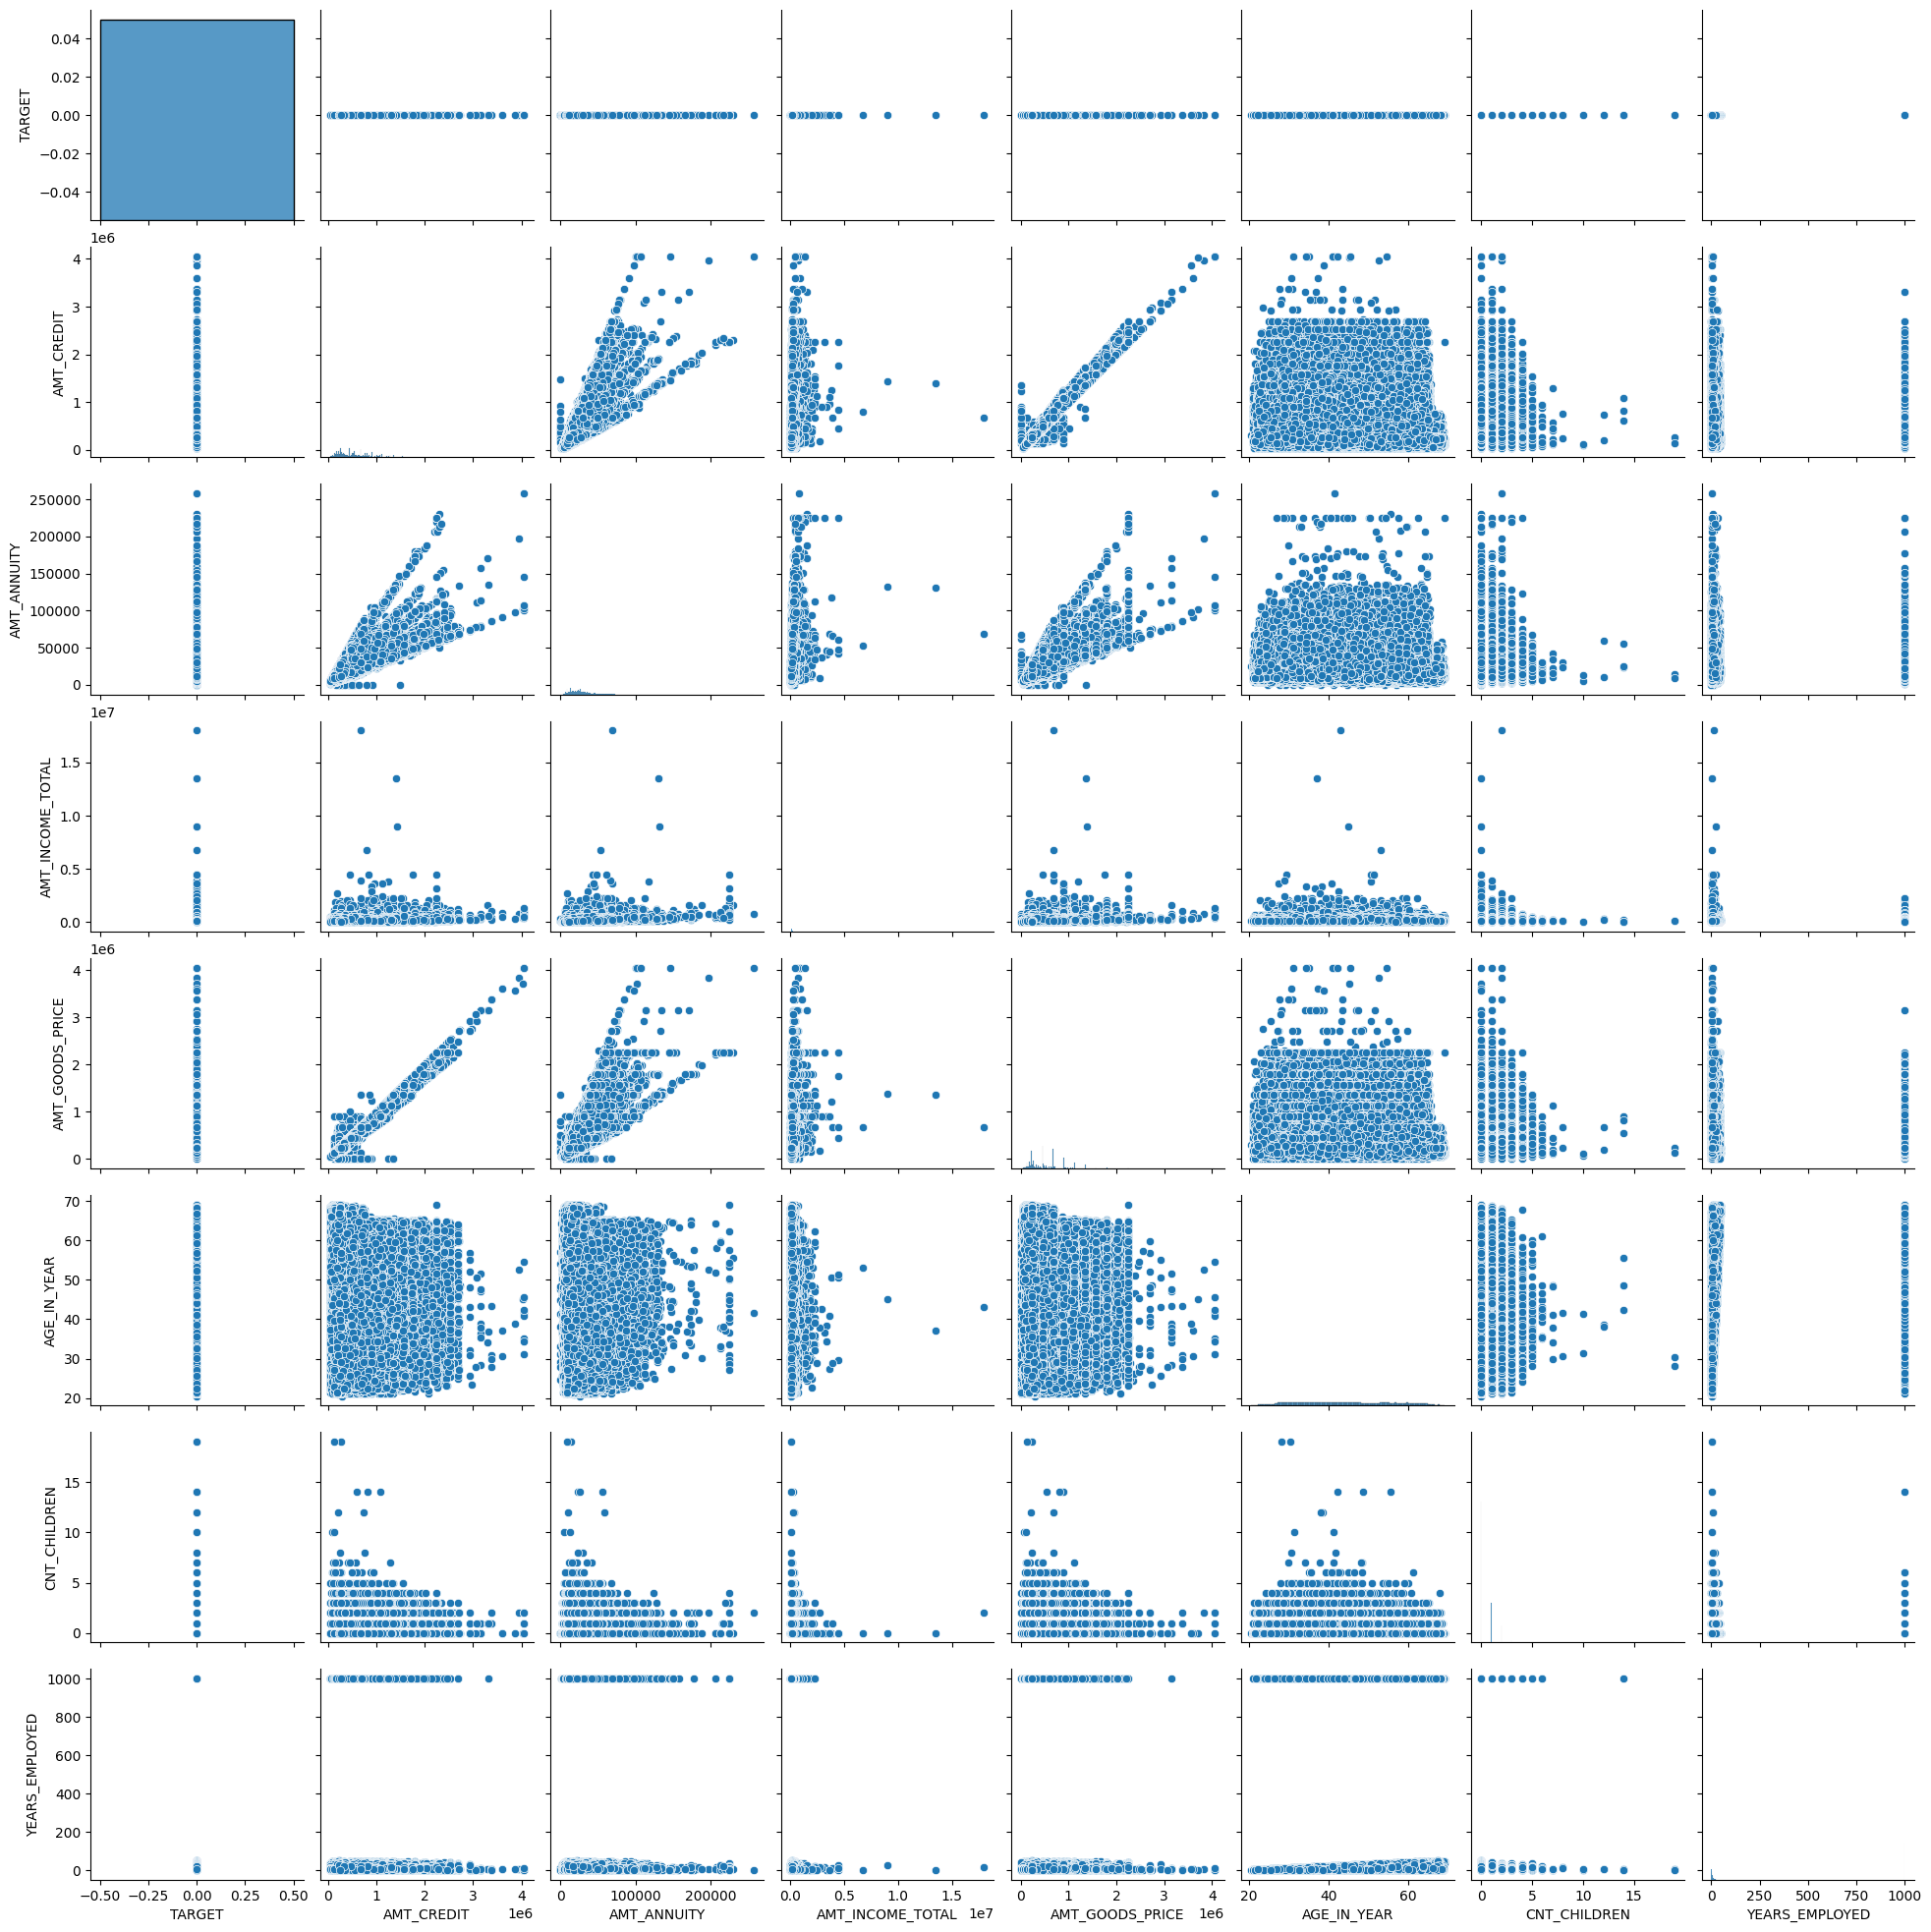

In [120]:
#for target 0 - non defaulters
scat = Target0[['TARGET','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'AGE_IN_YEAR','CNT_CHILDREN','YEARS_EMPLOYED']].fillna(0)
sns.pairplot(scat)
plt.show()

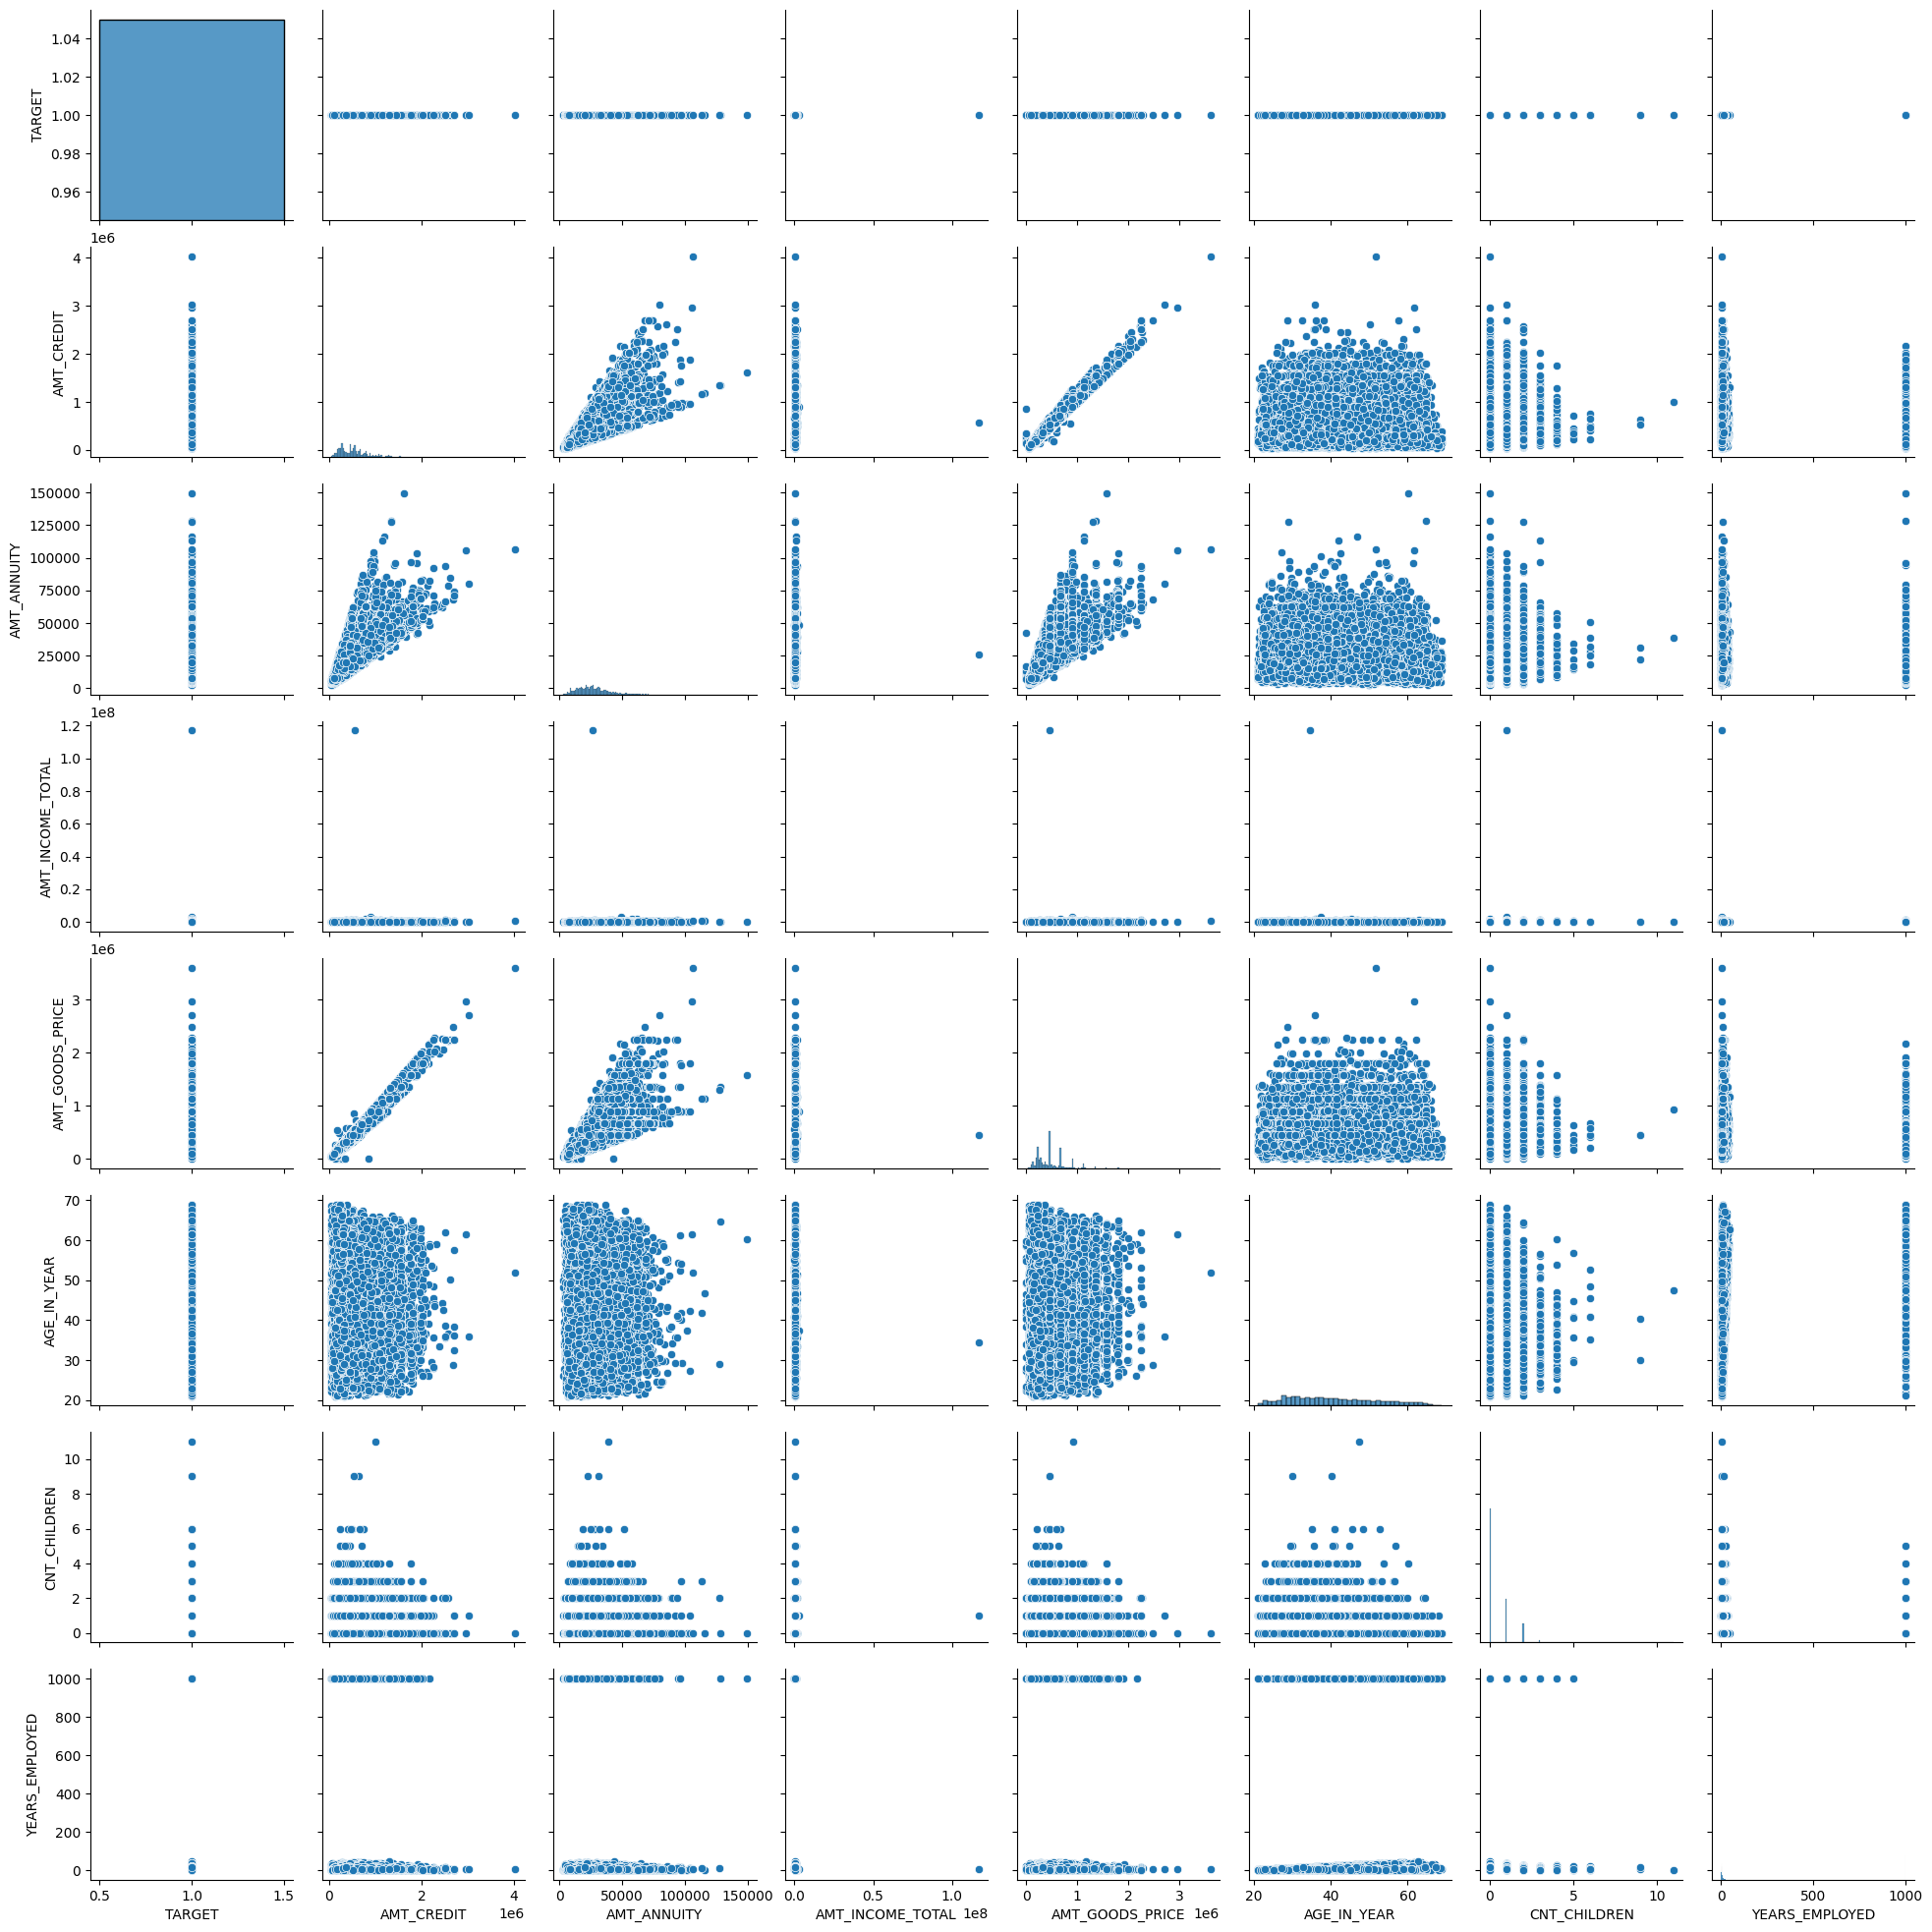

In [123]:
#Scatter plot- target -1 - defaulter with some difficulties in paying
scat1 = Target1[['TARGET','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'AGE_IN_YEAR','CNT_CHILDREN','YEARS_EMPLOYED']].fillna(0)
sns.pairplot(scat1)


###### Insights

Both heatmap and scatterplot indicates that :-
- AMT_CREDIT and AMT_GOODS_PRICE are highly correlated variables for both defaulters and defaulters.
- AMT_CREDIT and AMT_ANNUITY highly correlated variables for both defaulters and non defaulters.


##### Performing Univariate Analysis

##### NAME_CONTRACT_STATUS

In [154]:
merged_df["NAME_CONTRACT_STATUS"].unique()

array(['Approved', 'Canceled', 'Refused', 'Unused offer'], dtype=object)

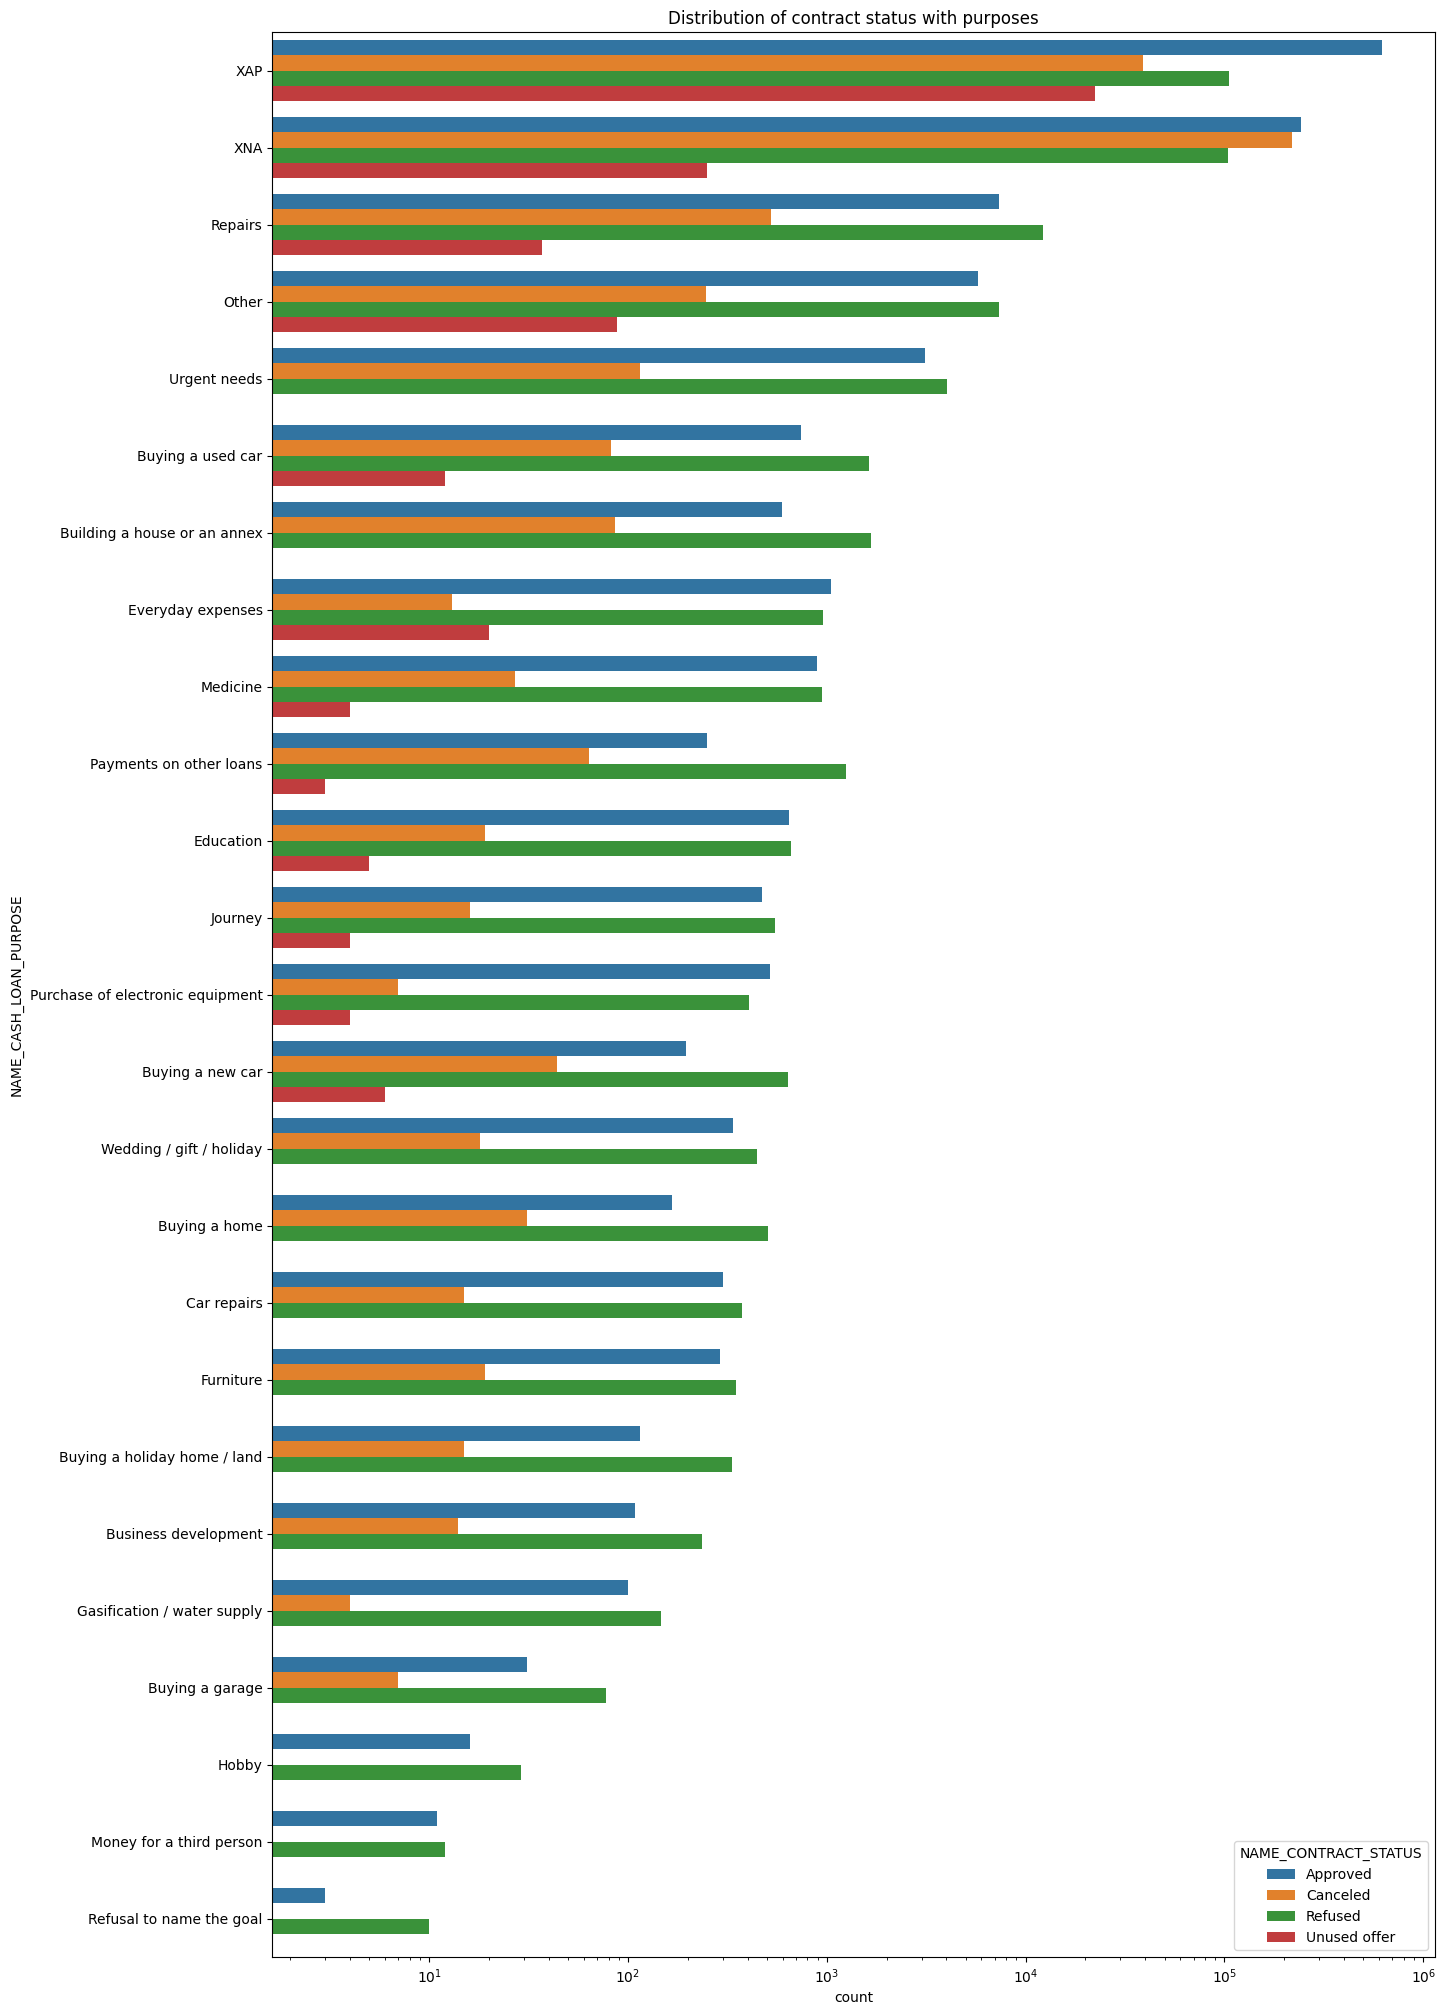

In [156]:
# Distribution of contract status for NAME_CASH_LOAN_PURPOSE  variable in logarithmic scale

plt.figure(figsize=(15,25))
plt.xticks(rotation=0)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = merged_df, y= 'NAME_CASH_LOAN_PURPOSE',
                   order=merged_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS')

##### 1. Approved percentage is higher than refused in case of loans for Everyday expenses. So banks are feeling much comfortable to gives loans to Everyday expenses customers.
##### 2. There are equal number of approval and rejections in the educational loan.

##### NAME_CASH_LOAN_PURPOSE

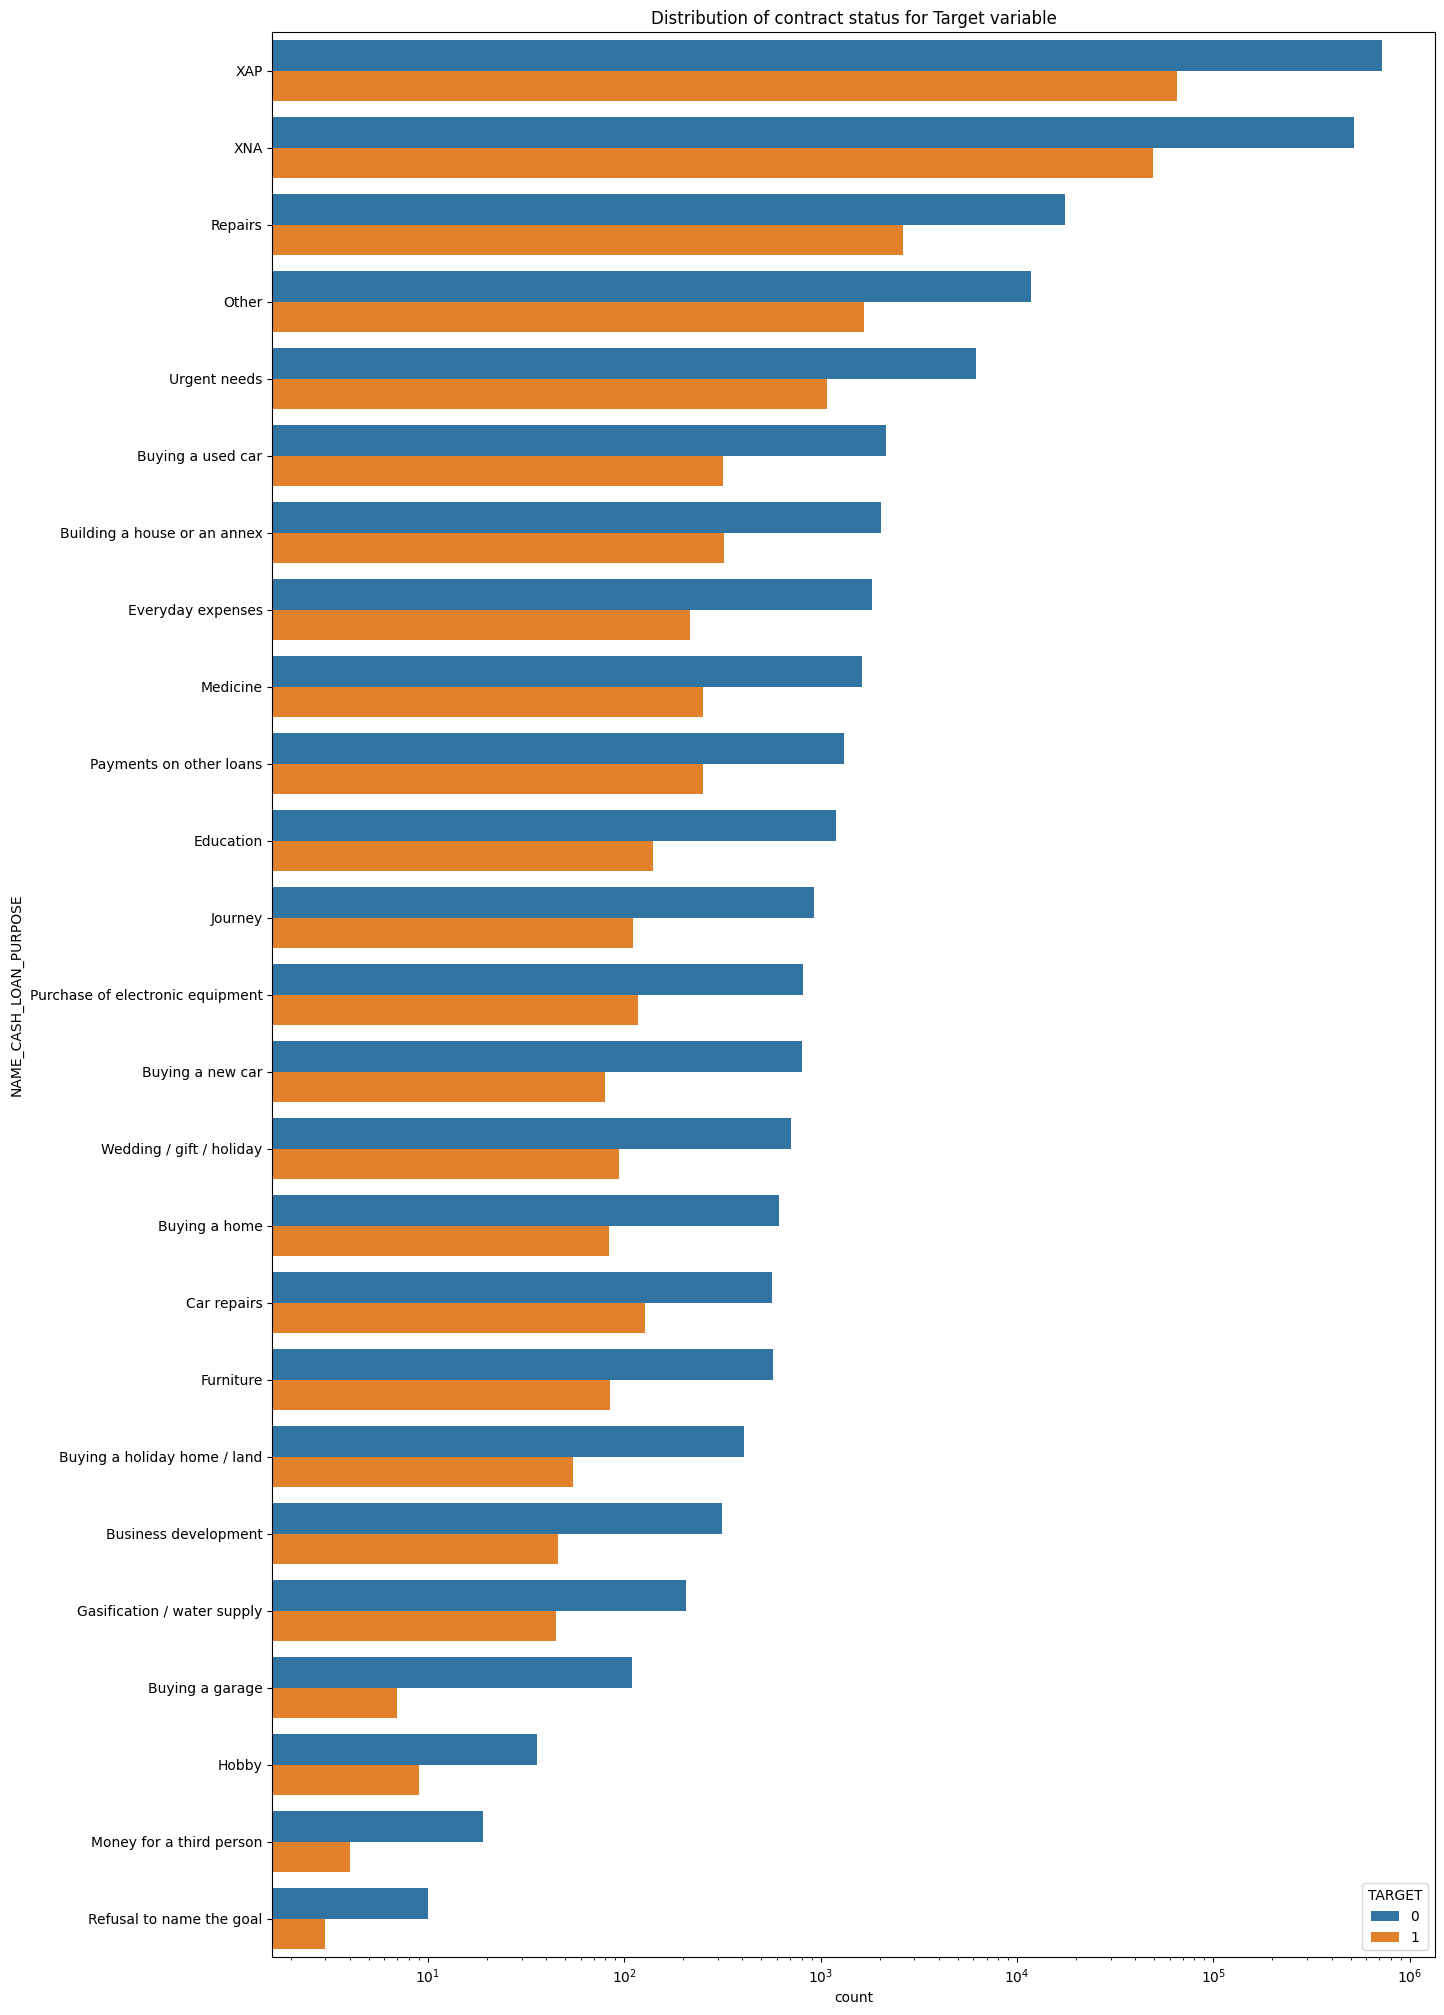

In [157]:
# Distribution of NAME_CASH_LOAN_PURPOSE for the Target variable in logarithmic scale

plt.figure(figsize=(15,25))
plt.xticks(rotation=0)
plt.xscale('log')
plt.title('Distribution of contract status for Target variable')
ax = sns.countplot(data = merged_df, y= 'NAME_CASH_LOAN_PURPOSE',
                   order=merged_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET')

##### Repairs have the maximum number of defaulters .

#####  Bivariate Analysis

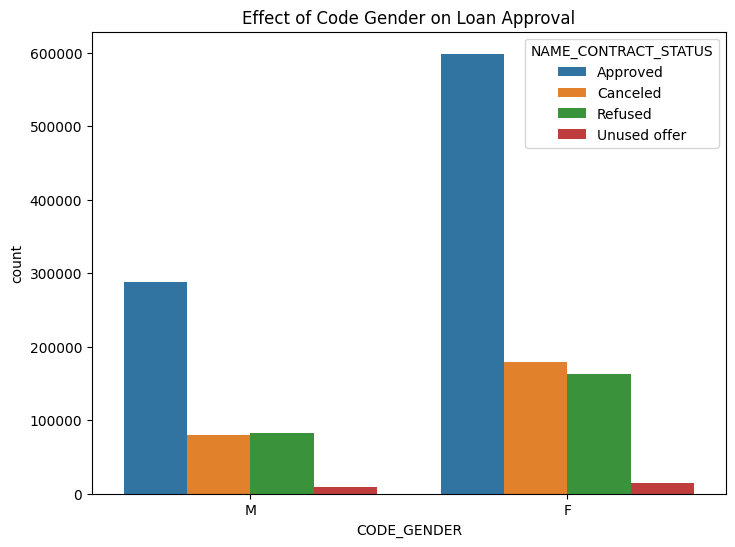

In [161]:
#CODE_GENDER-NAME_CONTRACT_STATUS
plt.figure(figsize = (18,6))
plt.subplot(1, 2, 1)
sns.countplot(x='CODE_GENDER', hue='NAME_CONTRACT_STATUS', data=merged_df)
plt.title('Effect of Code Gender on Loan Approval')
plt.xticks(rotation = 0)
plt.show()

##### We clearly shows that the number of loans approved to female are more than males.

###### NAME_EDUCATION_TYPE-----CONTRACT_STATUS

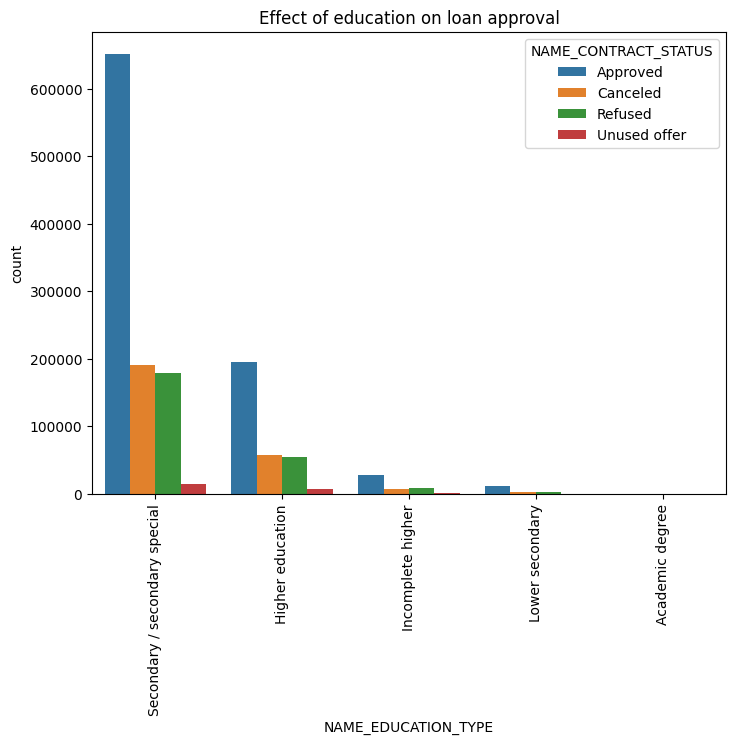

In [160]:
plt.figure(figsize = (18,6))
plt.subplot(1, 2, 1)
sns.countplot(x='NAME_EDUCATION_TYPE', hue='NAME_CONTRACT_STATUS', data=merged_df)
plt.title('Effect of education on loan approval')
plt.xticks(rotation = 90)
plt.show()

##### The number of loan approval is highly inclined towards the client with secondary/special education.